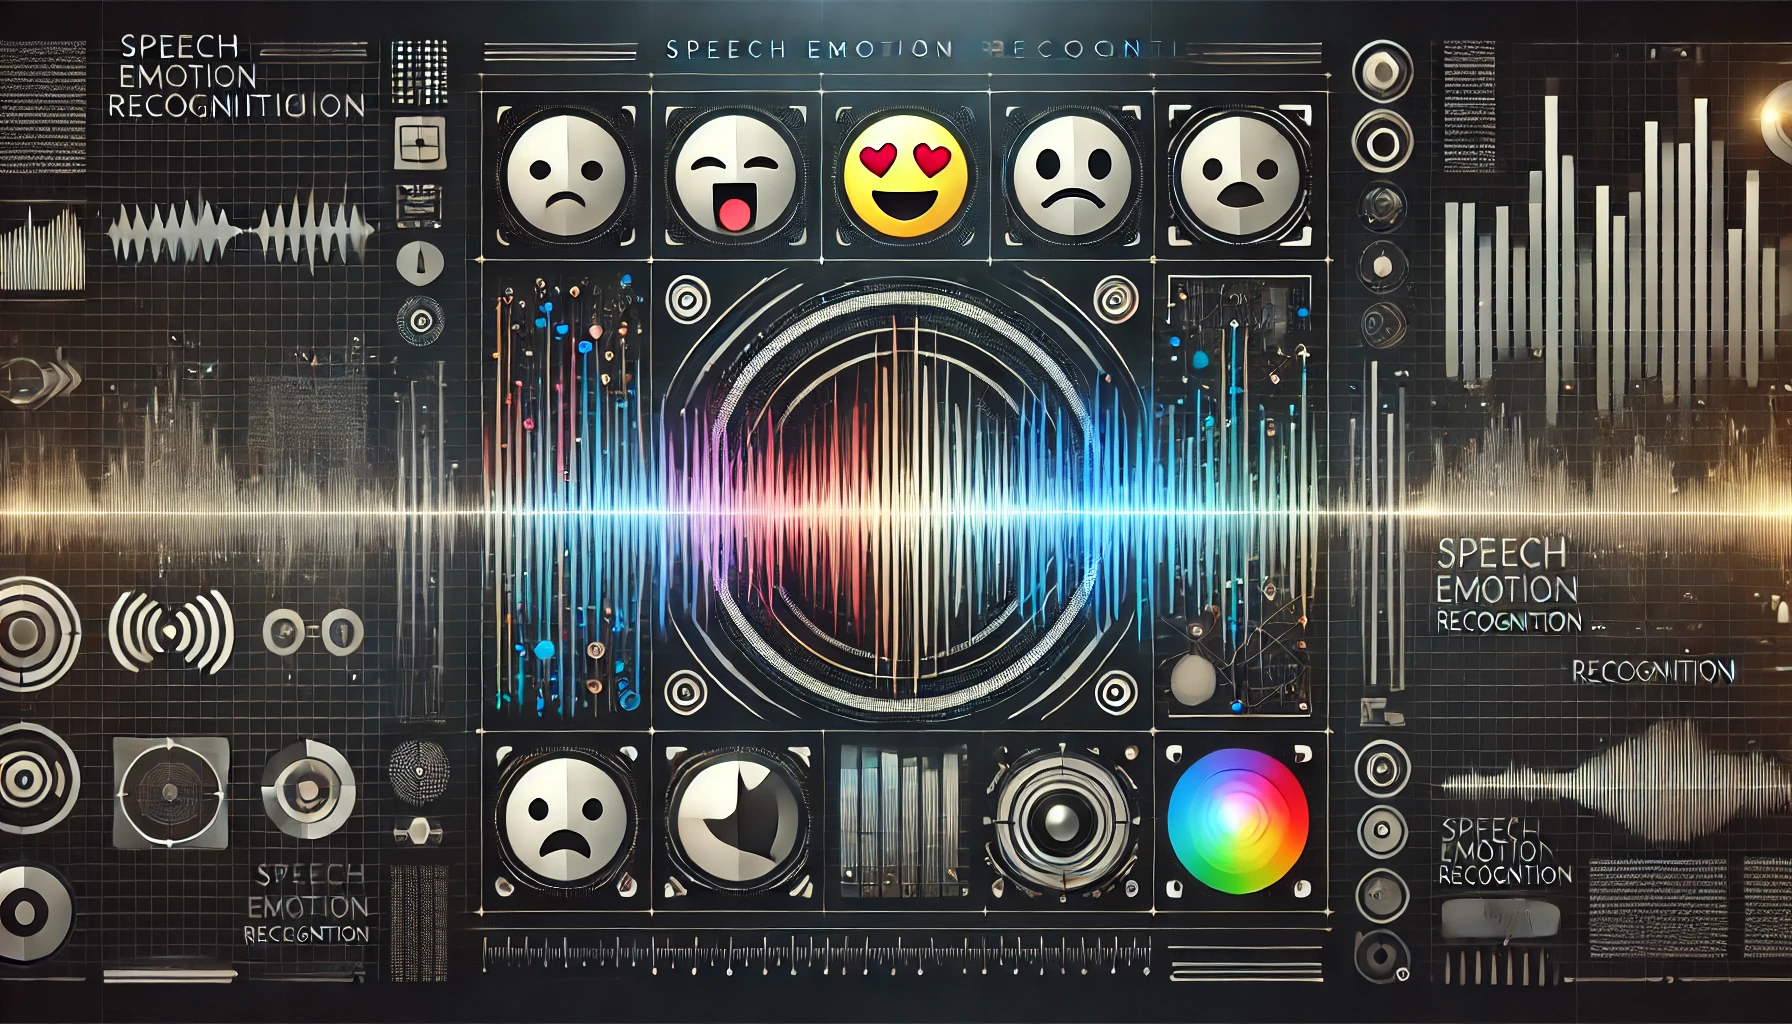

# **Problem Statement**


Speech is a fundamental way through which humans communicate emotions, often more expressively than through text or visuals. Recognizing emotions from speech is crucial for applications in customer service, virtual assistants, healthcare, and entertainment. However, accurately classifying emotions from speech poses challenges due to the complexity of vocal expressions, varying accents, and noise in real-world environments.

The problem we aim to solve is:  
*Can we build an efficient model that accurately identifies and classifies emotions from speech data using machine learning techniques and audio features (e.g., MFCCs, spectrograms) across multiple datasets?*

Key Challenges:
1. **Diverse Emotions**: Emotions such as anger, happiness, sadness, fear, and others must be identified, which vary in subtle and pronounced ways.
2. **Real-world Variability**: Differences in accent, gender, tone, and environmental noise.
3. **Generalization**: The model should generalize well across multiple datasets and speakers.

---

# **Objectives**


1. **Data Preparation**:
   - Collect, clean, and preprocess speech data from multiple datasets (CREMA-D, RAVDESS, SAVEE, TESS) for emotion recognition.
   
2. **Feature Extraction**:
   - Extract key audio features from speech data (e.g., MFCCs, Chroma, Spectral Contrast) that are relevant for distinguishing emotions.

3. **Model Development**:
   - Build and compare machine learning models (SVM, Random Forest, CNN) and possibly deep learning techniques (RNN, LSTM) for speech emotion recognition.
   - Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

4. **Evaluation**:
   - Use a confusion matrix and ROC curves to evaluate how well the model distinguishes between different emotions.
   - Perform cross-validation to ensure the model’s robustness.

5. **Deployment Readiness**:
   - Ensure the model's feasibility for real-time applications by evaluating its inference time and scalability.

---

# **Business Impacts**

Implementing an accurate and reliable **Speech Emotion Recognition** system can have wide-ranging benefits across multiple industries:

1. **Customer Service**:
   - Automated call centers can use SER to gauge customer satisfaction, frustration, or distress. This can trigger alerts to human operators for intervention when needed.
   - Improve customer relationship management by dynamically adjusting service tone or responses based on the caller's emotional state.

2. **Healthcare**:
   - SER can aid in diagnosing mental health issues by detecting signs of anxiety, depression, or stress during conversations, providing an additional layer of patient monitoring.
   - It can be integrated into telemedicine platforms to assess patients’ mental well-being.

3. **Virtual Assistants**:
   - Enhance AI-based virtual assistants (like Alexa, Google Assistant) by allowing them to respond more appropriately based on the user's mood or emotional state.
   - Applications like personal care robots or therapeutic assistants can use this feature to deliver emotionally sensitive responses.

4. **Entertainment and Media**:
   - In video games, SER can be used to adjust the game environment dynamically based on the player’s emotional feedback.
   - Emotion-aware systems can personalize music or movie recommendations based on a user's current emotional state.

5. **Market Research and Sales**:
   - SER can be used in feedback systems to gauge customers' emotional reactions to product pitches, advertisements, or services, providing actionable insights for marketing and sales teams.

---

# Speech Emotion Recognition

Speech is one of the most natural and intuitive ways for humans to communicate, making it an ideal medium for interaction with computer applications as well. Extending this form of expression to technology has led to the development of speech emotion recognition (SER) systems. These systems consist of a variety of methodologies that analyze, process, and categorize speech signals to identify the emotions they convey. Although SER is not a new area of research—having been explored for more than two decades—it has recently seen a resurgence of interest. This renewed focus is largely due to technological advancements in computing, machine learning, and artificial intelligence, which have opened up new possibilities for SER. With these emerging developments, it has become essential to provide an updated overview of the methods and techniques that enable effective emotion recognition through speech. Our work delves into several key aspects of SER, offering a comprehensive review of the latest research in each area. Additionally, we address the ongoing challenges within the field, aiming to provide a clearer understanding of both its progress and the hurdles that remain.

# Description of the Datasets

The dataset described revolves around four popular English-language datasets used for Speech Emotion Recognition (SER): **Crema**, **Ravdess**, **Savee**, and **Tess**, each containing audio files in `.wav` format with associated emotion labels.

1. **Ravdess (Ryerson Audio-Visual Database of Emotional Speech and Song)**:
   - Audio files follow a structured filename convention that encodes metadata such as modality, vocal channel, emotion, emotional intensity, statement, repetition, and actor information.
   - For instance, in the filename `02-01-06-01-02-01-12.wav`:
     - Modality: Video-only (02)
     - Vocal channel: Speech (01)
     - Emotion: Fearful (06)
     - Emotional intensity: Normal (01)
     - Statement: "Dogs are sitting by the door" (02)
     - Repetition: 1st repetition (01)
     - Actor: 12th (Female, as the number is even).
   
2. **Crema (Crowd-sourced Emotional Multimodal Actors Dataset)**:
   - Emotion labels are embedded in filenames using abbreviated codes like:
     - SAD: Sadness
     - ANG: Angry
     - DIS: Disgust
     - FEA: Fear
     - HAP: Happy
     - NEU: Neutral.

3. **Tess (Toronto Emotional Speech Set)**:
   - Similar to Crema, the emotion label is directly embedded in the file name, making it easy to identify the emotional tone of each audio file.

4. **Savee (Surrey Audio-Visual Expressed Emotion)**:
   - The dataset uses prefix letters in filenames to denote emotion classes:
     - 'a' = Anger
     - 'd' = Disgust
     - 'f' = Fear
     - 'h' = Happiness
     - 'n' = Neutral
     - 'sa' = Sadness
     - 'su' = Surprise.

These datasets are widely used in SER research to train models on recognizing emotions from audio speech, and each follows a distinct naming convention to convey essential metadata about the speech samples.

# Importing Necessary Libraries

In [1]:
import os
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

import warnings
warnings.filterwarnings("ignore")

# Importing the Datasets

## Setting the Kaggle API

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
url = '1FNE24xoOjBjCdE5bUd_myxLioF0IWkZg'
out = 'kaggle.json'
gdown.download(id=url, output=out, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FNE24xoOjBjCdE5bUd_myxLioF0IWkZg
To: /content/kaggle.json
100%|██████████| 62.0/62.0 [00:00<00:00, 236kB/s]


'kaggle.json'

In [5]:
! cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Here we are trying to configure Kaggle API access in a notebook environment. Here is a quick explanation of the commands you're using:

1. **`! cp /content/kaggle.json ~/.kaggle/kaggle.json`**:
   - This command copies your Kaggle API key file (`kaggle.json`) from the `/content` directory to the hidden `.kaggle` directory in your home directory (`~/.kaggle/`). The `.kaggle` directory is where Kaggle API expects the credentials file to be stored.

2. **`! chmod 600 ~/.kaggle/kaggle.json`**:
   - This changes the permissions of the `kaggle.json` file to ensure that it can only be read and written by the owner. This is a security measure to protect your API key from being accessed by others.

Once these commands are executed, the user should be able to use Kaggle's API to download datasets or submit models.

## Downloading the Datasets from Kaggle

In [6]:
! kaggle datasets download dmitrybabko/speech-emotion-recognition-en

Dataset URL: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en
License(s): copyright-authors
100% 986M/987M [00:14<00:00, 73.1MB/s]
100% 987M/987M [00:14<00:00, 71.8MB/s]


### Unzipping the Datasets

In [7]:
! unzip speech-emotion-recognition-en

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [8]:
crema_path = '/content/Crema'
ravdess_path = '/content/Ravdess/audio_speech_actors_01-24/'
savee_path = '/content/Savee'
tess_path = '/content/Tess'

In [9]:
crema_dir_list = os.listdir(crema_path)
ravdess_dir_list = os.listdir(ravdess_path)
savee_dir_list = os.listdir(savee_path)
tess_dir_list = os.listdir(tess_path)

The code snippet you've provided is for listing the contents (i.e., files or subdirectories) of the directories where the CREMA, RAVDESS, SAVEE, and TESS datasets are stored. Here's a breakdown of what each line does:

1. **`crema_dir_list = os.listdir(crema_path)`**:
   - This line retrieves a list of all files and subdirectories present in the directory specified by `crema_path`. This variable (`crema_dir_list`) will store all the file names (e.g., audio files) from the CREMA dataset directory.

2. **`ravdess_dir_list = os.listdir(ravdess_path)`**:
   - Similarly, this line lists all files and subdirectories located in the directory specified by `ravdess_path`, which corresponds to the RAVDESS dataset.

3. **`savee_dir_list = os.listdir(savee_path)`**:
   - This lists all the files and subdirectories from the SAVEE dataset directory, as specified by the path variable `savee_path`.

4. **`tess_dir_list = os.listdir(tess_path)`**:
   - Finally, this line lists the files and subdirectories in the directory specified by `tess_path`, corresponding to the TESS dataset.

Once executed, each variable will contain a list of filenames from the respective directories. If you need to inspect these lists or process the files (e.g., loading the audio data), you can iterate through them or apply further operations. Let me know if you'd like help with file processing or further steps!

# **CREMA** (Crowd-sourced Emotional Multimodal Actors Dataset)

In [10]:
ex_crema_dir_list = crema_dir_list[:15]
ex_crema_dir_list

['1082_TSI_NEU_XX.wav',
 '1055_TAI_ANG_XX.wav',
 '1051_DFA_DIS_XX.wav',
 '1059_IEO_FEA_MD.wav',
 '1024_IEO_HAP_MD.wav',
 '1069_ITH_NEU_XX.wav',
 '1058_IWW_NEU_XX.wav',
 '1086_IWL_FEA_XX.wav',
 '1068_IWL_HAP_XX.wav',
 '1023_IEO_ANG_LO.wav',
 '1024_TIE_FEA_XX.wav',
 '1053_MTI_FEA_XX.wav',
 '1006_ITS_FEA_XX.wav',
 '1090_IEO_DIS_MD.wav',
 '1009_IOM_HAP_XX.wav']

## Creating the DataFrame

In [11]:
emotions_crema = []
paths_crema = []

for it in crema_dir_list:

    # storing file paths
    paths_crema.append(crema_path + '/' + it)

    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')

In [12]:
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

In [13]:
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
crema_df.shape

(7442, 2)

In [14]:
crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                                        'color': 'black',
                                        'border-color': 'black'})

In [15]:
[crema_df["Emotions"].unique().tolist() for i in crema_df.columns]

[['neutral', 'angry', 'disgust', 'fear', 'happy', 'sad'],
 ['neutral', 'angry', 'disgust', 'fear', 'happy', 'sad']]

## Barplot against Various Emotions

In [16]:
font1 = {'family':'Serif','color':'blue','size':30}
font2 = {'family':'Serif','color':'blue','size':20}
font3 = {'family':'Serif','color':'blue','size':10}

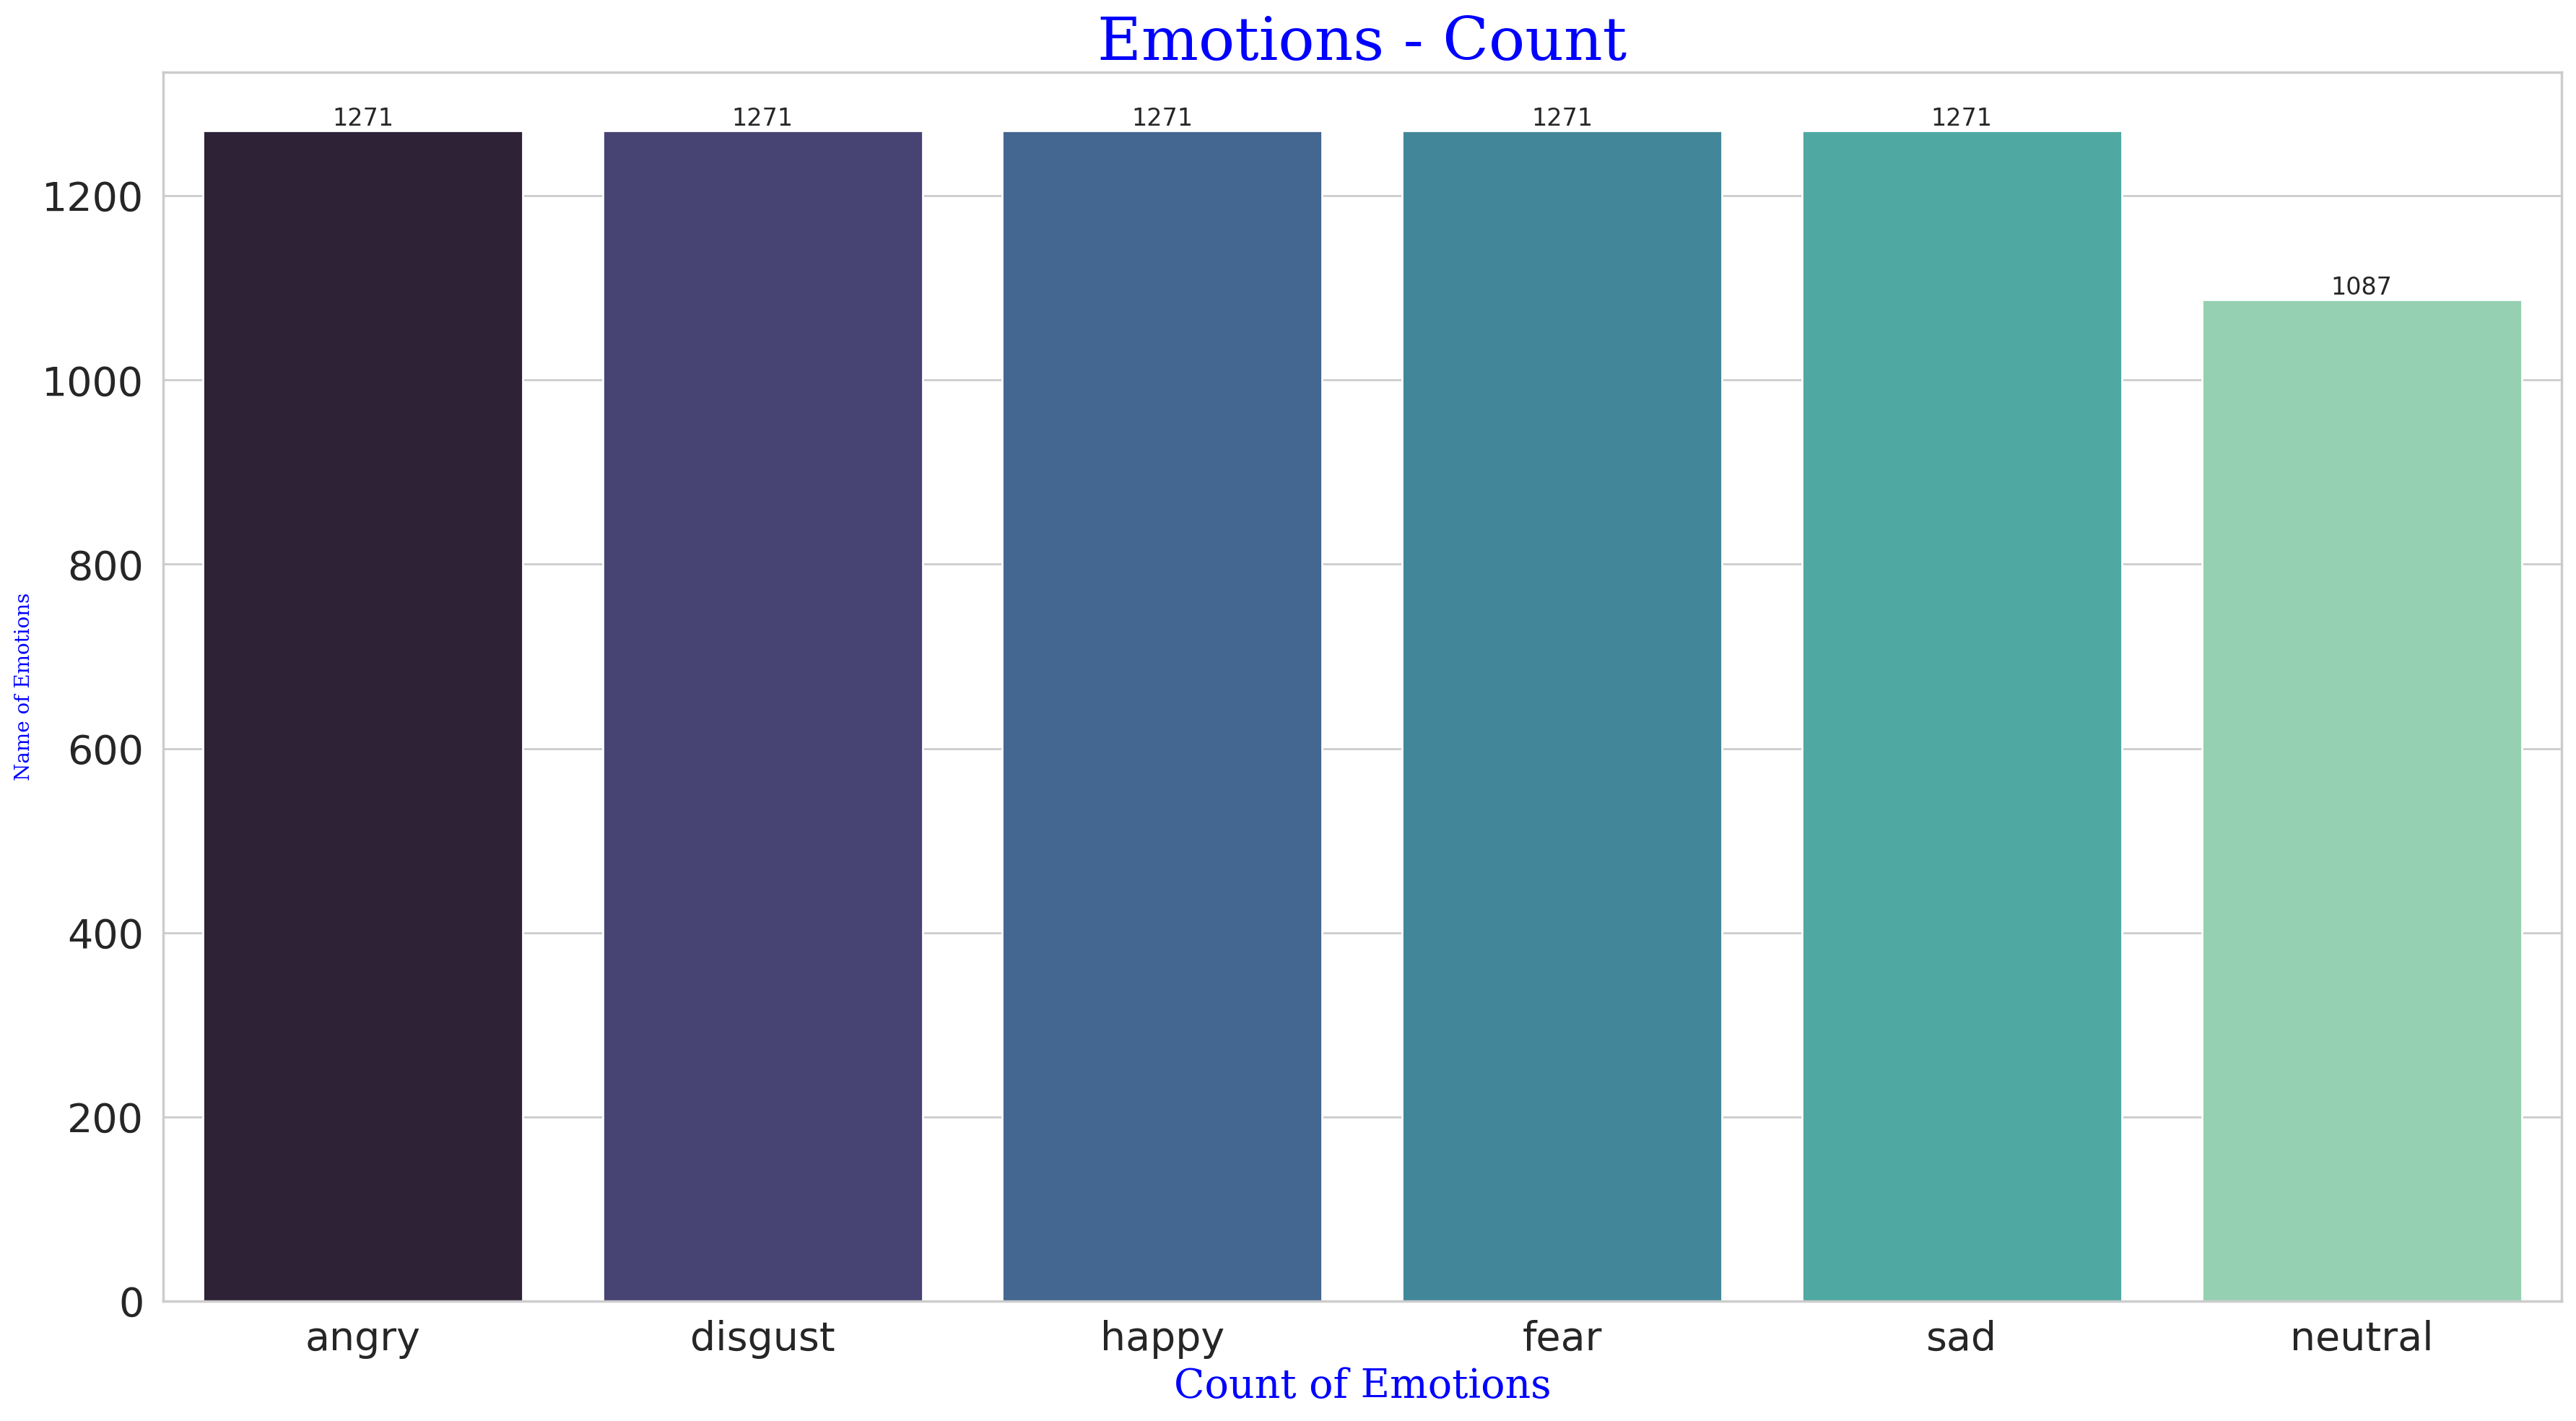

In [17]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(18,10), dpi=200)
count_emotion = crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(y= count_emotion.values, x= count_emotion.index, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar plot visualizes the count of different emotions in your dataset. Each bar represents a specific emotion, and the height of the bar indicates the number of samples labeled with that emotion.

Here's a breakdown of the plot:

- **X-axis (horizontal)**: This represents the different emotions, such as "happy," "fear," "sad," "angry," "disgust," and "neutral."
- **Y-axis (vertical)**: This axis shows the number of samples (or the count) for each emotion in the dataset.

Key observations:
- There are 1,271 samples for emotions like "happy," "fear," "sad," "angry," and "disgust."
- The "neutral" emotion has a lower count with 1,087 samples, compared to the other emotions.

This plot gives an overview of how the dataset is distributed across different emotional categories. The almost equal count for most emotions suggests a balanced dataset for training machine learning models, except for "neutral," which has fewer samples.

# **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song)

In [18]:
ex_ravdess_dir_list = ravdess_dir_list[:15]
ex_ravdess_dir_list

['Actor_03',
 'Actor_14',
 'Actor_16',
 'Actor_07',
 'Actor_05',
 'Actor_23',
 'Actor_22',
 'Actor_24',
 'Actor_01',
 'Actor_19',
 'Actor_11',
 'Actor_04',
 'Actor_13',
 'Actor_17',
 'Actor_02']

## Creating the DataFrame

In [19]:
emotions_ravdess = []
path_ravdess = []

for it in ravdess_dir_list:
    # There are 20 actors
    actor = os.listdir(ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(ravdess_path + it + '/' + file)

In [20]:
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

In [21]:
path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

In [22]:
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral',
                             2:'calm',
                             3:'happy',
                             4:'sad',
                             5:'angry',
                             6:'fear',
                             7:'disgust',
                             8:'surprise'},
                            inplace=True)

ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
                                          'color': 'black',
                                          'border-color': 'black'})

In [23]:
[ravdess_df["Emotions"].unique().tolist() for i in ravdess_df.columns]

[['angry', 'disgust', 'calm', 'neutral', 'sad', 'surprise', 'happy', 'fear'],
 ['angry', 'disgust', 'calm', 'neutral', 'sad', 'surprise', 'happy', 'fear']]

## Barplot against Various Emotions

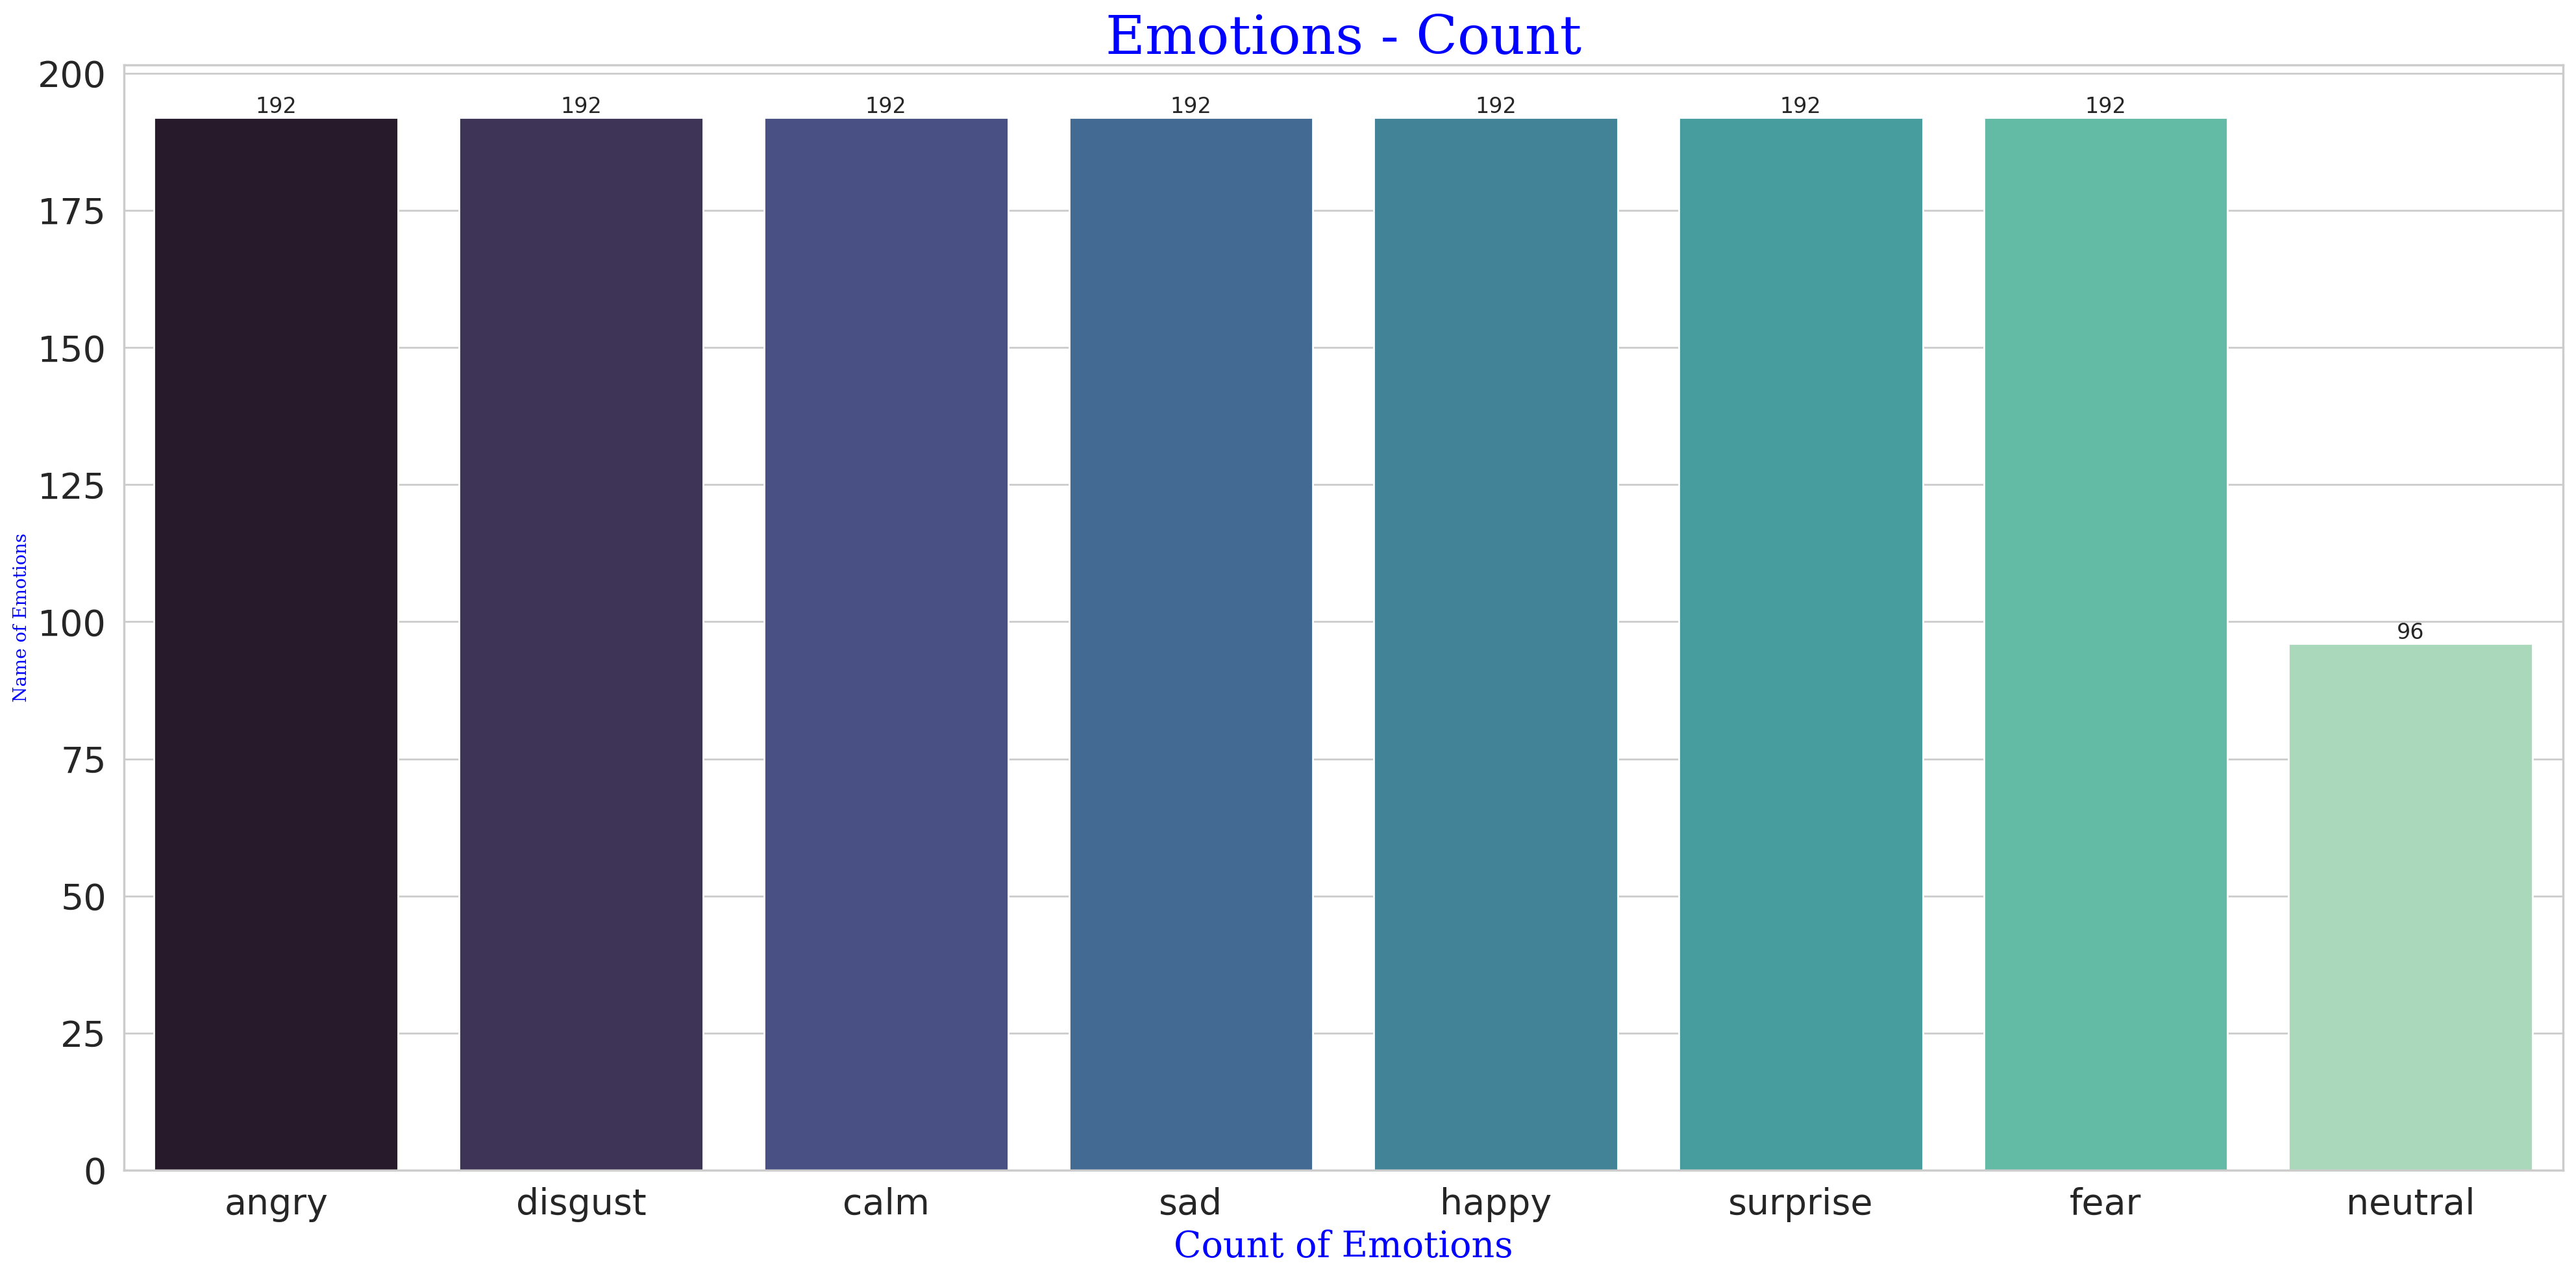

In [24]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
count_emotion = ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= count_emotion.index, y= count_emotion.values, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar plot visualizes the count of different emotions in the RAVDESS dataset, with each bar representing a particular emotion and the height of the bar indicating the number of samples associated with that emotion.

Here’s the breakdown:

- **X-axis (horizontal)**: Represents the different emotions, such as "sad," "fear," "disgust," "surprise," "calm," "angry," "happy," and "neutral."
- **Y-axis (vertical)**: This axis shows the count or number of samples for each emotion.

Key observations:
- The emotions "sad," "fear," "disgust," "surprise," "calm," "angry," and "happy" each have 192 samples, indicating these categories are balanced in the dataset.
- The "neutral" emotion has significantly fewer samples (96), making it underrepresented compared to the other emotions.

This distribution suggests that most emotions are equally represented, but "neutral" has only half the number of samples, which could affect model performance if not handled properly (e.g., via data augmentation or class weighting).

# **SAVEE** (Surrey Audio-Visual Expressed Emotion)

In [25]:
ex_savee_dir_list = savee_dir_list[:15]
ex_savee_dir_list

['KL_h13.wav',
 'KL_a15.wav',
 'DC_su01.wav',
 'JK_f03.wav',
 'JE_n28.wav',
 'DC_n21.wav',
 'JK_f01.wav',
 'JE_d14.wav',
 'DC_su10.wav',
 'KL_su07.wav',
 'KL_d01.wav',
 'JE_d10.wav',
 'JE_h03.wav',
 'JE_n01.wav',
 'JK_n18.wav']

## Creating the DataFrame

In [26]:
emotions_savee = []
path_savee = []

for it in savee_dir_list:
    path_savee.append(savee_path + '/' + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')

    else:
        emotions_savee.append('Unknown')

In [27]:
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

In [28]:
# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)

In [29]:
savee_df.head().style.set_properties(**{'background-color': '#9490ff',
                                        'color': 'black',
                                        'border-color': 'black'})

In [30]:
[savee_df["Emotions"].unique().tolist() for i in savee_df.columns]

[['happiness', 'angry', 'surprise', 'fear', 'neutral', 'disgust', 'sadness'],
 ['happiness', 'angry', 'surprise', 'fear', 'neutral', 'disgust', 'sadness']]

## Barplot against Various Emotions

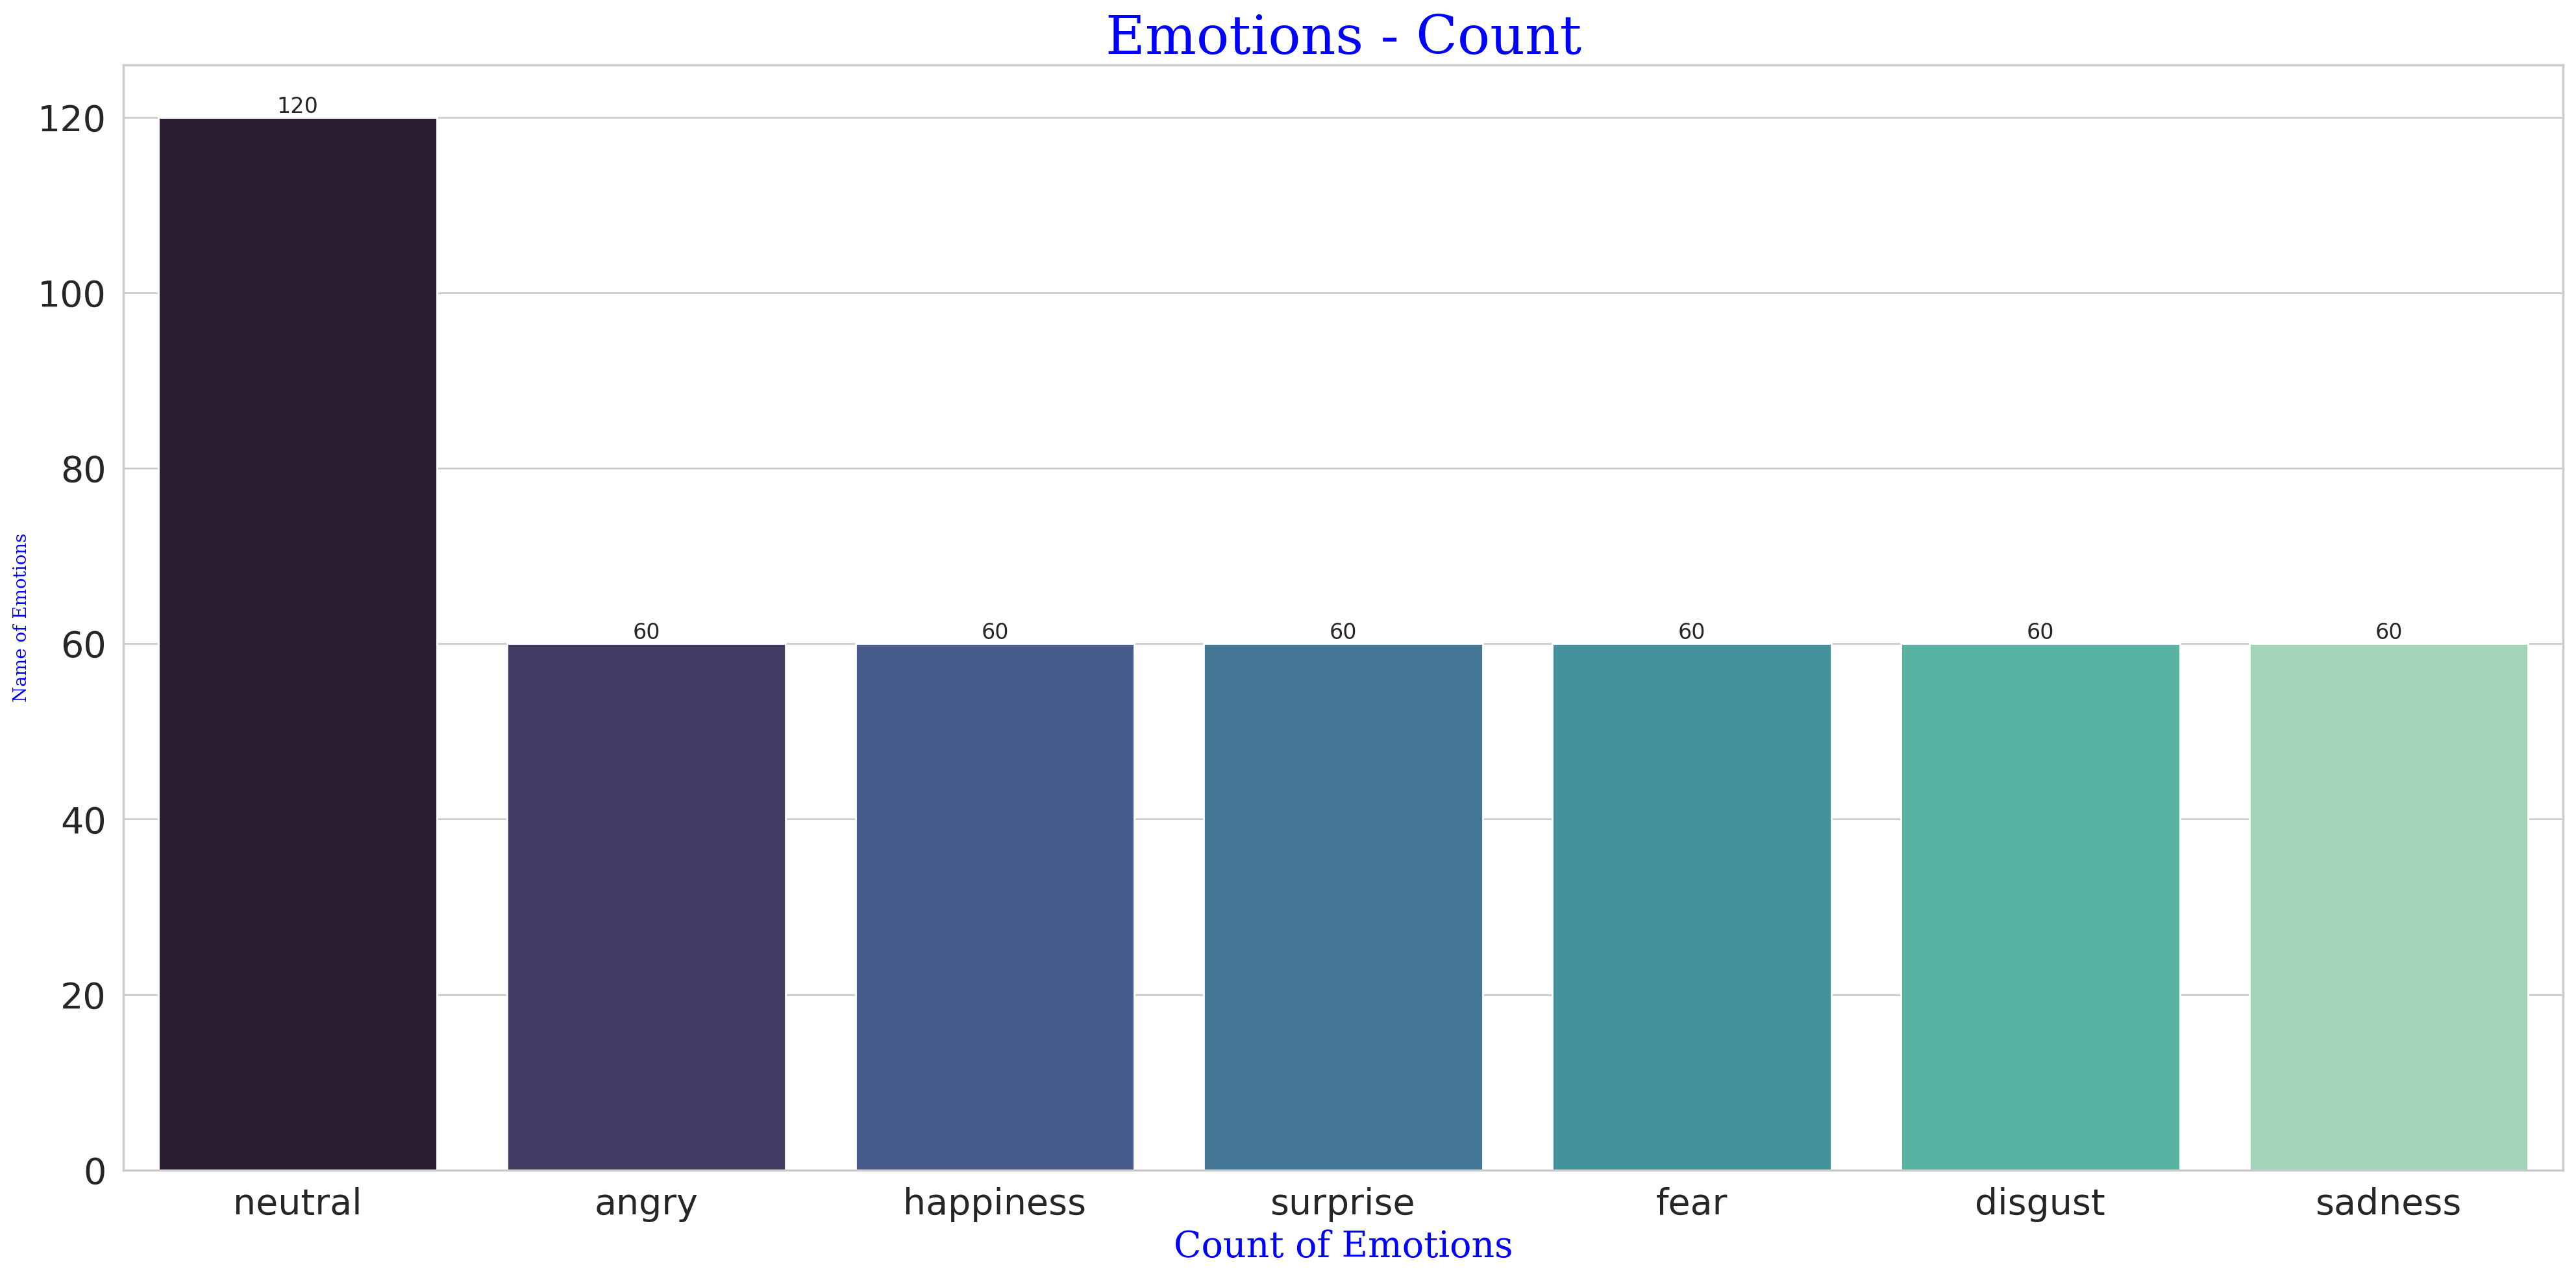

In [31]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
count_emotion = savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= count_emotion.index, y= count_emotion.values, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar plot you've shared visualizes the count of different emotions in the SAVEE dataset. Each bar represents a specific emotion, and the height of the bar indicates the number of samples associated with that emotion.

Here’s a breakdown:

- **X-axis (horizontal)**: Represents the different emotions, such as "neutral," "sadness," "fear," "angry," "surprise," "happiness," and "disgust."
- **Y-axis (vertical)**: This shows the count of audio samples for each emotion.

Key observations:
- The "neutral" emotion has the highest count, with 120 samples, making it the most represented emotion in the dataset.
- Other emotions ("sadness," "fear," "angry," "surprise," "happiness," and "disgust") each have 60 samples, indicating these emotions are equally represented but have half the number of samples compared to "neutral."

This distribution highlights an imbalance, where "neutral" is more prevalent compared to other emotions. If you're building a machine learning model, this imbalance may influence the model’s performance, potentially leading to a bias toward predicting the "neutral" emotion more frequently. To handle this, you might consider techniques like data augmentation, class weighting, or undersampling to balance the dataset during training.

# **TEES** (Toronto Emotional Speech Set)

In [32]:
ex_tess_dir_list = tess_dir_list[:15]
ex_tess_dir_list

['YAF_angry',
 'OAF_angry',
 'YAF_fear',
 'OAF_disgust',
 'OAF_happy',
 'YAF_happy',
 'OAF_Sad',
 'OAF_Fear',
 'OAF_neutral',
 'YAF_neutral',
 'YAF_sad',
 'YAF_disgust',
 'YAF_pleasant_surprised',
 'OAF_Pleasant_surprise']

## Creating the DataFrame

In [33]:
emotions_tess = []
path_tess = []

for it in tess_dir_list:
    directories = os.listdir(tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(tess_path + '/' + it + '/' + file)

In [34]:
# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

In [35]:
# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)

In [36]:
tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                                       'color': 'black',
                                       'border-color': 'black'})

In [37]:
[tess_df["Emotions"].unique().tolist() for i in tess_df.columns]

[['angry', 'fear', 'disgust', 'happy', 'sad', 'neutral', 'surprise'],
 ['angry', 'fear', 'disgust', 'happy', 'sad', 'neutral', 'surprise']]

## Barplot against Various Emotions

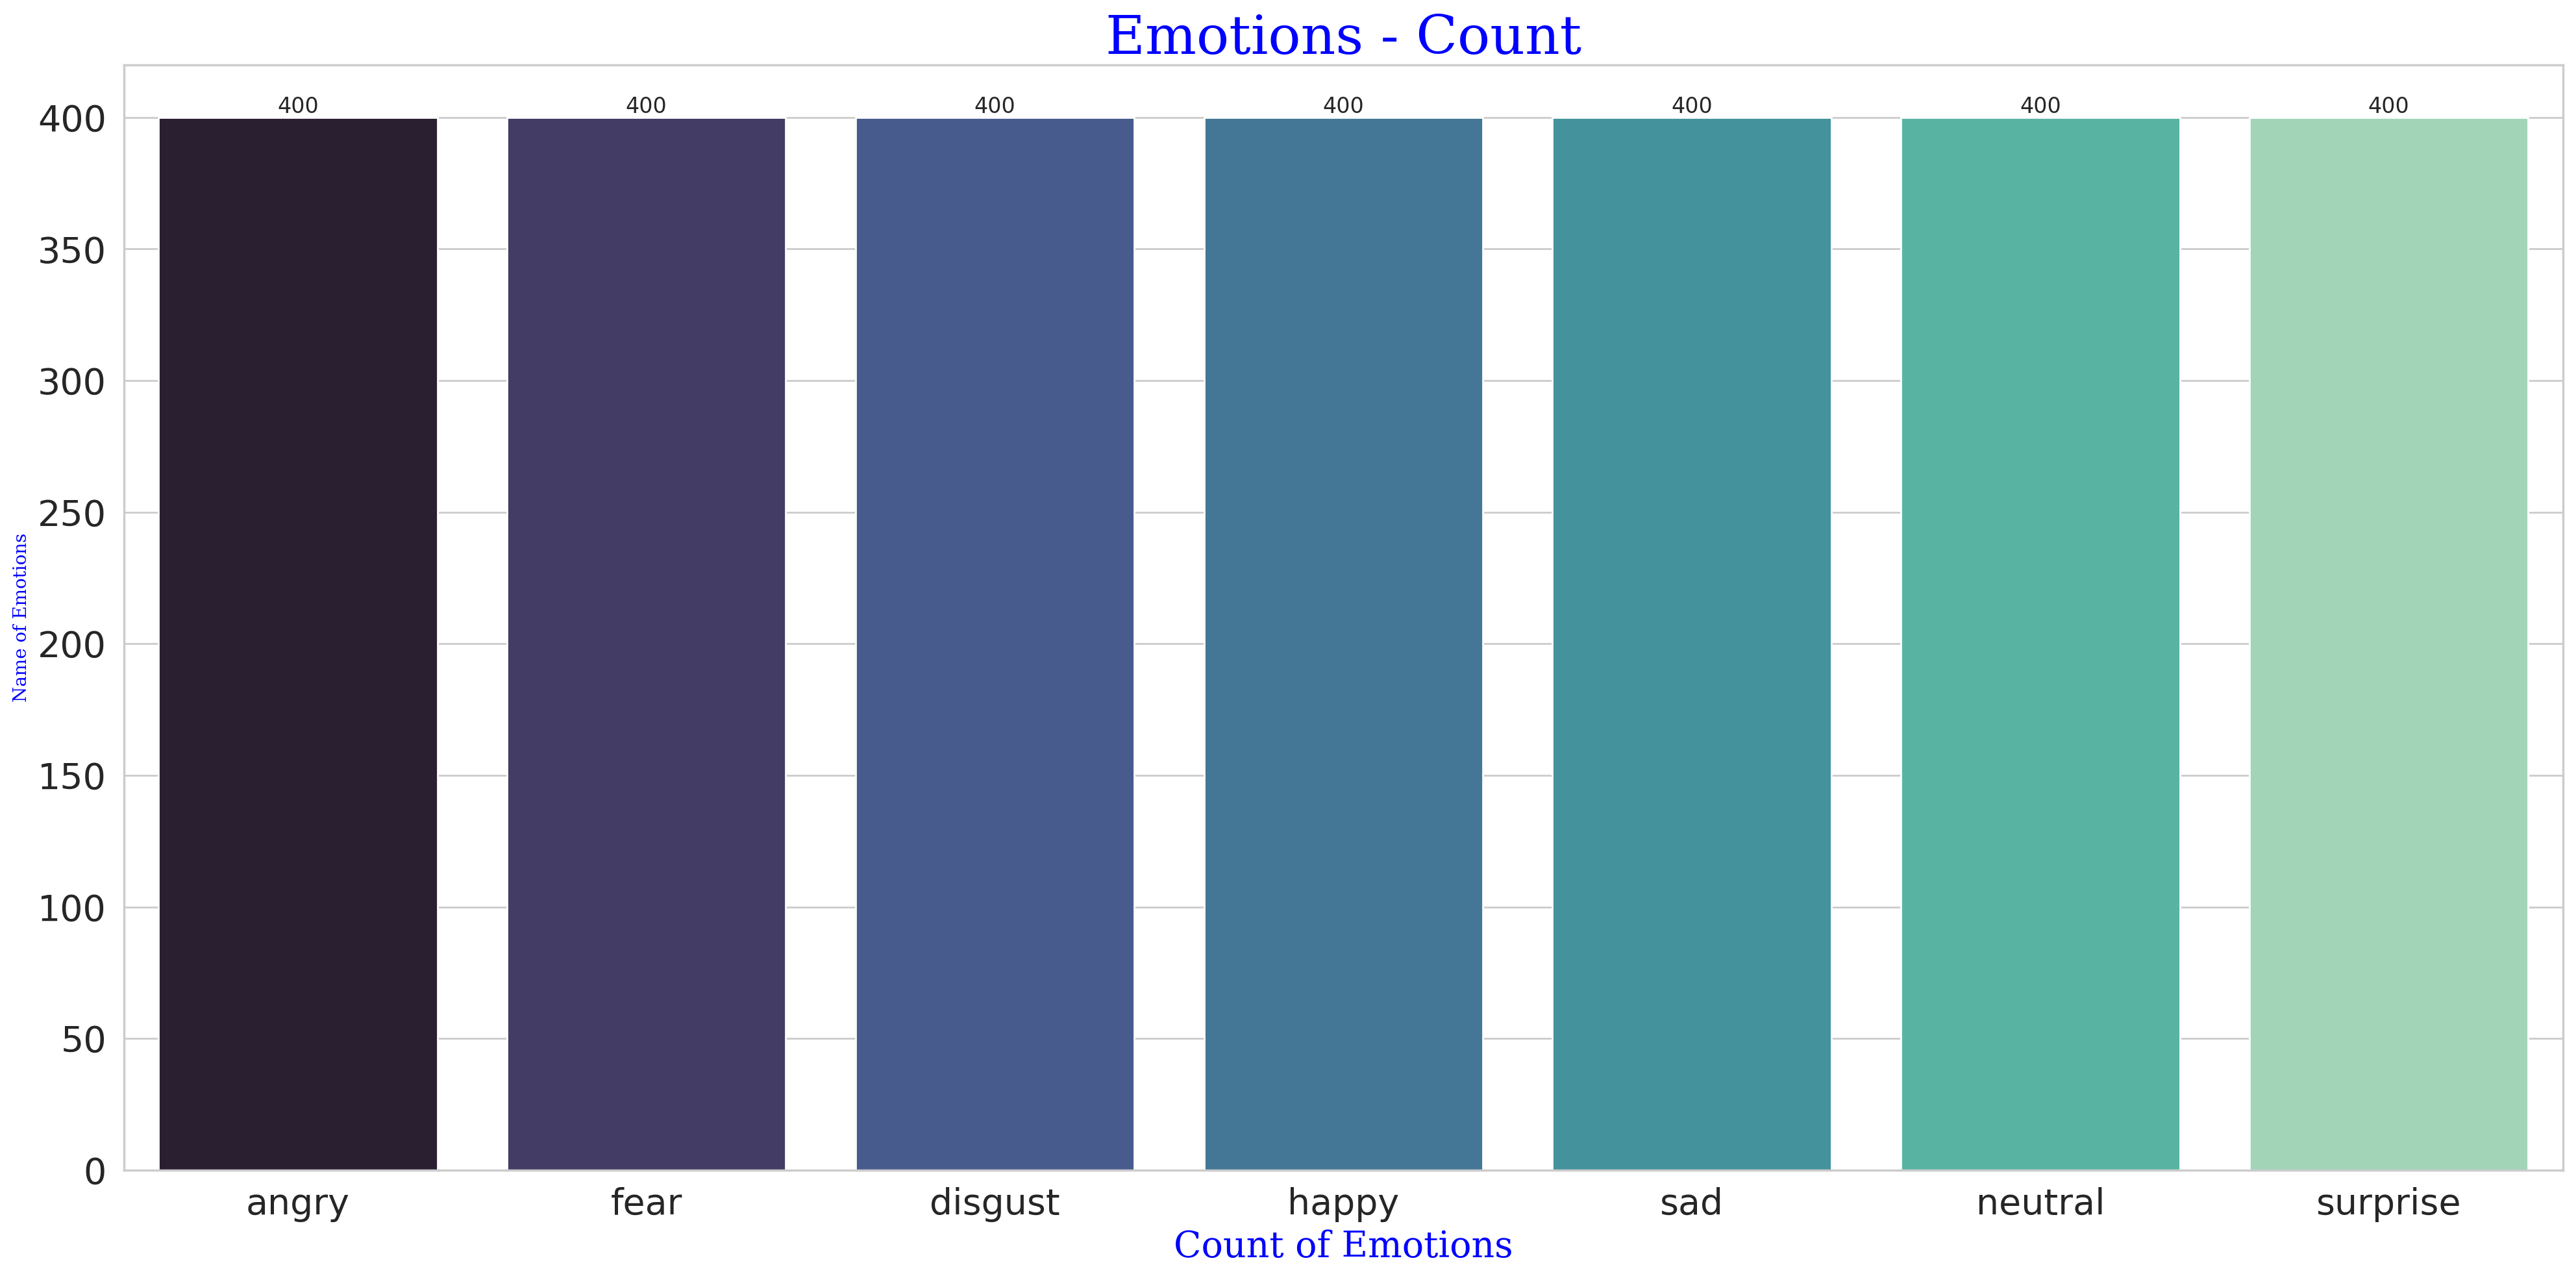

In [38]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10), dpi=200)
count_emotion = tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= count_emotion.index, y= count_emotion.values, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar plot visualizes the count of different emotions in the TESS dataset. Each bar represents a specific emotion, and the height of the bar indicates the number of samples available for that emotion.

Here’s an analysis:

- **X-axis (horizontal)**: Represents the different emotions such as "neutral," "angry," "sad," "fear," "surprise," "happy," and "disgust."
- **Y-axis (vertical)**: Displays the count of audio samples for each emotion.

Key observations:
- All emotions, including "neutral," "angry," "sad," "fear," "surprise," "happy," and "disgust," have the same number of samples—400 for each.
- This indicates that the dataset is **perfectly balanced** across all emotion classes, which is advantageous for training machine learning models. Having equal representation helps prevent the model from becoming biased toward a particular emotion class.

In summary, the TESS dataset offers a balanced distribution of emotions, making it ideal for training models without needing any adjustments for class imbalances.

# Combining the DataFrames

In [39]:
sum_df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis = 0)
sum_df.to_csv("Sum_df.csv",index=False)

In [40]:
sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                                      'color': 'black',
                                      'border-color': 'black'})

The dataset contains two columns:

1. **Emotions**: This column represents the emotion labels associated with the audio files (e.g., "happy," "fear," "sad").
2. **Path**: This column contains the file paths to the corresponding audio files in your dataset.

The dataset is a list of the audio file paths along with their respective emotion labels, which is likely being used for loading and processing the audio files for your Speech Emotion Recognition project.

In [41]:
[sum_df["Emotions"].unique().tolist() for i in sum_df.columns]

[['neutral',
  'angry',
  'disgust',
  'fear',
  'happy',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness'],
 ['neutral',
  'angry',
  'disgust',
  'fear',
  'happy',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness']]

## Barplot against Various Emotions

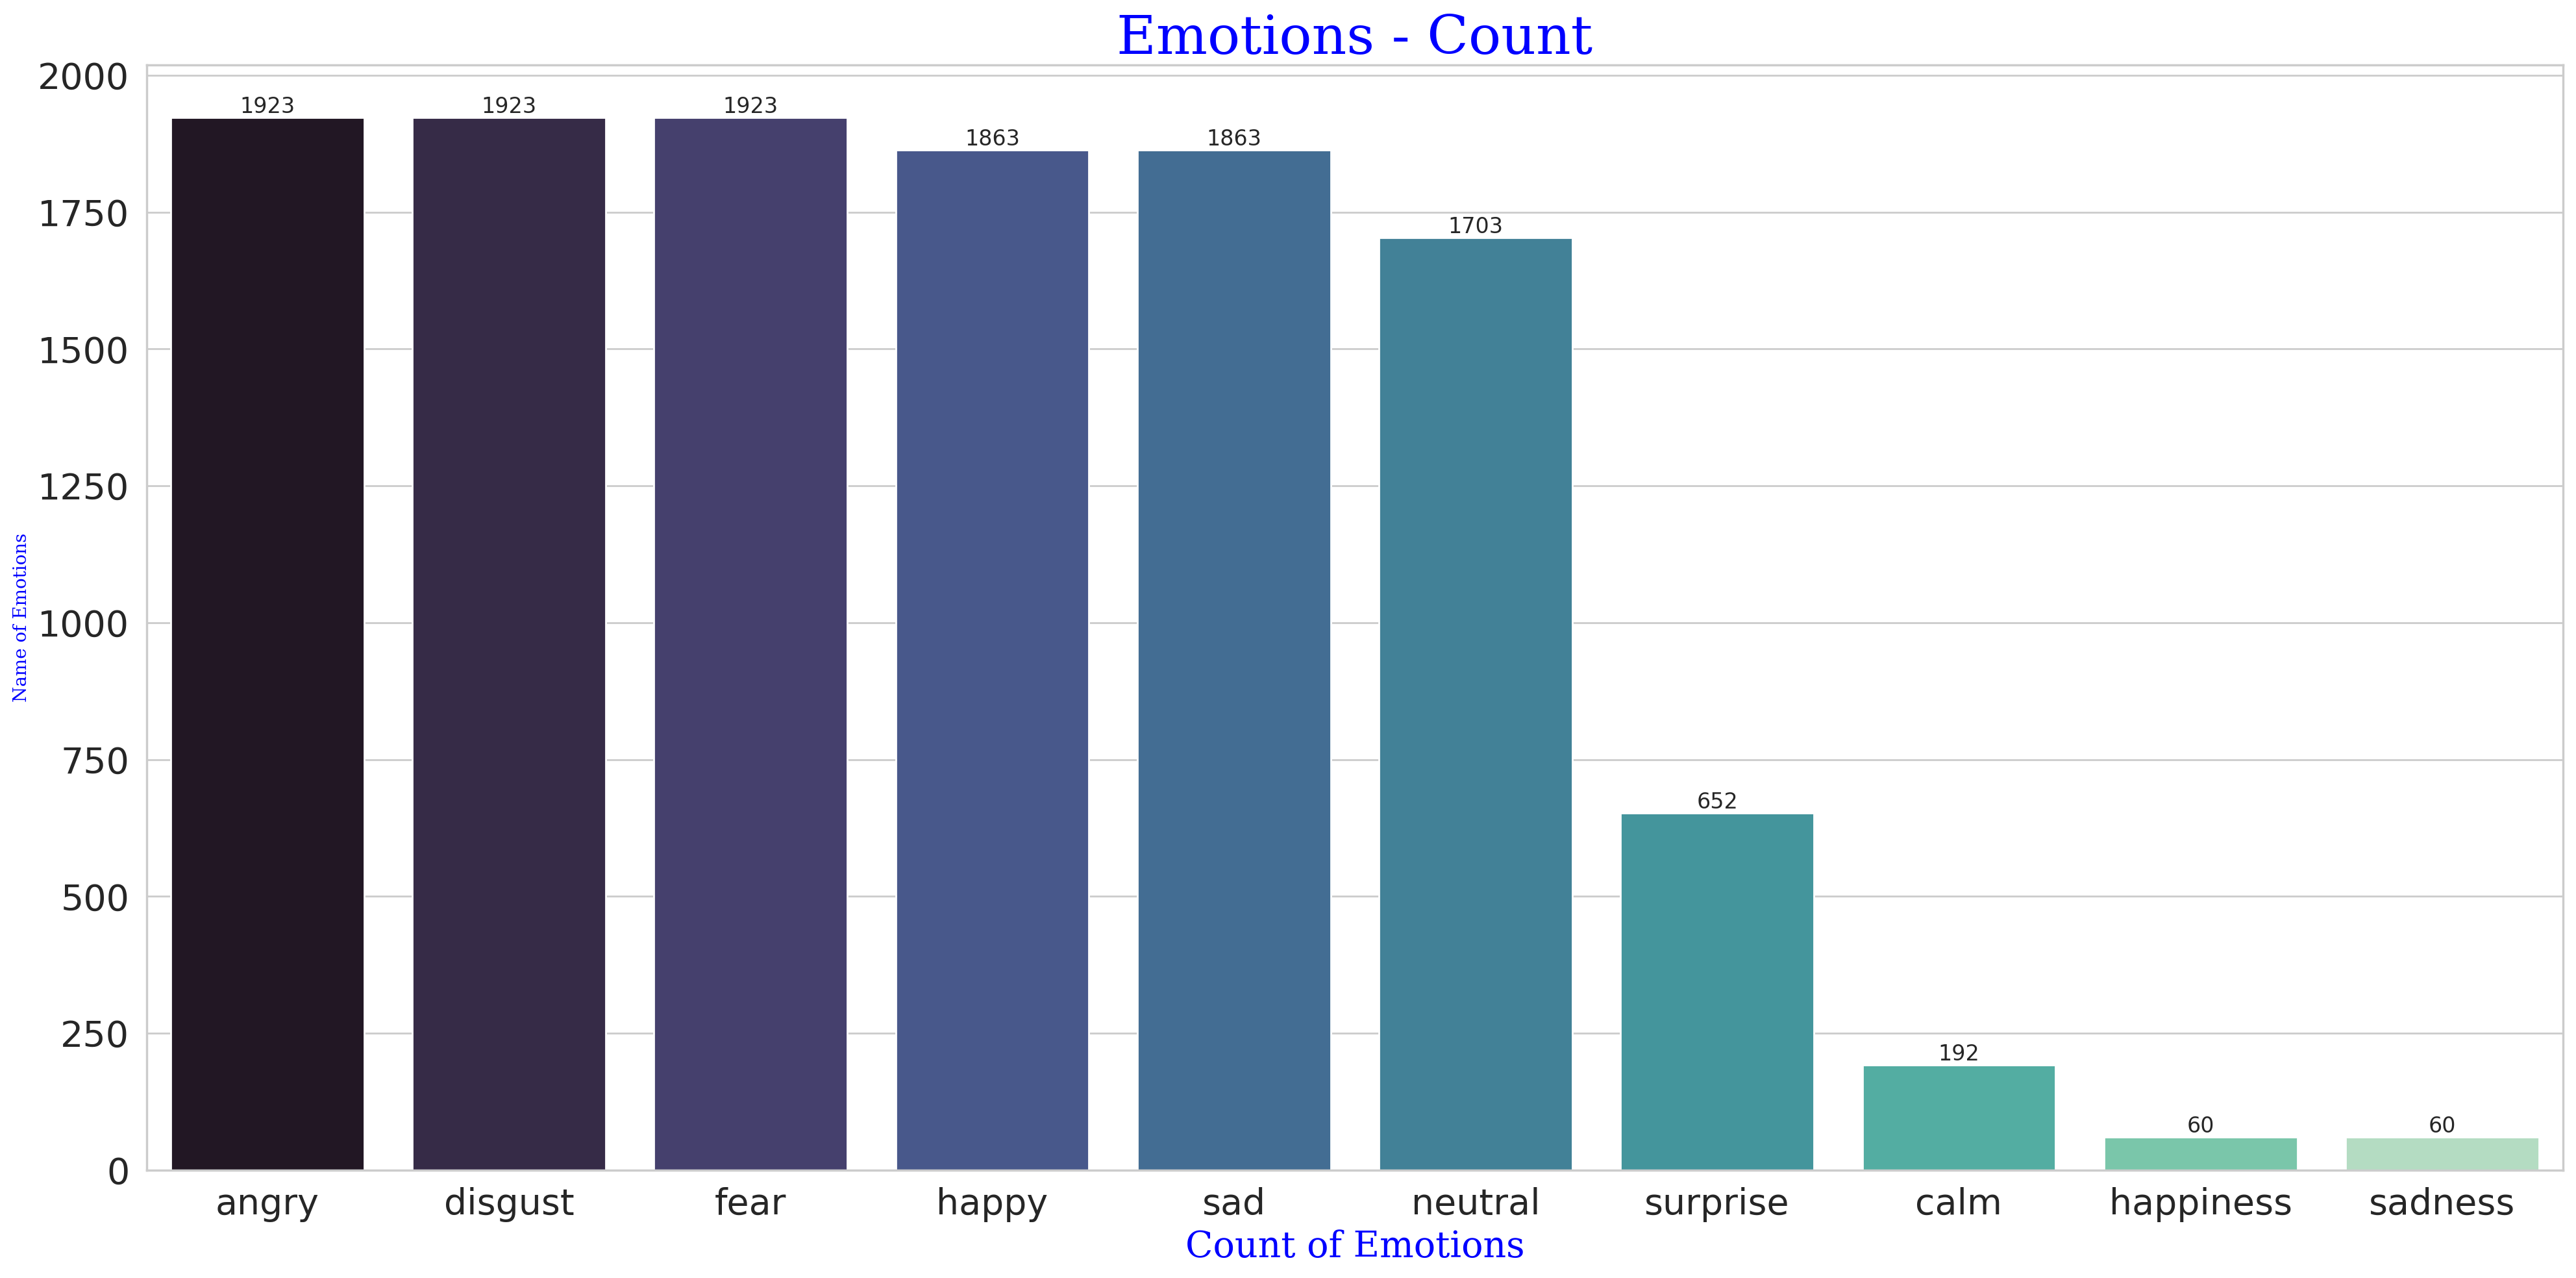

In [42]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10), dpi=200)
count_emotion = sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= count_emotion.index, y= count_emotion.values, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
sum_df_rep = sum_df.copy()
sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [44]:
[sum_df_rep["Emotions"].unique().tolist() for i in sum_df_rep.columns]

[['neutral', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'],
 ['neutral', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']]

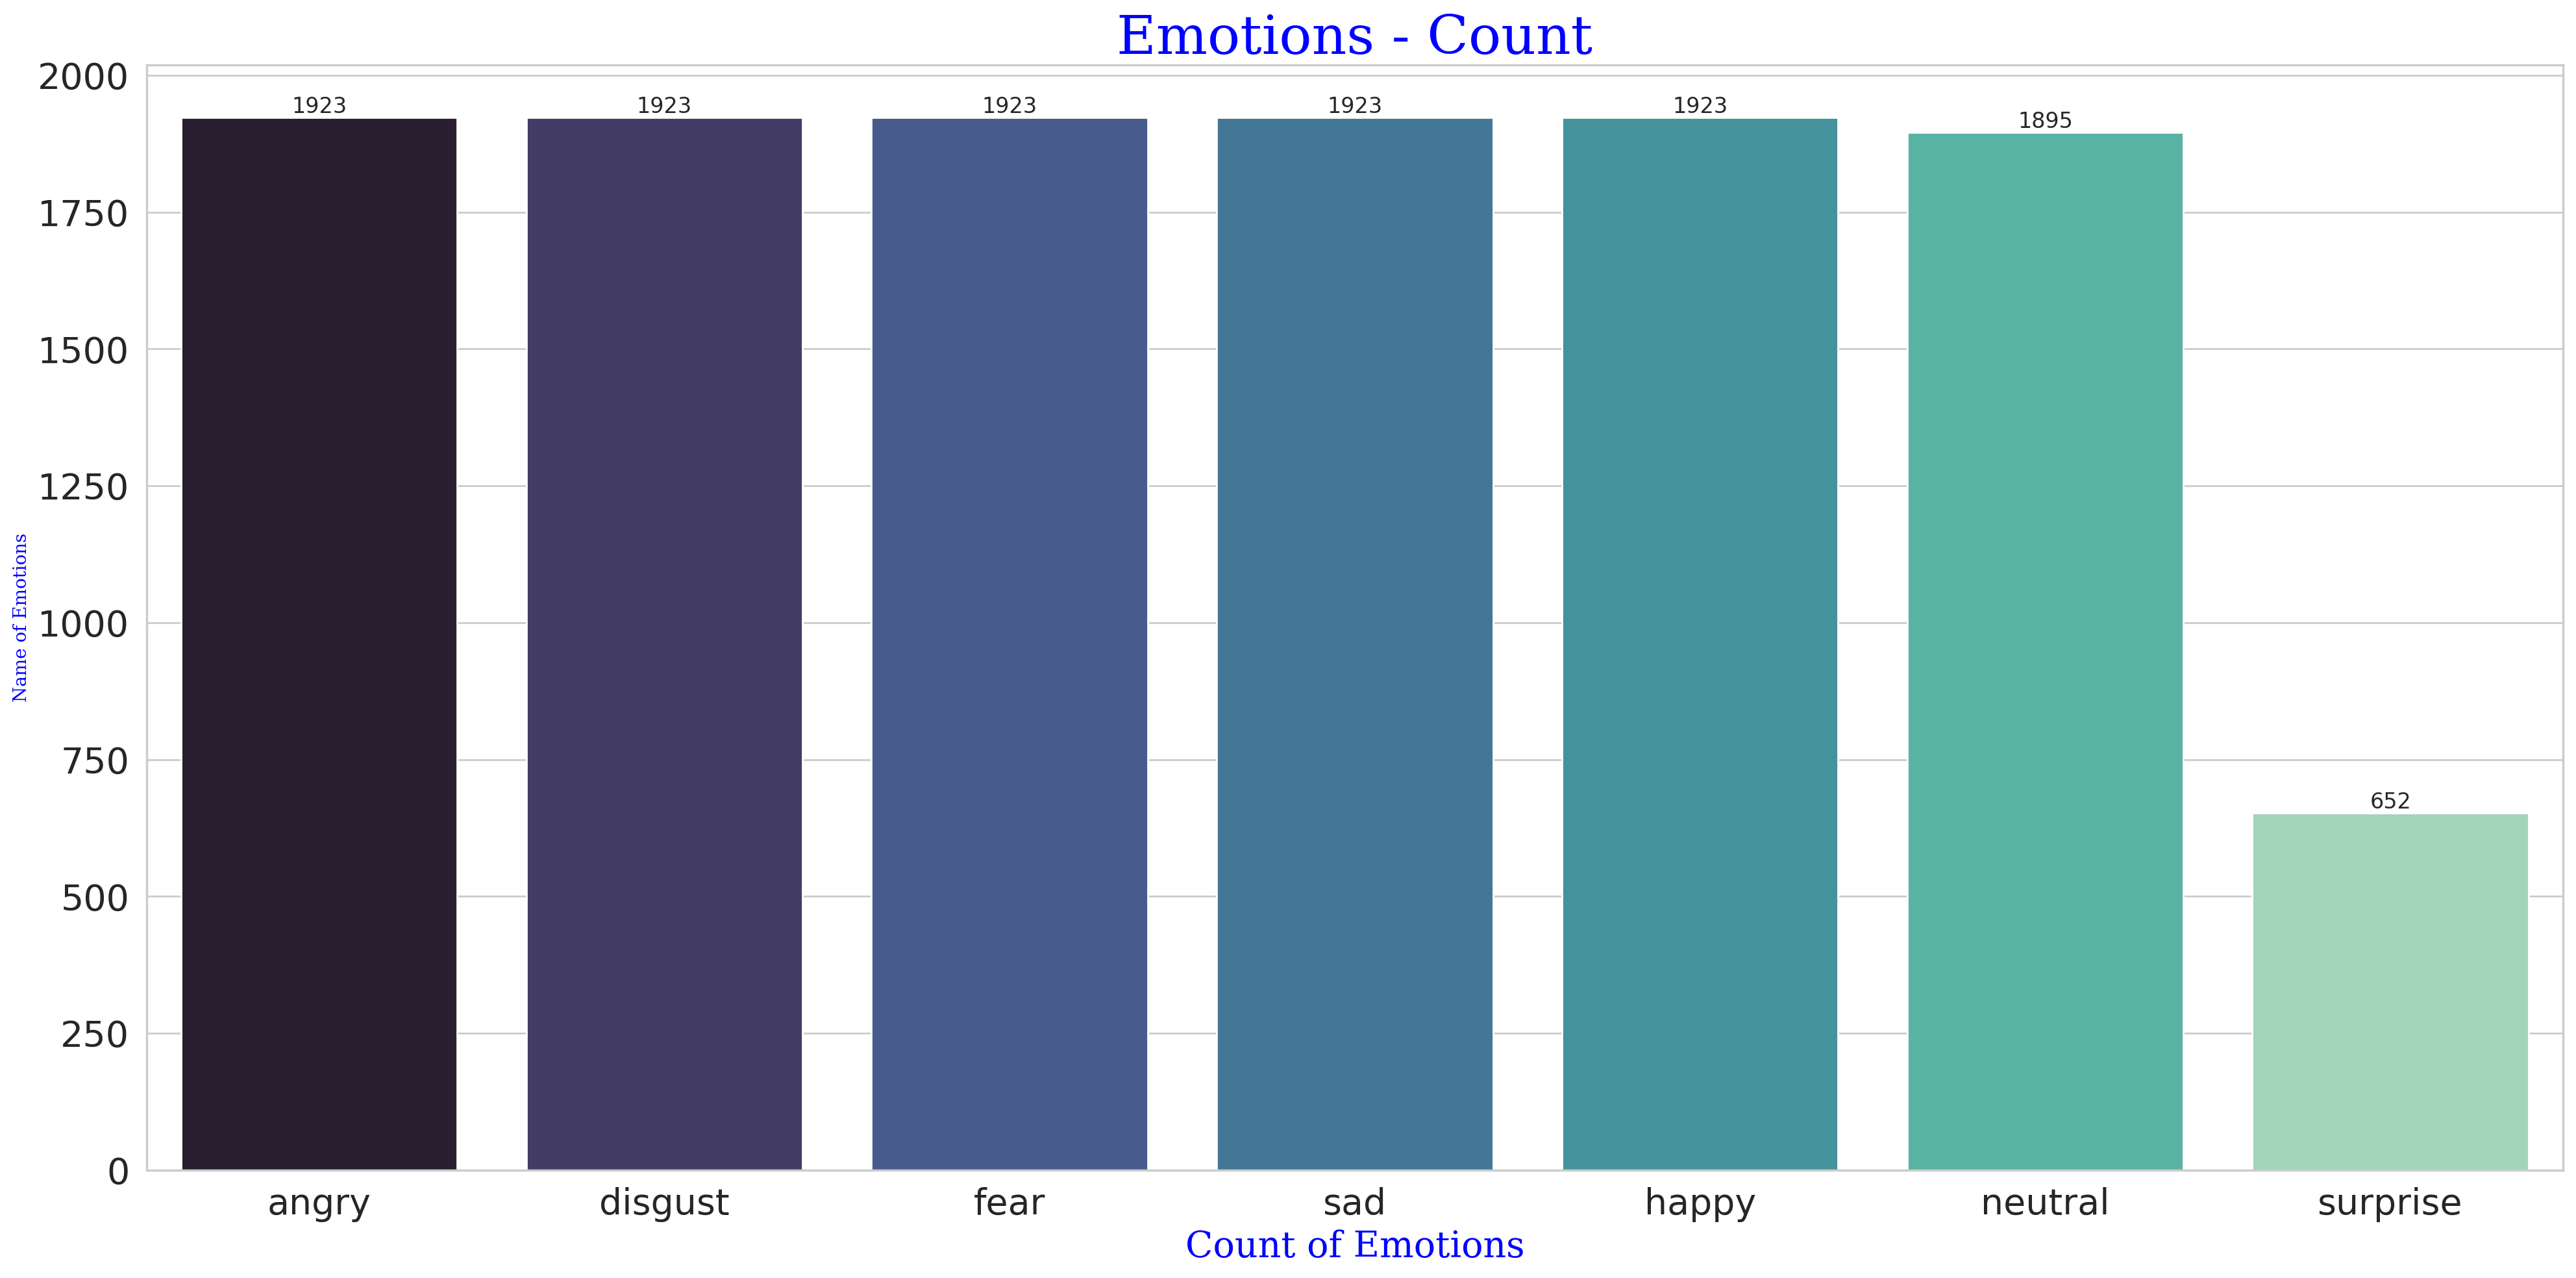

In [45]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
count_emotion = sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= count_emotion.index, y= count_emotion.values, palette="mako")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font3)
plt.xlabel("Count of Emotions", fontdict= font2)
plt.title("Emotions - Count", fontdict= font1)

for i, count in enumerate(count_emotion.values):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The bar plot visualizes the count of different emotions in your dataset. Here's a breakdown:

- **X-axis (horizontal)**: Represents the different emotions in the dataset—"happy," "fear," "sad," "angry," "disgust," "neutral," and "surprise."
- **Y-axis (vertical)**: Shows the count of audio samples for each emotion.

Key observations:
- The emotions "happy," "fear," "sad," "angry," and "disgust" each have **1923 samples**, making them equally represented in the dataset.
- The "neutral" emotion has **1895 samples**, which is slightly less than the other emotions but still relatively close in count.
- The "surprise" emotion is significantly underrepresented, with only **652 samples** compared to the other emotions.

This indicates that most of the emotions are well-balanced except for "surprise," which has far fewer samples. If you're training a model, this imbalance could cause the model to underperform when predicting the "surprise" emotion. To address this, you may want to consider techniques such as oversampling or data augmentation for "surprise," or potentially using class weighting to ensure that the model doesn't become biased toward the more frequently occurring emotions.

## Creating Audio Arrays

In [46]:
%%time
audio_arrays = []

for i in sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)

sum_df_rep['Arrays'] = audio_arrays

CPU times: user 48 s, sys: 4.47 s, total: 52.5 s
Wall time: 54.8 s


In [47]:
sum_df_rep.head().style.set_properties(**{'background-color': '#9490ff',
                                          'color': 'black',
                                          'border-color': 'black'})

# Happy

In [48]:
happy_sp = sum_df_rep[sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = sum_df_rep[sum_df_rep['Emotions'] == 'happy']['Arrays']

## Plotting the Waveform of a Sample of Happy

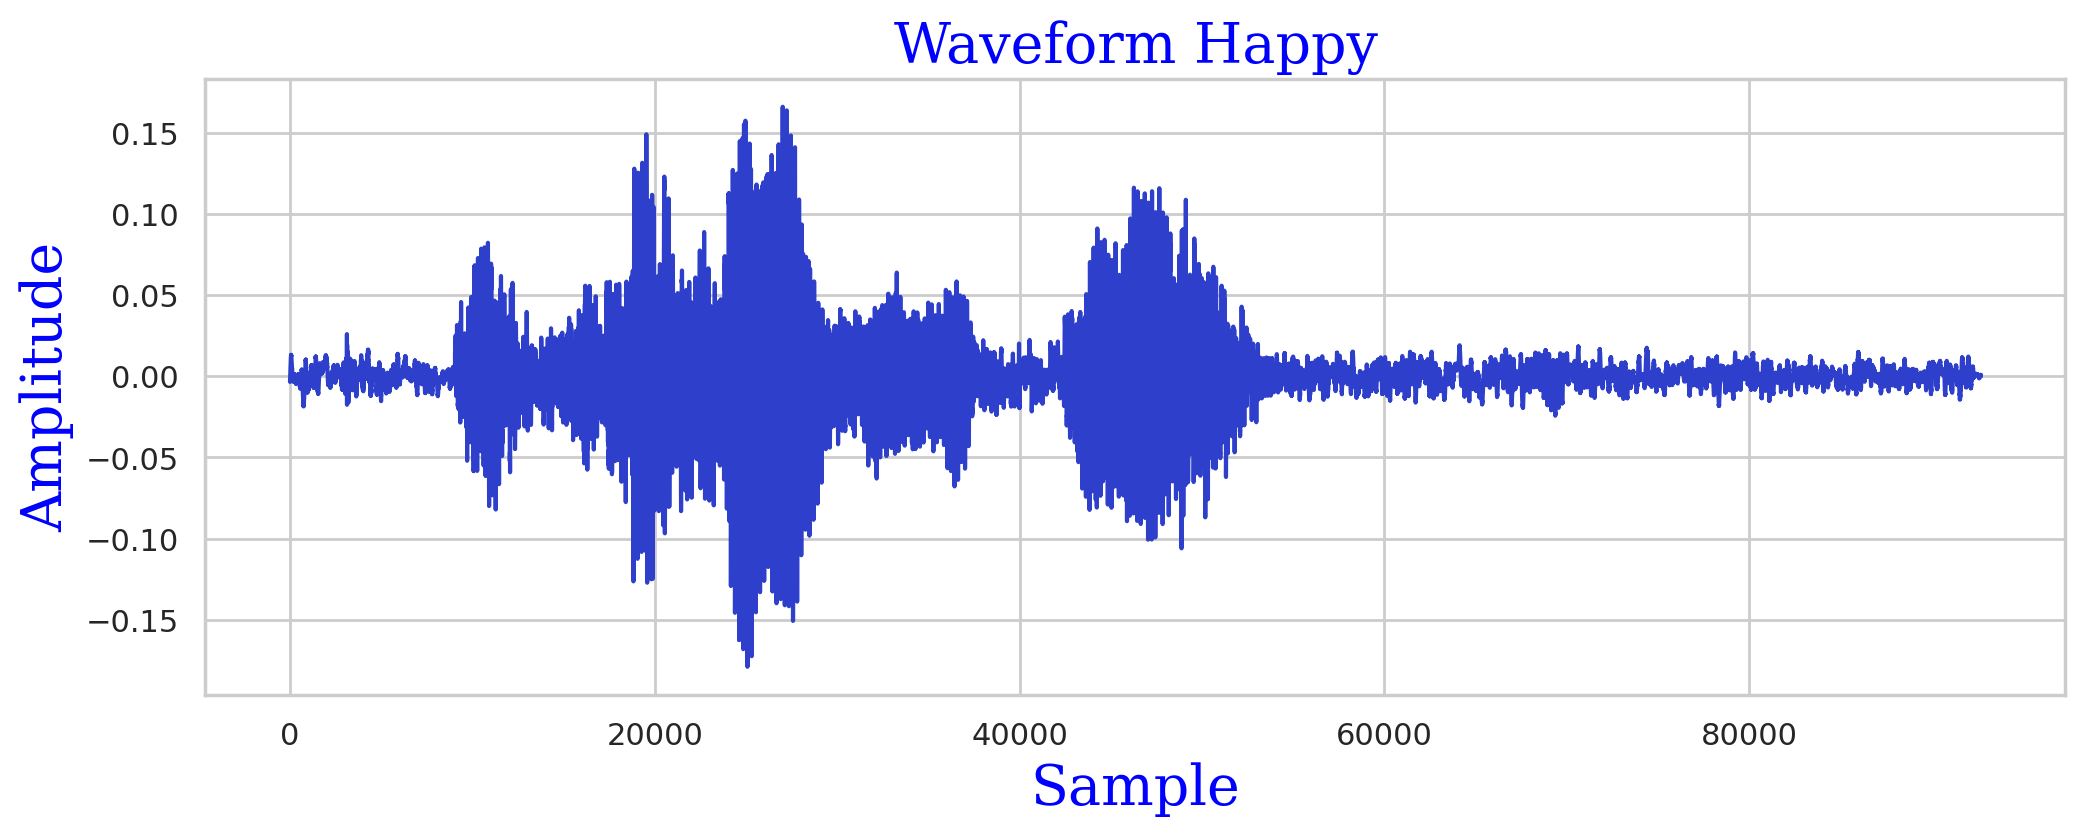

In [49]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

The waveform plot visualizes an audio signal labeled as "happy." Here's a detailed explanation of the plot:

- **X-axis (horizontal)**: Represents the time domain, but in this case, it's shown as "Sample" which indicates the number of data points (or samples) in the audio signal. The waveform appears to cover approximately 80,000 samples.
  
- **Y-axis (vertical)**: Represents the amplitude of the audio signal. Amplitude indicates the intensity or loudness of the sound at each point in time. Positive and negative values signify the waveform's fluctuations as sound waves move through compression and rarefaction phases.

Key observations:
- The amplitude fluctuates around zero, as expected for an audio signal.
- In the middle of the waveform, there is an area of higher amplitude, which likely represents the peak in the intensity of the "happy" speech, indicating that the speaker is expressing happiness more strongly during that segment.
- The surrounding sections of the waveform have lower amplitude, which could represent pauses or less intense speech.
  
This waveform provides a visual representation of how the sound intensity changes over time. The larger the amplitude, the louder the sound at that particular point in the audio file.

## Listening to the Sample

In [50]:
Audio(happy_sp.iloc[0])

## Random Sampling

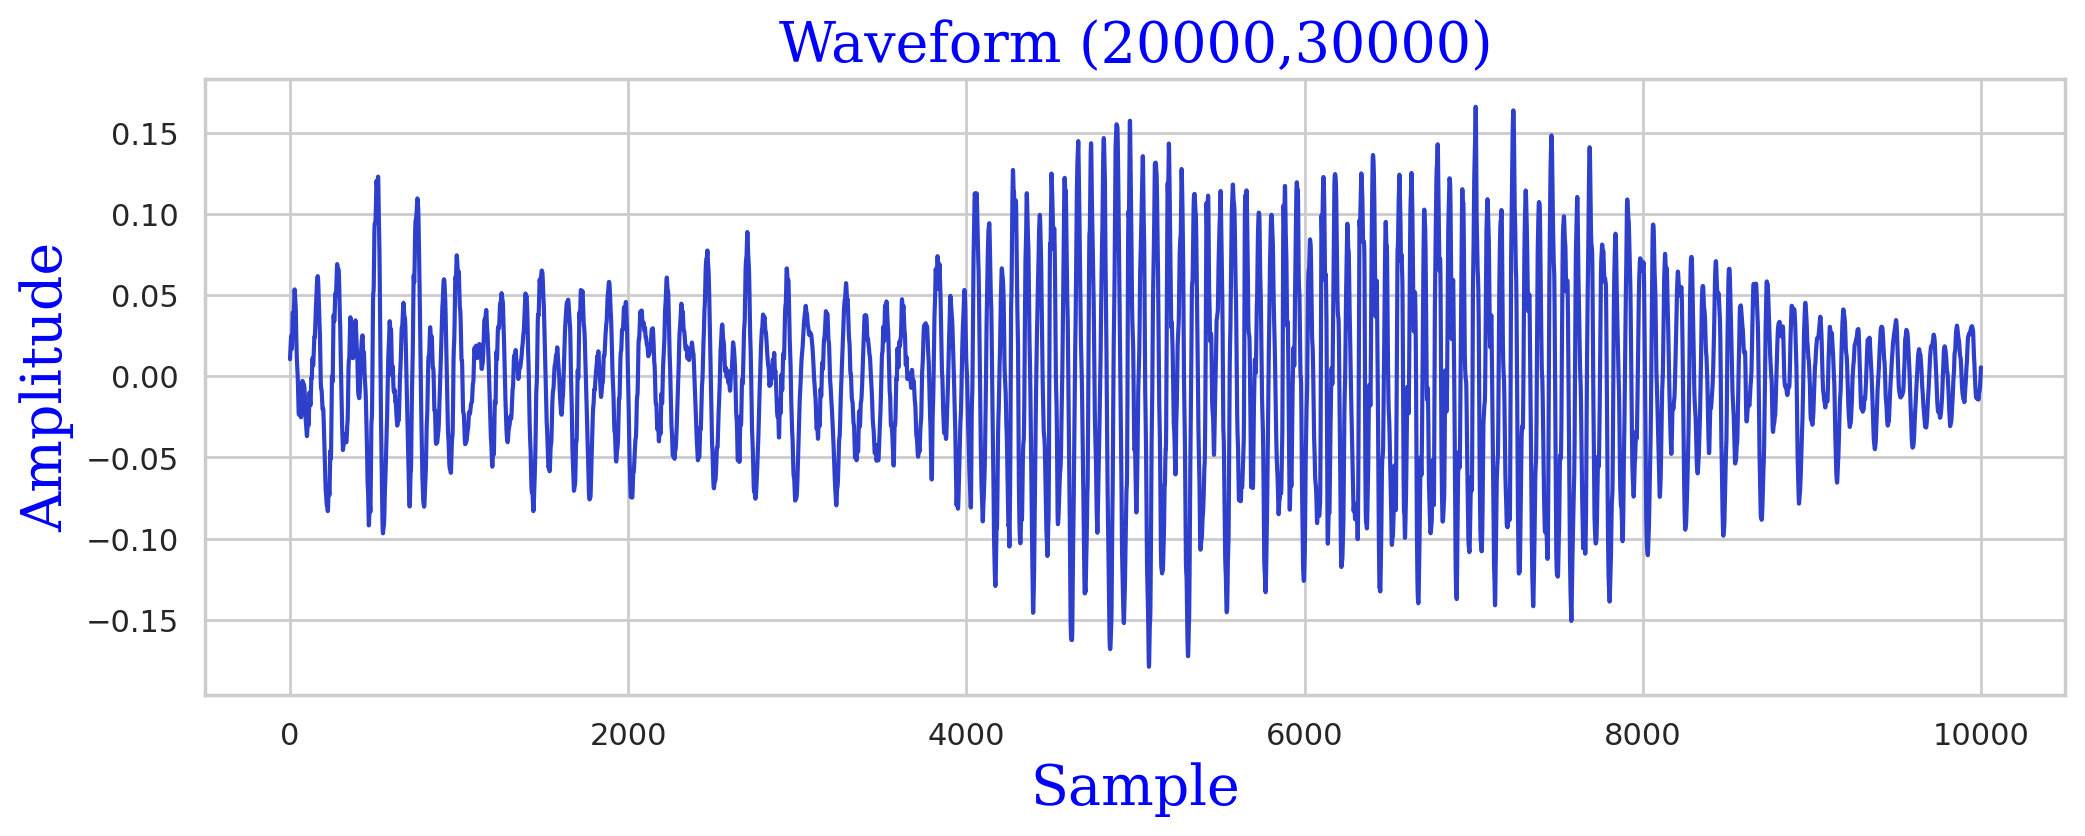

In [51]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

The waveform plot represents a specific segment of an audio signal, focusing on the range from **sample 20,000 to 30,000**. Here's a detailed explanation:

- **X-axis (horizontal)**: Represents the sample number, showing the data points in the time domain. This segment spans from sample 0 to around 10,000 within the selected range (20,000 to 30,000).
  
- **Y-axis (vertical)**: Represents the amplitude of the signal. Amplitude is a measure of how loud or soft the sound is at any given moment. The plot shows fluctuations between positive and negative values, indicating the variations in sound pressure.

Key observations:
- The waveform starts with relatively low amplitude and more regular oscillations, indicating quieter or more consistent speech at the beginning of this segment.
- Towards the latter half, the amplitude increases significantly, reflecting a louder or more pronounced part of the audio. This suggests that in this particular segment, the speaker may be expressing stronger emotion or speaking louder.
  
This waveform provides insight into how the sound evolves over this specific range of samples, with increasing intensity towards the end of the segment.

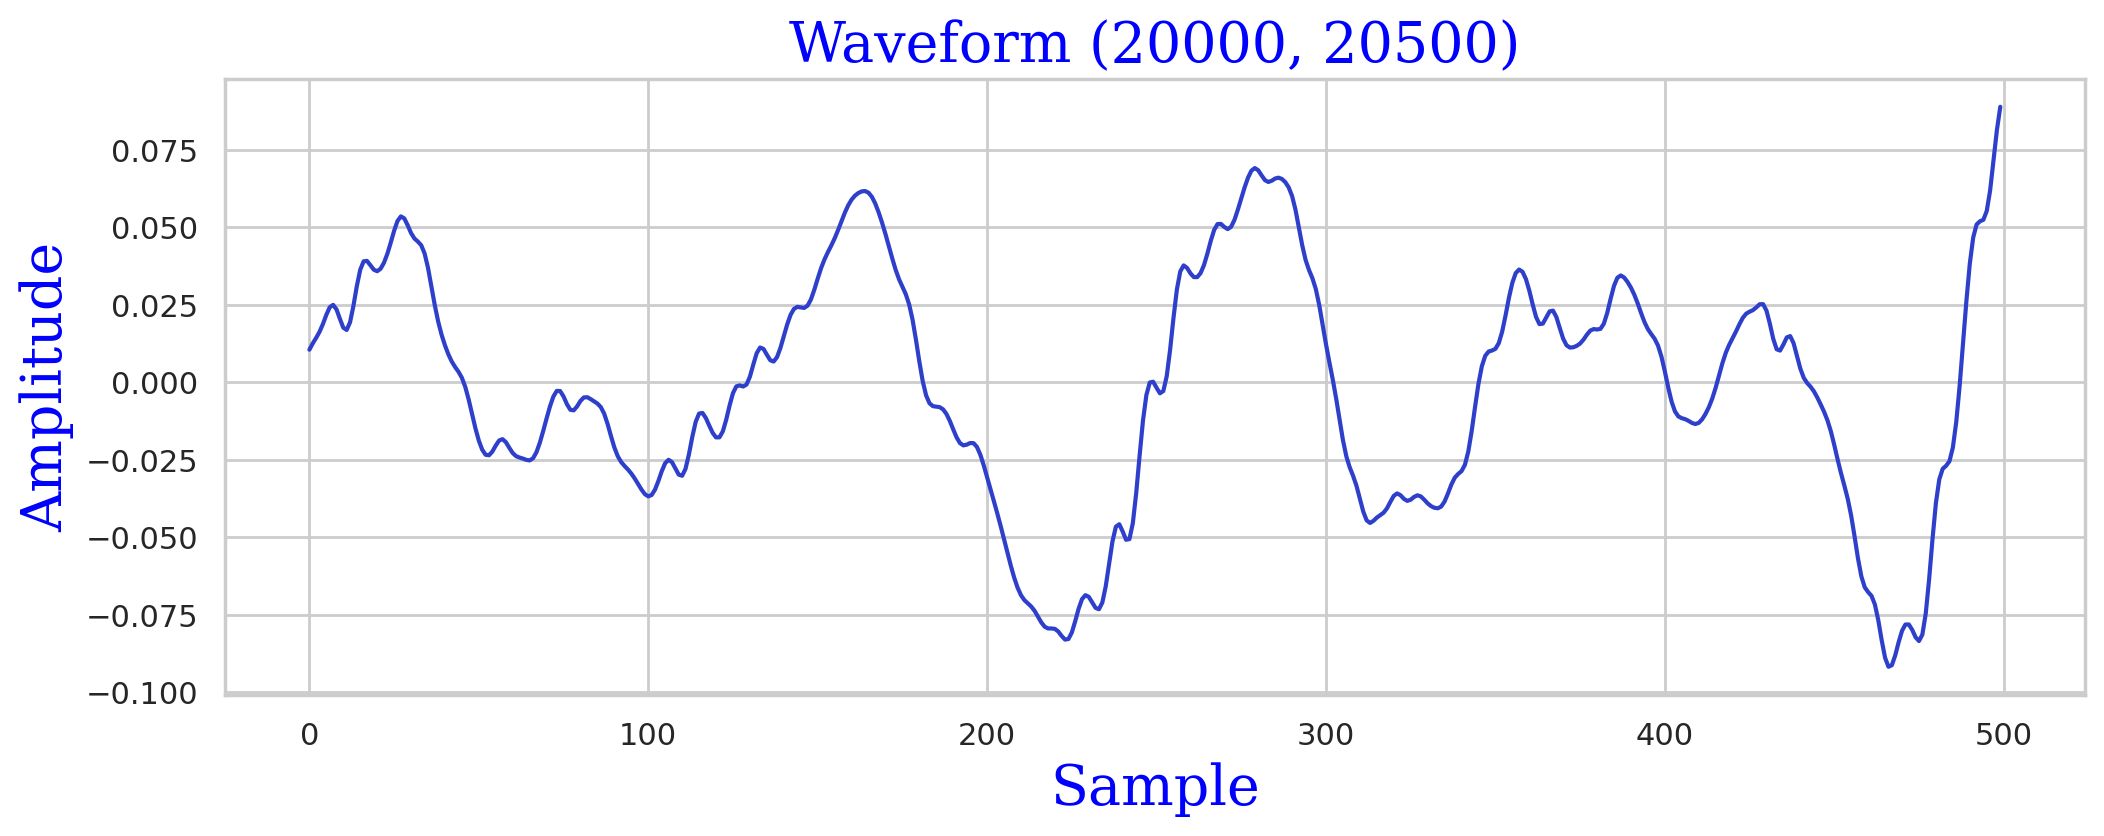

In [52]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

The waveform plot represents a small segment of an audio signal, focusing on the range from **sample 20,000 to 20,500**. Here’s an explanation of the key elements:

- **X-axis (horizontal)**: Represents the sample number, showing a zoomed-in view of the audio signal over a 500-sample window.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, which indicates the loudness or intensity of the sound at each sample point. Amplitude values vary between approximately -0.006 and 0.008.

Key observations:
- The amplitude fluctuates within a relatively small range, suggesting this is a quieter or less intense part of the audio signal.
- There are both upward (positive amplitude) and downward (negative amplitude) oscillations, which are characteristic of speech waveforms.
- This segment likely corresponds to a brief moment in the speech, capturing finer details of how the sound evolves within this narrow time window.

This zoomed-in view provides a detailed look at the fine-grained fluctuations in the audio signal, which can be useful for analyzing specific patterns or features in the waveform, such as speech phonemes or other sound characteristics.

# Fear

In [53]:
fear_sp = sum_df_rep[sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = sum_df_rep[sum_df_rep['Emotions'] == 'fear']['Arrays']

## Plotting the Waveform of a Sample of Fear

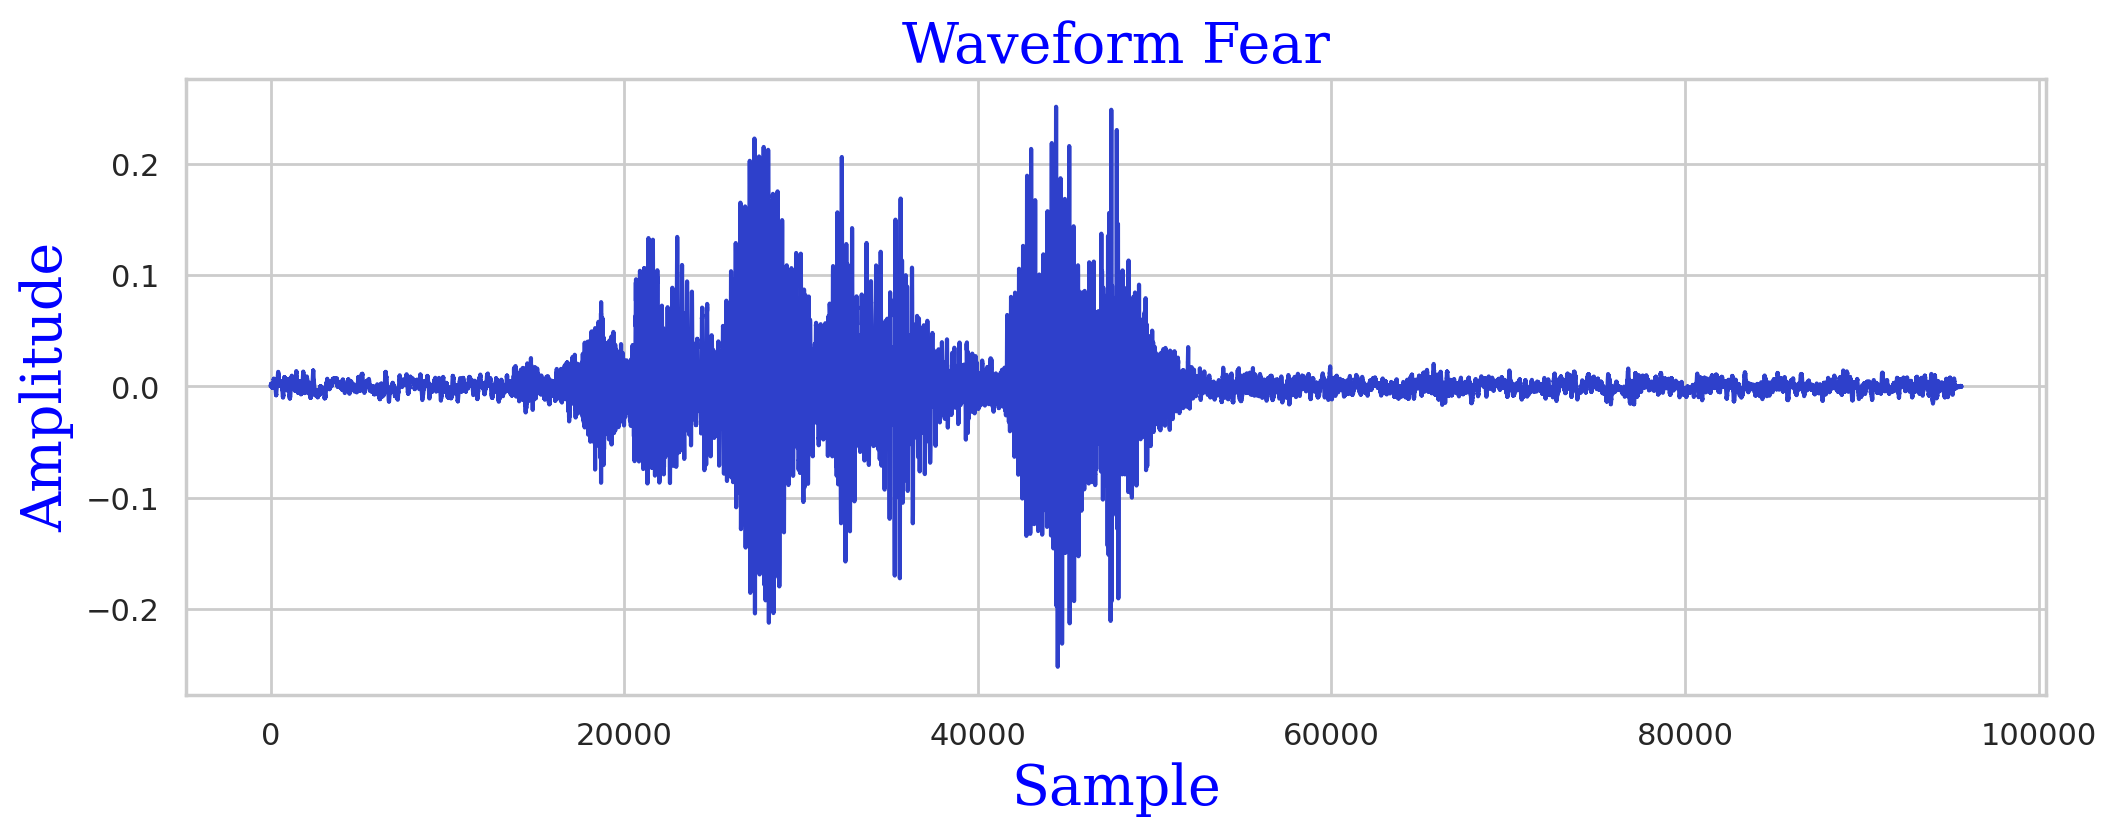

In [54]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

The waveform plot is labeled as "Fear" and visually represents the amplitude of an audio signal over time (or sample points).

Here’s an analysis:

- **X-axis (horizontal)**: Represents the number of samples, showing the progression of the audio signal over time. The plot spans approximately 100,000 samples.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, indicating the intensity or loudness of the sound at each sample point. The amplitude values range between approximately -0.4 and 0.4.

Key observations:
- **Early segment (before 50,000 samples)**: The waveform remains relatively low and consistent in amplitude, suggesting a quieter or less intense portion of the speech. This might represent a neutral or low-energy section.
- **Middle segment (around 60,000 samples)**: There is a significant increase in amplitude, indicating a burst of energy in the speech. This spike is likely associated with the expression of fear, where the speaker may be raising their voice or projecting stronger emotions.
- **Later segment (after 70,000 samples)**: The amplitude begins to taper off, gradually returning to a lower level. This may indicate the speaker calming down or ending their emotional expression.

This waveform captures the overall pattern of the speaker's voice, starting calmly, reaching a peak during a fearful expression, and then calming down again. The sharp spike in the middle corresponds to a heightened emotional state, which is characteristic of fear-related speech.

## Listening to the Sample

In [55]:
Audio(fear_sp.iloc[0])

# Disgust

In [56]:
disgust_sp = sum_df_rep[sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = sum_df_rep[sum_df_rep['Emotions'] == 'disgust']['Arrays']

## Plotting the Waveform of a Sample of Disgust

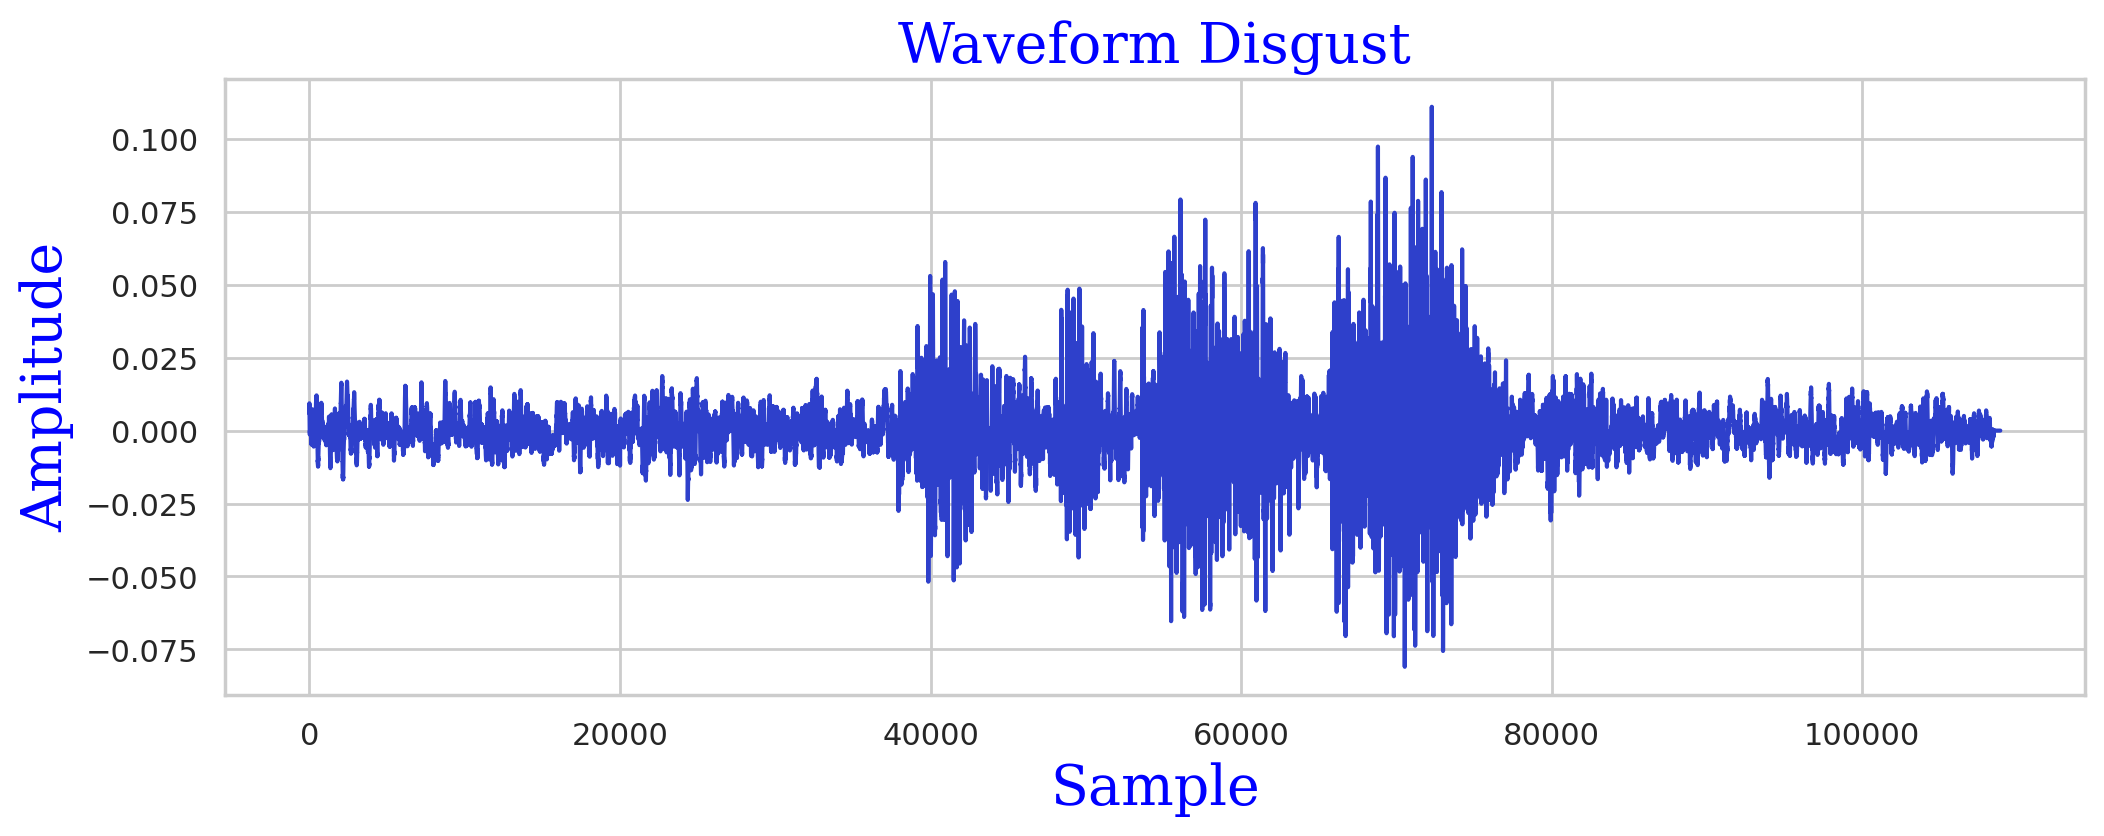

In [57]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

The waveform plot represents the emotion "Disgust," capturing how the amplitude of the audio signal changes over time.

Here’s a breakdown of the key details:

- **X-axis (horizontal)**: Represents the sample number, with the signal spanning over approximately 150,000 samples. This shows how the audio evolves over time, with each sample representing a point in time within the audio file.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, which indicates the loudness or intensity at each point in time. The amplitude ranges from around -1.0 to 1.0, showing significant variation.

Key observations:
- **Early segment (before 40,000 samples)**: The waveform starts off relatively low in amplitude, suggesting the beginning of the audio is less intense, possibly capturing neutral speech or a quieter part of the expression of disgust.
- **Middle segment (40,000 - 100,000 samples)**: There’s a notable increase in the amplitude, with several peaks and valleys. This may correspond to the speaker intensifying their expression of disgust, with stronger vocalizations or variations in pitch.
- **Late segment (after 100,000 samples)**: The waveform shows much larger fluctuations, with more pronounced peaks and valleys, indicating a heightened emotional expression. This part of the signal could represent the climax of the disgust expression, where the speaker is likely emphasizing their speech strongly.

This waveform provides a detailed representation of the expression of disgust, starting with a calmer or less intense section and growing into a more pronounced and emotionally charged vocalization. The higher peaks later in the waveform suggest moments where the speaker expresses the emotion more strongly.

## Listening to the Sample

In [58]:
Audio(disgust_sp.iloc[0])

# Sad

In [59]:
sad_sp = sum_df_rep[sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = sum_df_rep[sum_df_rep['Emotions'] == 'sad']['Arrays']

## Plotting the Waveform of a Sample of Sad

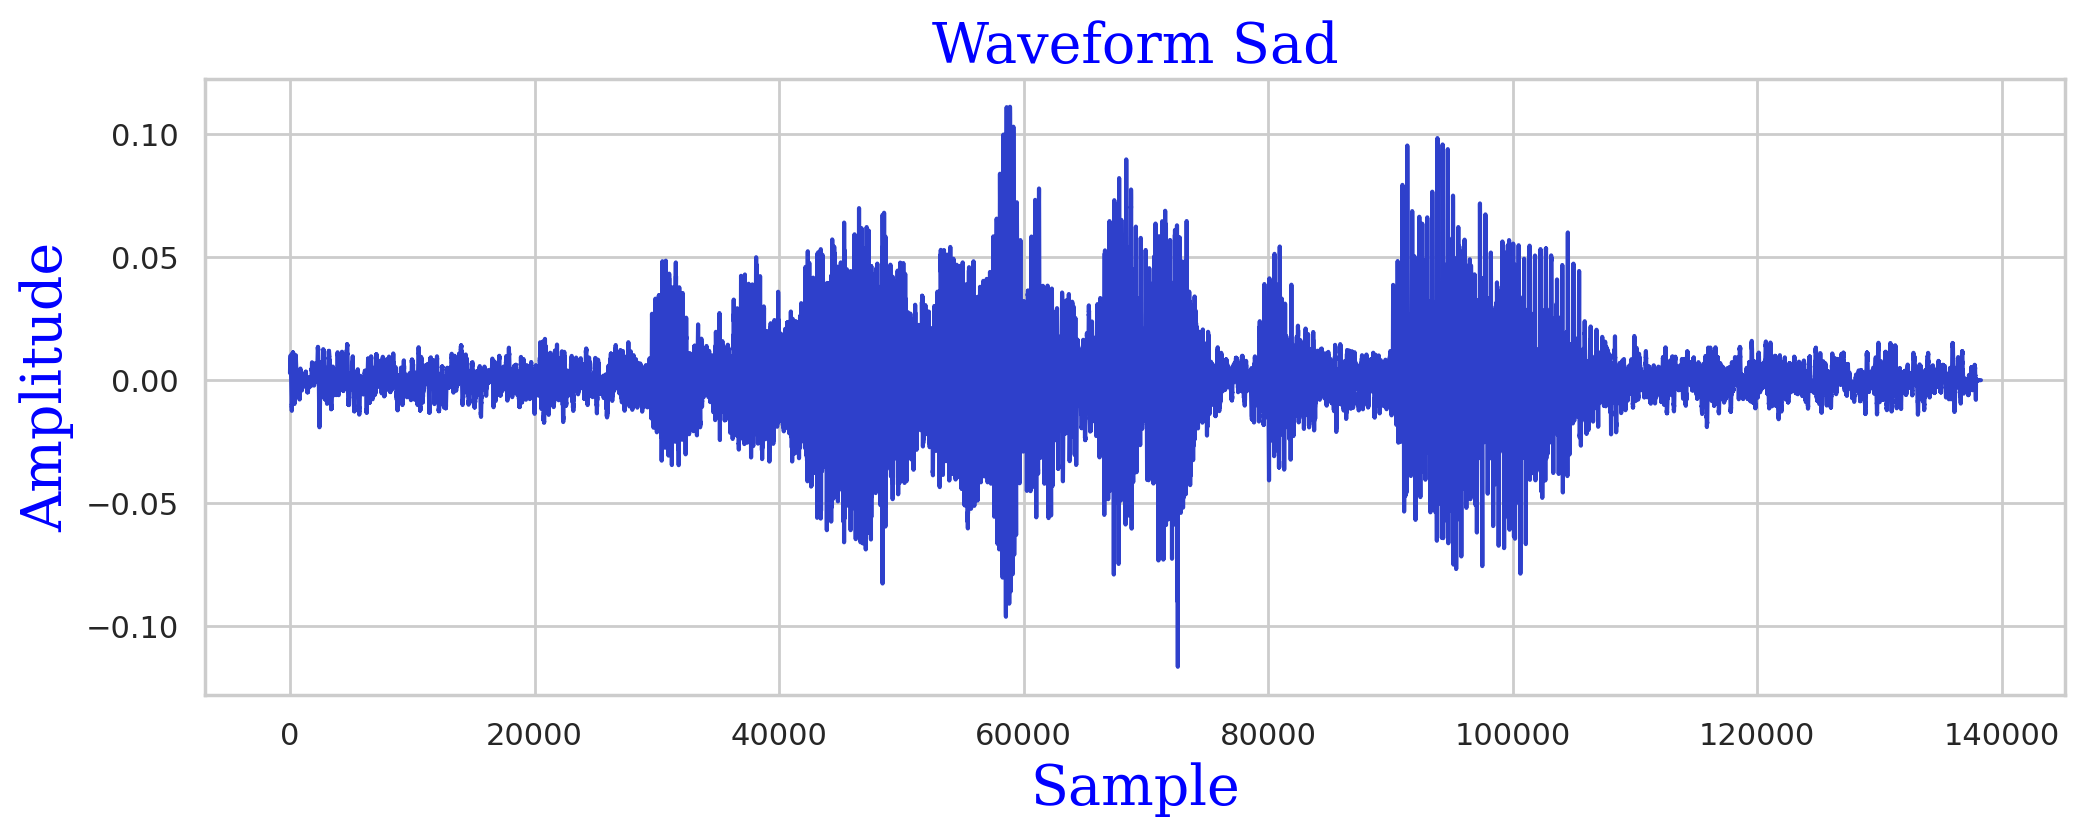

In [60]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

The waveform plot represents the emotion "Sad" and shows how the amplitude of the audio signal changes over time.

Here’s a detailed analysis:

- **X-axis (horizontal)**: Represents the sample number, spanning approximately 130,000 samples. This shows how the audio signal evolves over time, with each sample representing a point in time within the recording.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, indicating the intensity or loudness of the sound at each point in time. The amplitude values range between approximately -0.08 and 0.08.

Key observations:
- **Early segment (before 40,000 samples)**: The amplitude is relatively low and consistent, suggesting a quieter or more neutral section of speech, which could reflect the calm and controlled nature of sadness.
- **Middle segment (between 40,000 and 100,000 samples)**: There is a noticeable increase in the amplitude, with larger fluctuations, indicating moments of higher intensity. This could correspond to the speaker expressing more emotion, with a slightly raised voice or deeper inflection, typical of sad speech.
- **Later segment (after 100,000 samples)**: The amplitude decreases but remains somewhat varied, suggesting the speech becomes more controlled or returns to a calmer state, but still retains some emotional intensity.

The waveform captures the pattern typical of sad speech: it starts off softly, rises to express stronger emotions, and then gradually returns to a calmer tone. The lack of sharp spikes and the overall smoothness of the waveform aligns with the slower, more controlled expression typical of sadness.

## Listening to the Sample

In [61]:
Audio(sad_sp.iloc[0])

# Angry

In [62]:
angry_sp = sum_df_rep[sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = sum_df_rep[sum_df_rep['Emotions'] == 'angry']['Arrays']

## Plotting the Waveform of a Sample of Angry

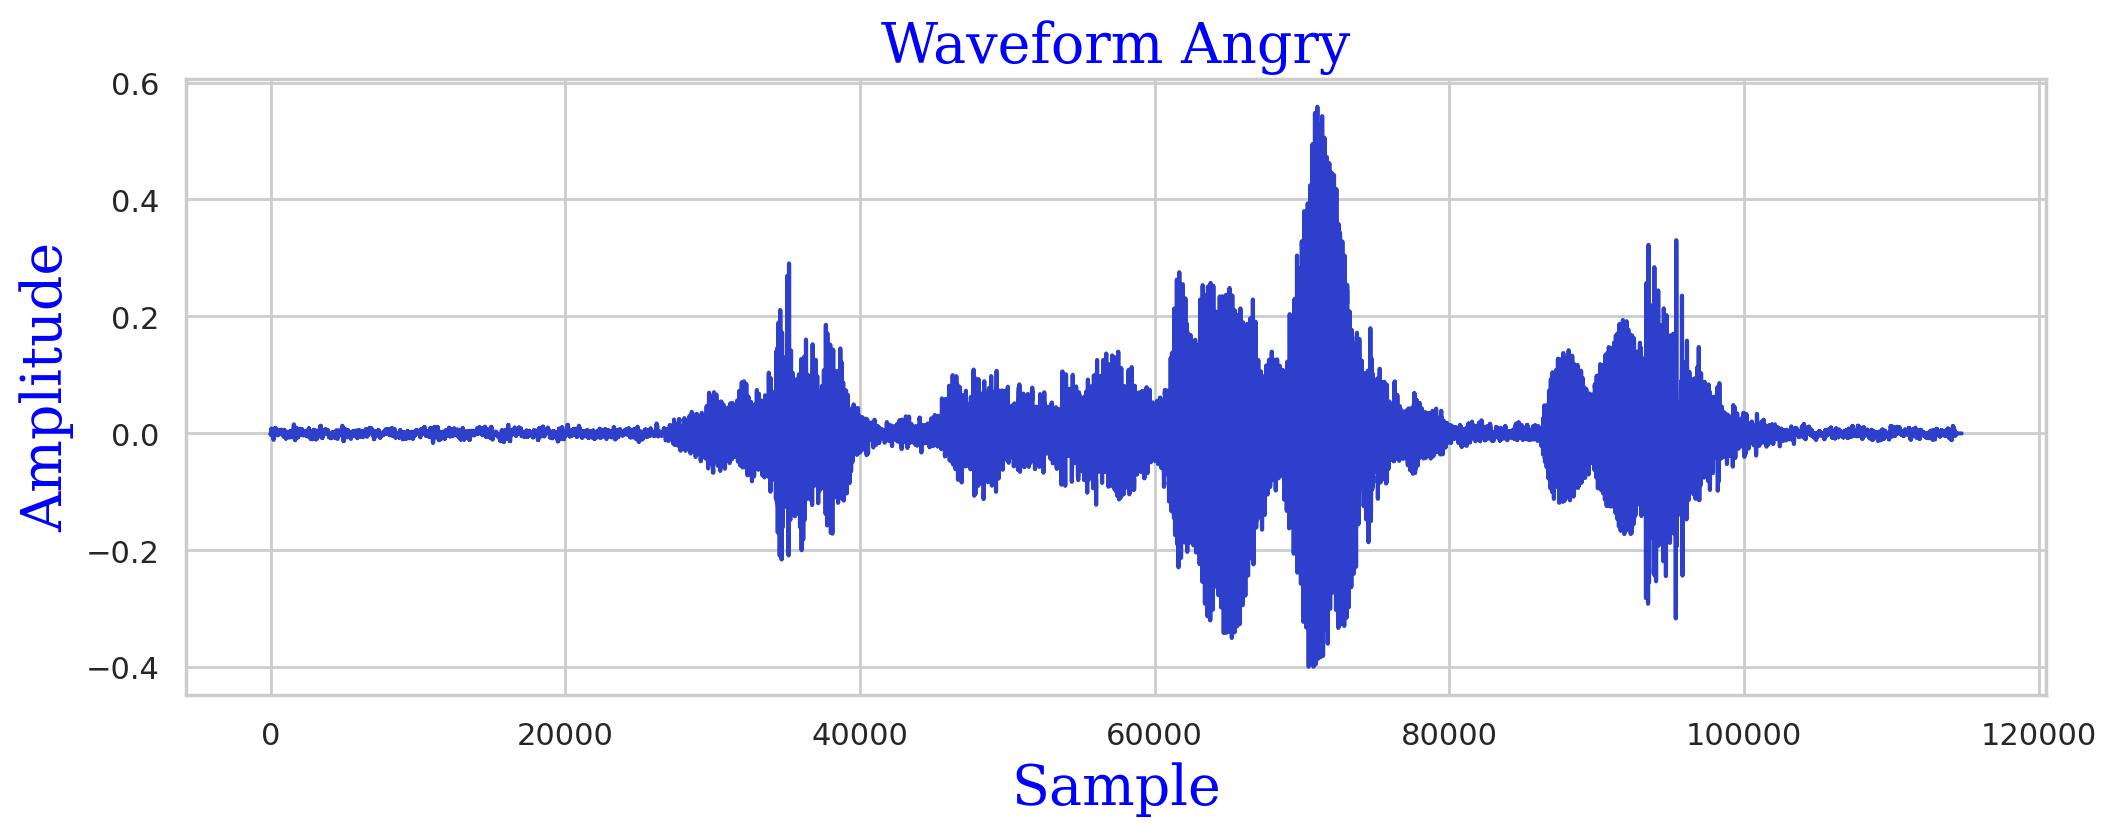

In [63]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

The waveform plot represents the emotion "Angry" and visualizes how the amplitude of the audio signal changes over time.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number, spanning approximately 175,000 samples. Each sample corresponds to a point in time in the audio.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, indicating the loudness or intensity of the sound at each point in time. The amplitude values range from -0.3 to 0.3, suggesting varying intensity in the speech.

***Observations***

- **Fluctuations in amplitude**:
   - The waveform shows frequent and sharp fluctuations in amplitude, which is characteristic of an intense emotional expression like anger. The sharp peaks and valleys reflect moments of high intensity and possibly louder speech.
   - The larger amplitude spikes suggest strong vocal emphasis or heightened emotions, which are typical in anger-related speech.

- **Early segment (before 50,000 samples)**:
   - The waveform shows strong variations in amplitude early on, indicating that the speaker begins expressing anger immediately or shortly after the start of the recording.
   
- **Middle segment (between 50,000 and 120,000 samples)**:
   - The amplitude remains consistently high, with peaks occurring at regular intervals. This could indicate a continuous, intense vocalization of anger with moments of stronger emphasis.
   
- **Later segment (after 120,000 samples)**:
   - The amplitude decreases slightly but still maintains some strong peaks, suggesting the speaker may be finishing their expression of anger but with residual intensity.

This waveform captures the typical characteristics of angry speech: frequent sharp amplitude fluctuations, high-intensity peaks, and continuous vocal emphasis. The consistent peaks in amplitude are indicative of forceful and emotionally charged speech, reflecting the anger being expressed.

## Listening to the Sample

In [64]:
Audio(angry_sp.iloc[0])

# Neutral

In [65]:
neutral_sp = sum_df_rep[sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = sum_df_rep[sum_df_rep['Emotions'] == 'neutral']['Arrays']

## Plotting the Waveform of a Sample of Neutral

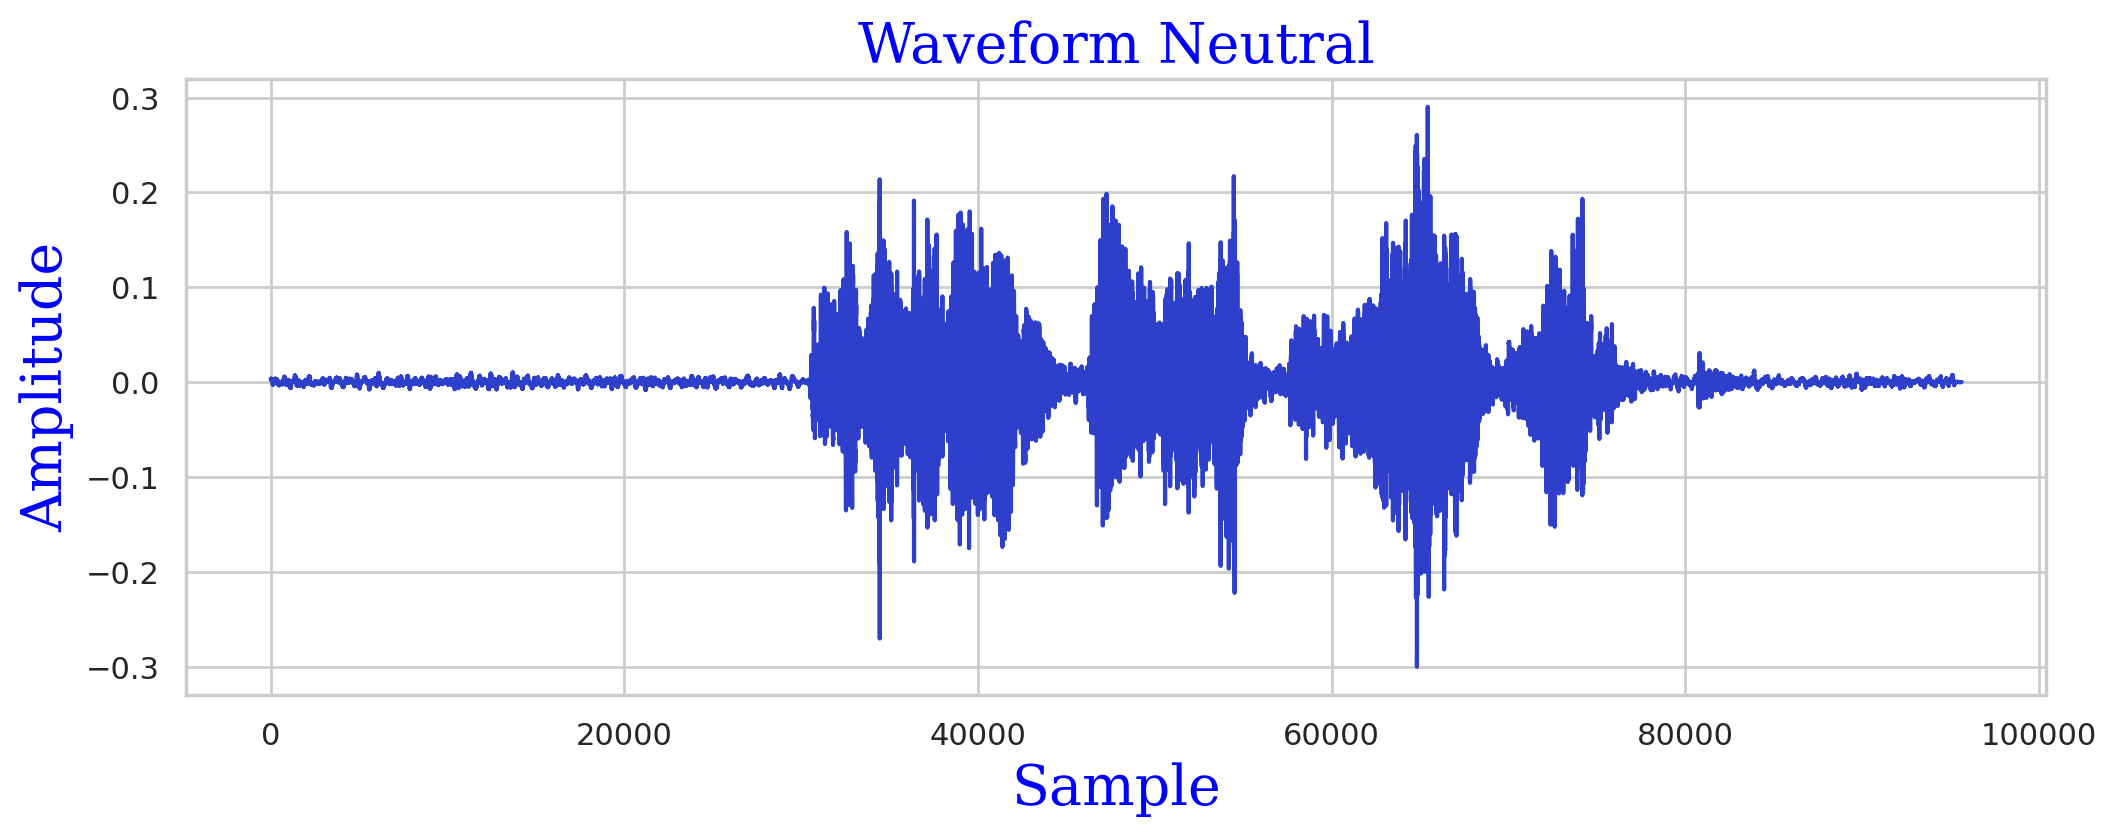

In [66]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

The waveform plot represents the emotion "Neutral" and shows how the amplitude of the audio signal changes over time.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number, spanning approximately 140,000 samples. This gives a sense of how the audio signal progresses over time.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, indicating the intensity or loudness of the sound. The amplitude values range from approximately -0.1 to 0.2.

***Observations***

- **Consistent low amplitude**:
   - For most of the waveform, especially in the beginning and end, the amplitude remains fairly low and consistent, which is characteristic of neutral speech. This suggests that there is not much fluctuation in intensity or emotion.
   
- **Mid-section peaks** (around 40,000 to 100,000 samples):
   - There is a noticeable increase in amplitude in the middle section of the waveform, with some sharp peaks. This may indicate brief moments where the speaker emphasizes certain words or phrases, but it does not exhibit the same intensity or variation as seen in emotional speech, such as anger or sadness.
   
- **Returning to low amplitude**:
   - Toward the end of the waveform, the amplitude decreases again, returning to the more steady and low intensity seen at the beginning.

This waveform represents a typical pattern of neutral speech: consistent low amplitude with brief moments of higher intensity, but overall smooth and controlled. The neutral tone is generally characterized by fewer variations in loudness, which is reflected in the steadiness of the waveform.

## Listening to the Sample

In [67]:
Audio(neutral_sp.iloc[0])

# Surprise

In [68]:
surprise_sp = sum_df_rep[sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = sum_df_rep[sum_df_rep['Emotions'] == 'surprise']['Arrays']

## Plotting the Waveform of a Sample of Surprise

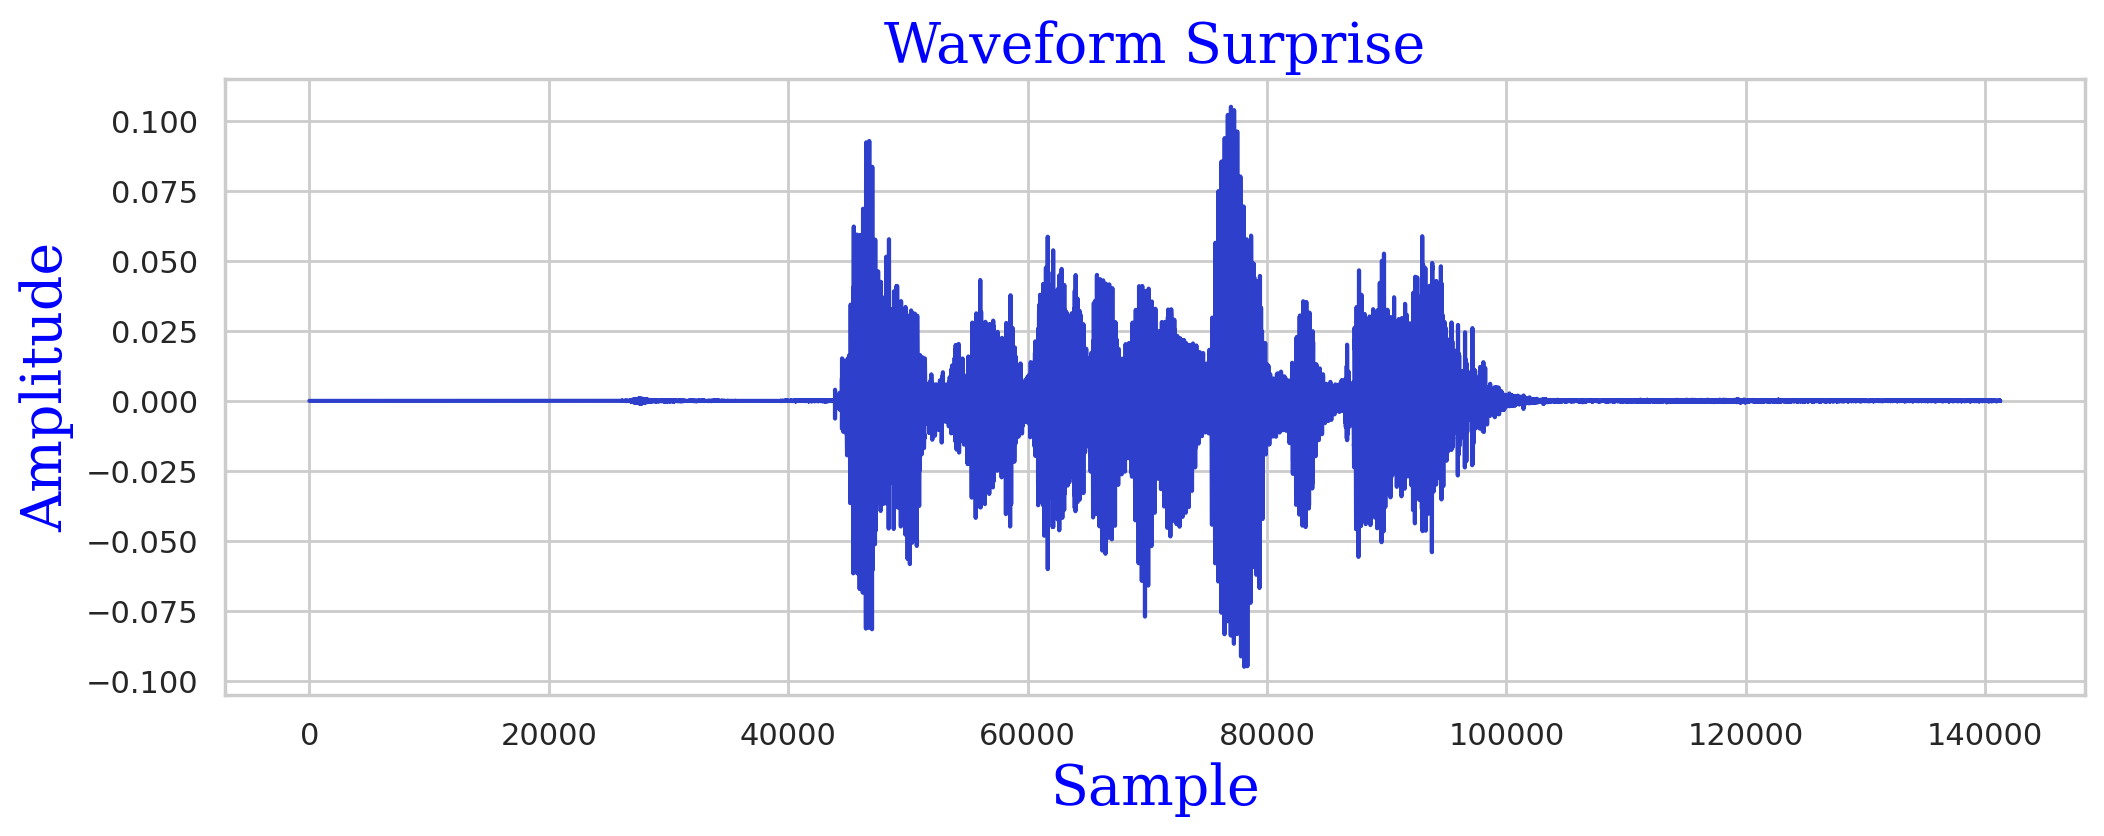

In [69]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Surprise', fontdict= font2)
plt.show()

The waveform plot represents the emotion "Surprise" and illustrates how the amplitude of the audio signal changes over time.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number, with the waveform spanning approximately 160,000 samples. This reflects the time progression of the audio signal.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, indicating the intensity or loudness of the sound at each point in time. The amplitude ranges from approximately -0.1 to 0.1.

***Observations***

- **Early segment (before 40,000 samples)**: The waveform shows very little activity with a flat, near-zero amplitude. This suggests that there is either silence or minimal sound at the beginning of the recording, which could be a pause before the expression of surprise.
  
- **Middle segment (40,000 to 100,000 samples)**:
   - There is a significant increase in amplitude, with noticeable peaks and valleys. This section represents the moment of surprise, where the speaker's voice becomes more intense. The amplitude variations reflect the speaker’s strong emotional reaction, characterized by sudden bursts of energy, typical in surprised speech.
   
- **Later segment (after 100,000 samples)**:
   - The amplitude gradually decreases, and the waveform returns to near-zero levels, suggesting that the expression of surprise ends, and the speaker either stops talking or returns to a calmer state.

The waveform captures the characteristic elements of surprised speech, with a sharp onset of increased amplitude in the middle, representing the emotional expression, and a gradual decline afterward. The initial flatness, followed by a sudden burst of intensity, is typical in speech where an emotional reaction like surprise is expressed briefly and then subsides.

## Listening to the Sample

In [70]:
Audio(surprise_sp.iloc[0])

# Sample Duration

In speech recognition, the term *sample duration* refers to the specific time frame over which audio data is analyzed. It represents the length of time for which the audio is captured and processed to extract meaningful information. When recording or processing audio input, setting a particular duration determines how long the system listens to or records the audio signal before analyzing it for recognition. This time window is critical as it affects the precision and efficiency of detecting spoken words or phrases.

In [71]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [72]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.28 seconds


# Amplitude Envelope

In speech recognition, the *amplitude envelope* describes how the intensity or loudness of an audio signal changes over time. It outlines the overall shape of the speech waveform, emphasizing the fluctuations in energy that occur as each syllable or phoneme is spoken. While spectral information gives detailed insight into the characteristics of specific speech sounds, the amplitude envelope becomes especially important in scenarios where the spectral details are less clear or available. It helps to capture the rhythm and pattern of speech, making it a key factor in understanding spoken language when the spectral resolution is limited.

In [73]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512

In [74]:
#calculate the amplitude envelope
def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []

    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)

    return np.array(amplitude_envelope)

In [75]:
# Samples
Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [76]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral), len(AE_surprise), len(AE_sad))

187 213 225 182 187 276 271


## Fancy Amplitude

"Fancy amplitude" is not a standard term in the field of audio processing or speech recognition. However, it might be a casual or colloquial reference to certain advanced or more complex representations of an audio signal's amplitude. Here are a few concepts that might align with what someone could refer to as "fancy amplitude":

1. **Envelope Modulation or Advanced Amplitude Modulation:**
   This involves capturing the amplitude variations over time with greater detail or applying modulation techniques to encode additional information. In speech processing, the amplitude envelope is sometimes used for feature extraction or signal analysis, where the shape of the amplitude over time is carefully analyzed or modified to improve understanding or recognition of speech.

2. **Waveform Shaping Techniques:**
   Techniques like *wave shaping* or *dynamic range compression* can alter the amplitude of a waveform in more complex ways. These approaches can adjust the loudness of various parts of an audio signal, making the changes more dynamic or "fancier" than just simple volume adjustments.

3. **Spectral Amplitude Representations:**
   In more advanced audio analysis, the amplitude is sometimes represented through complex spectrograms, which provide a detailed view of the amplitude across various frequencies over time. This can be seen as a more "fancy" or intricate representation compared to simply looking at raw amplitude changes.

4. **Amplitude Panning or Spatial Audio Effects:**
   In audio engineering, "fancy" effects might include amplitude-based panning, where the intensity of sounds is adjusted across different speakers or channels to create a sense of movement or positioning within a stereo or surround sound field.

**If this context, it refers to the 2nd sub-point, i.e. the *shape of the waveform*.**

In [77]:
def fancy_amplitude_env (signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [78]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry), len(fancy_AE_happy), len(fancy_AE_neutral), len(fancy_AE_surprise), len(fancy_AE_sad))

187 213 225 182 187 276 271


### Checking the Amplitude & the Fancy Amplitude

In [79]:
(AE_fear == fancy_AE_fear).all()

True

In [80]:
#Visualize amplitude envelope for all the audio files (Samples of each)
frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

In [81]:
t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)

## Envelope Amplitudes

### Fear

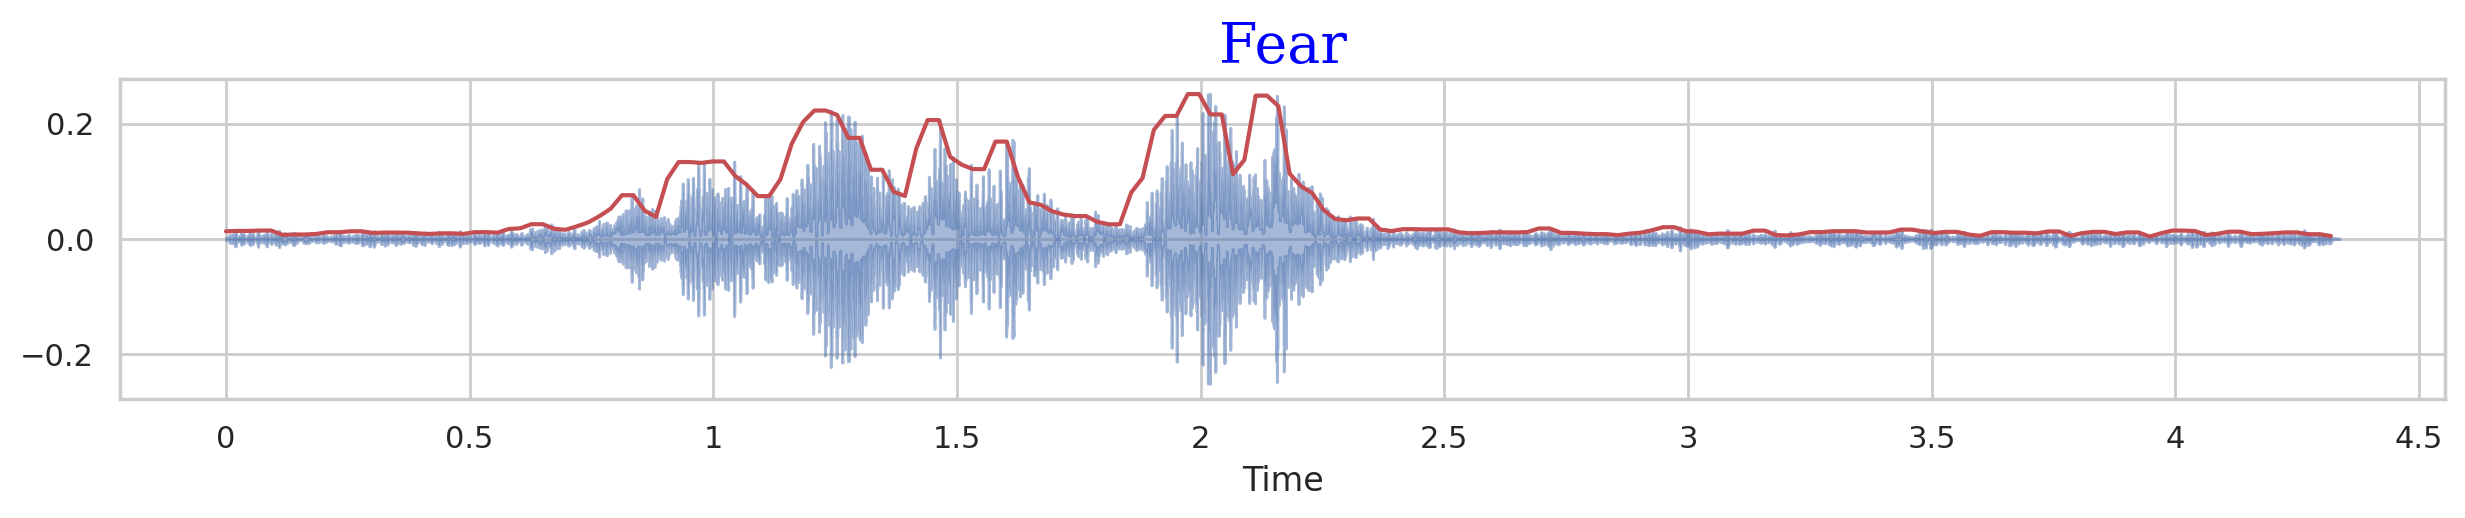

In [82]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

The image shows a waveform labeled "Fear" along with its **envelope**, which provides a smoothed representation of the audio signal’s amplitude over time.

***Key Elements***

- **X-axis (horizontal)**: Represents time, measured in seconds. The plot spans about 5 seconds.
  
- **Y-axis (vertical)**: Represents the amplitude of the audio signal, indicating how loud or soft the sound is at each point in time. The amplitude ranges from approximately -0.4 to 0.4.

- **Waveform (blue)**: This represents the detailed fluctuations in the amplitude of the sound over time. The waveform shows how the intensity of the signal changes rapidly, capturing both the high and low points in the audio.

- **Envelope (red)**: The envelope is a smoother representation that follows the general shape of the waveform. It highlights the overall trend in amplitude without focusing on the finer details, making it easier to observe the major peaks and valleys.

***Observations***

- **Early segment (before 2.5 seconds)**:
   - The amplitude remains low with relatively small variations, suggesting that the speaker is calm or speaking softly during this period.

- **Mid segment (around 3 seconds)**:
   - There is a significant increase in amplitude, peaking at around 3 seconds, indicating the emotional intensity characteristic of fear. This could correspond to a loud or emphasized part of the speech, likely when the fear emotion is most strongly expressed.
   - The envelope captures this peak clearly, showing the rise in intensity and subsequent drop-off.

- **Later segment (after 3.5 seconds)**:
   - The amplitude decreases and returns to a lower, more steady state, suggesting that the speaker has calmed down or the emotional expression has subsided.

This plot provides both a detailed and smoothed view of the "Fear" audio signal. The sharp rise in amplitude around 3 seconds reflects the speaker’s emotional expression of fear, while the envelope makes it easier to identify the overall structure of the intensity changes. The waveform confirms that fear is characterized by a rapid and intense peak, followed by a return to a calmer state.

### Disgust

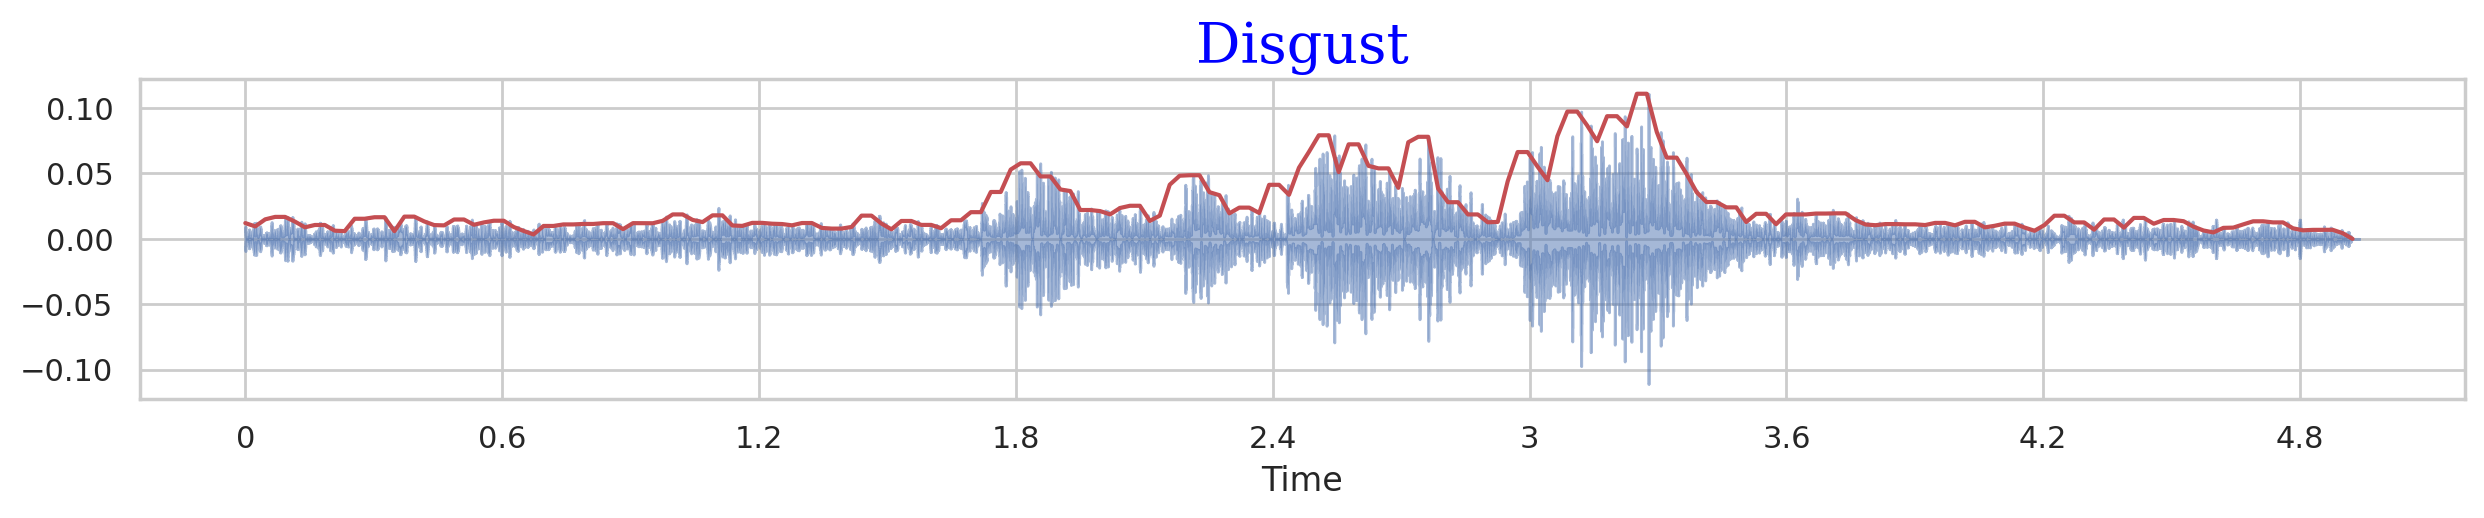

In [83]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

The image represents the waveform for the emotion "Disgust" along with its **envelope**, which is a smoothed version of the amplitude to highlight the overall intensity trends in the signal.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 6.5 seconds. This shows the duration of the audio signal.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, ranging from -1.0 to 1.0. The amplitude indicates the loudness or intensity of the sound at each point in time.

- **Waveform (blue)**: The detailed fluctuations in the signal amplitude over time. This reflects the fine-grained variations in the audio signal as the emotion is expressed.

- **Envelope (red)**: A smoothed representation of the waveform that helps identify the overall structure of the intensity without focusing on every small fluctuation. The envelope provides a clearer view of when the signal's intensity increases or decreases.

***Observations***

- **Early segment (before 2 seconds)**:
   - The waveform shows very little activity, with low amplitude values close to zero. This indicates that the speaker might be quiet or that there is little vocal expression during this time.
  
- **Middle segment (around 3-4 seconds)**:
   - The amplitude remains low until around 4 seconds, where the waveform starts to show more significant fluctuations. This suggests the speaker is beginning to express disgust, though the intensity is still relatively low compared to later points.

- **Late segment (after 4 seconds)**:
   - From 5 seconds onward, the amplitude increases significantly. The envelope highlights the overall rise in intensity, reflecting moments where the speaker may be emphasizing their disgust more strongly. The signal becomes more dynamic, with higher peaks and sharper changes in intensity, indicating the stronger expression of the emotion.

The "Disgust" waveform shows a delayed and gradual buildup in intensity, peaking in the later parts of the signal. The envelope clearly captures this trend, where the speaker starts with lower amplitude and then transitions into a more intense expression of disgust, particularly after 5 seconds. The peaks in the waveform indicate moments of heightened emotional emphasis.

### Happy

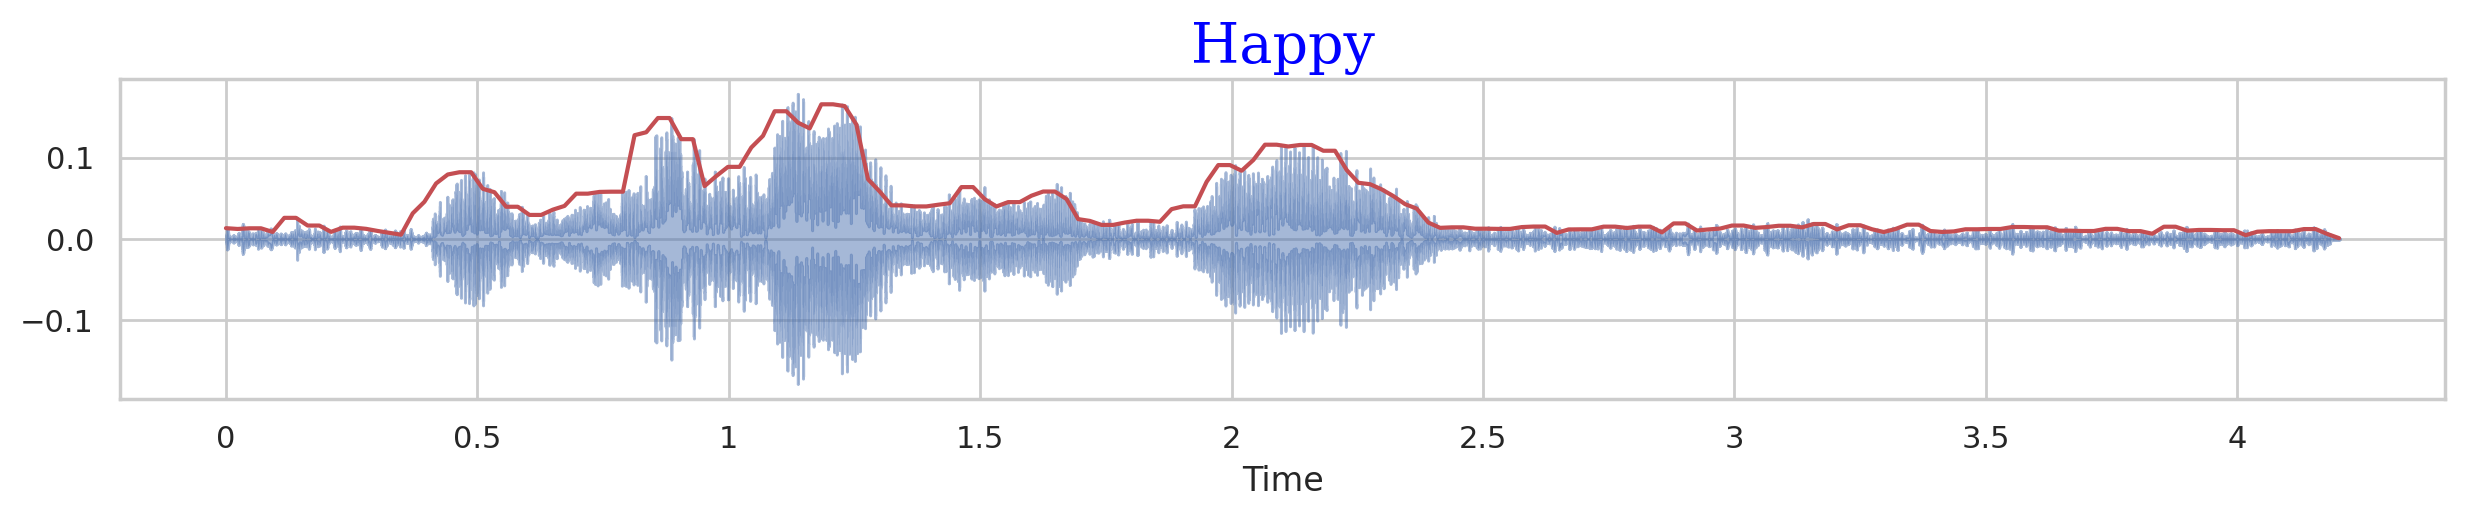

In [84]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

The image represents the waveform for the emotion "Happy" along with its **envelope**, which highlights the overall trends in the amplitude of the signal.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 4 seconds. This indicates the duration of the audio signal.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, ranging between -0.1 and 0.1. The amplitude indicates the loudness or intensity of the sound at each point in time.

- **Waveform (blue)**: The detailed waveform captures the fine-grained fluctuations in the amplitude of the audio signal over time, representing the speaker’s voice.

- **Envelope (red)**: A smoother representation of the waveform that captures the general trend in intensity, without focusing on smaller variations. This makes it easier to observe the rise and fall in loudness over time.

***Observations***

- **Early segment (before 1.5 seconds)**:
   - The amplitude starts off fairly low, with only slight variations. This indicates that the speaker is either talking softly or that the expression of happiness is relatively subdued during this part of the audio.
  
- **Middle segment (around 1.5 to 2.5 seconds)**:
   - There is a noticeable increase in the amplitude, with peaks reaching around 0.1 and -0.1. This reflects a more pronounced expression of happiness, where the speaker’s voice becomes louder and more dynamic. The envelope shows a clear rise and fall in intensity, indicating the emotional emphasis.
  
- **Later segment (after 2.5 seconds)**:
   - The amplitude begins to taper off after the peak, gradually returning to a lower intensity. This suggests that the speaker is calming down or concluding their expression of happiness.

This waveform represents the typical characteristics of happy speech: it starts at a relatively low intensity, builds up to a peak of emotional expression, and then gradually returns to a calmer state. The envelope clearly shows this progression, capturing the smooth rise and fall in intensity that is associated with the speaker’s joyful tone.

### Sad

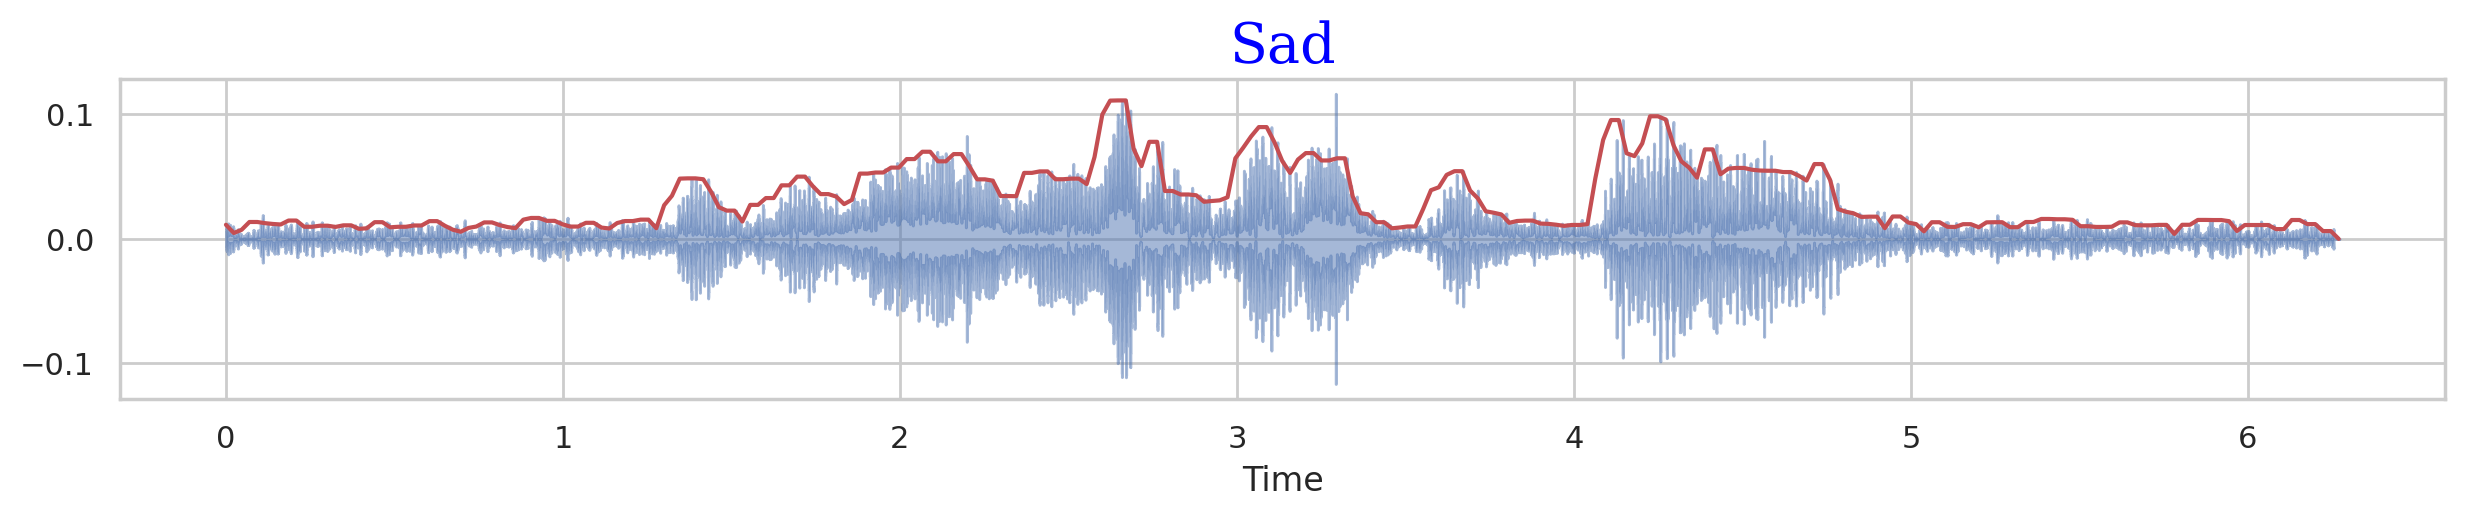

In [85]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()

The image shows the waveform for the emotion "Sad" along with its **envelope**, providing a smoothed representation of the signal's amplitude over time.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 6 seconds. This shows how the sound evolves over the duration of the audio recording.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, which indicates the intensity or loudness of the sound. The amplitude ranges from -0.05 to 0.05, which suggests the overall intensity of the sound is relatively moderate, characteristic of sad speech.

- **Waveform (blue)**: This is the detailed audio signal, showing the fine fluctuations in the speaker’s voice as the sadness is expressed.

- **Envelope (red)**: A smoothed version of the waveform, showing the overall trends in intensity without the small fluctuations. The envelope gives a clearer sense of the rise and fall in loudness over time.

***Observations***

- **Early segment (before 2 seconds)**:
   - The amplitude remains relatively low with only small variations. This suggests a quiet or subdued start to the speech, consistent with a more controlled or soft expression of sadness.
  
- **Middle segment (between 2 and 4 seconds)**:
   - The amplitude rises, showing peaks around the 3-second mark. The envelope highlights a gradual build-up in intensity, followed by a peak and a slight decline. This may represent the speaker reaching a more emotionally expressive part of the speech, emphasizing the sadness with a slightly louder or more emotionally charged tone.
  
- **Later segment (after 4 seconds)**:
   - The amplitude begins to taper off, returning to a lower, more controlled level. This suggests the speaker may be calming down or ending their expression of sadness, returning to a softer and more subdued tone.

The waveform captures the typical characteristics of sad speech: it starts off softly, builds to a more emotionally expressive peak, and then gradually returns to a quieter tone. The envelope clearly illustrates this progression, with a smooth rise in intensity followed by a return to a calmer state. This reflects the typical emotional dynamics of sadness, where the speaker's tone often remains controlled and less intense compared to other emotions.

### Neutral

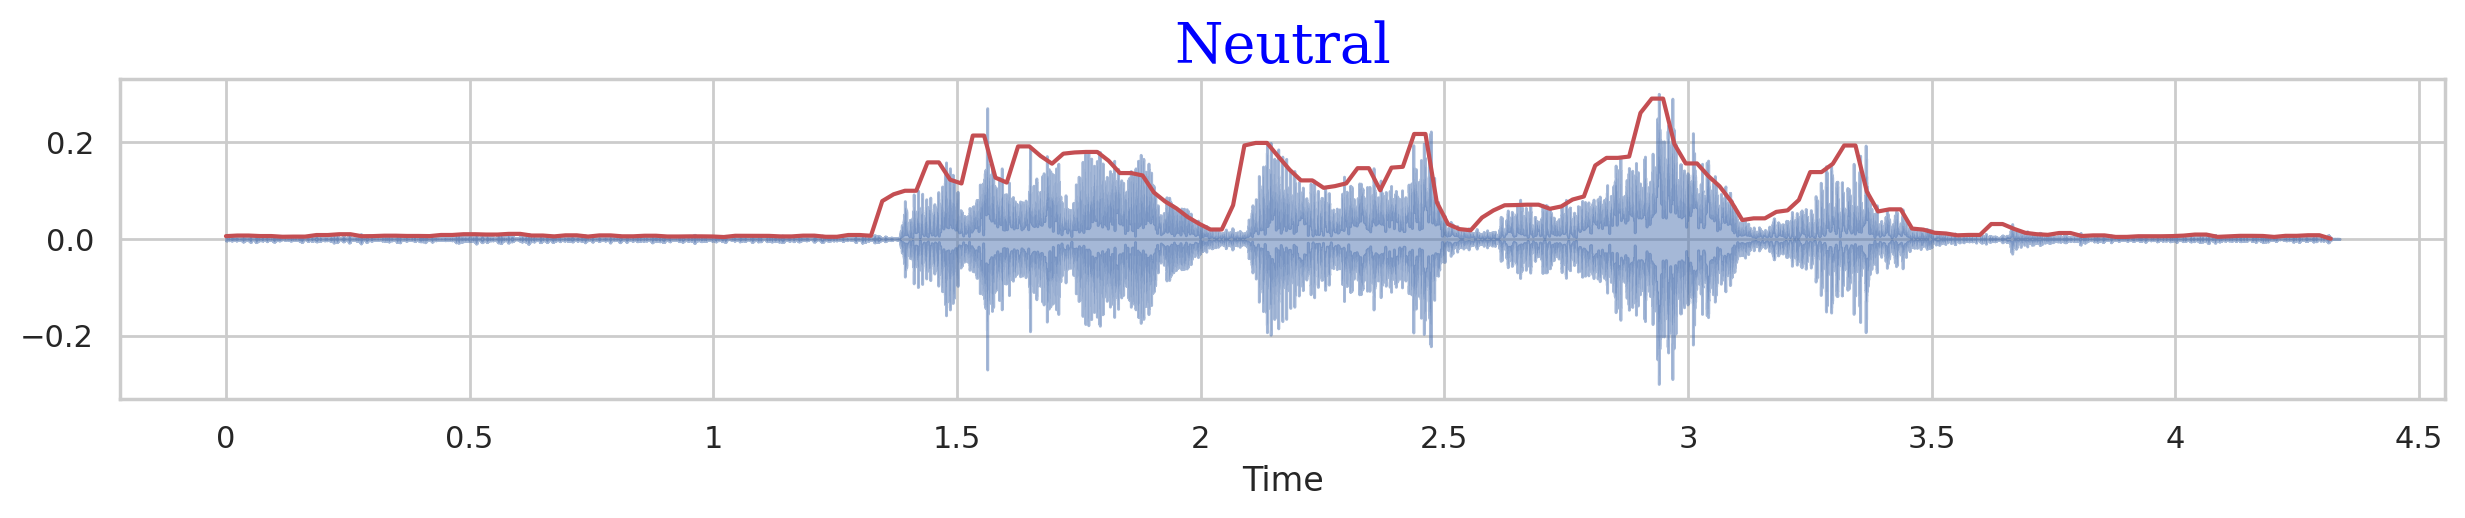

In [86]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()

The image represents the waveform for the emotion "Neutral" along with its **envelope**, which highlights the overall trends in the amplitude of the audio signal over time.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 6 seconds. This shows how the sound evolves over the duration of the recording.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, with a range from -0.2 to 0.2. This indicates the loudness or intensity of the sound at each point in time.

- **Waveform (blue)**: This is the detailed audio signal, showing the fine fluctuations in the speaker's voice.

- **Envelope (red)**: A smoothed version of the waveform that captures the overall rise and fall in loudness, giving a clearer view of the major trends in the signal’s intensity.

***Observations***

- **Early segment (before 2 seconds)**:
   - The amplitude remains relatively low and steady, suggesting that the speaker is speaking softly or without much emphasis. The variations in intensity are small, which is consistent with a neutral tone.

- **Middle segment (around 2 to 3 seconds)**:
   - The amplitude rises slightly, with a noticeable peak around the 2.5-second mark. This might indicate a brief moment of emphasis in the neutral speech, where the speaker raised their voice a bit. However, the envelope shows that even this peak is moderate compared to more emotionally charged expressions like anger or fear.

- **Later segment (after 3 seconds)**:
   - The amplitude decreases again, returning to a more steady state. The speaker’s voice becomes more controlled and consistent, with only small variations in loudness. This is typical for neutral speech, where there are few sharp peaks or strong emotions.

The waveform for neutral speech is characterized by small and steady fluctuations in intensity. The envelope clearly captures this, showing that the speaker's voice remains relatively consistent throughout the recording. There is a slight peak in the middle, but overall, the expression is calm and even, reflecting the neutral tone. This is typical for speech that lacks emotional emphasis, as seen in the lack of sharp spikes or large variations in amplitude.

### Angry

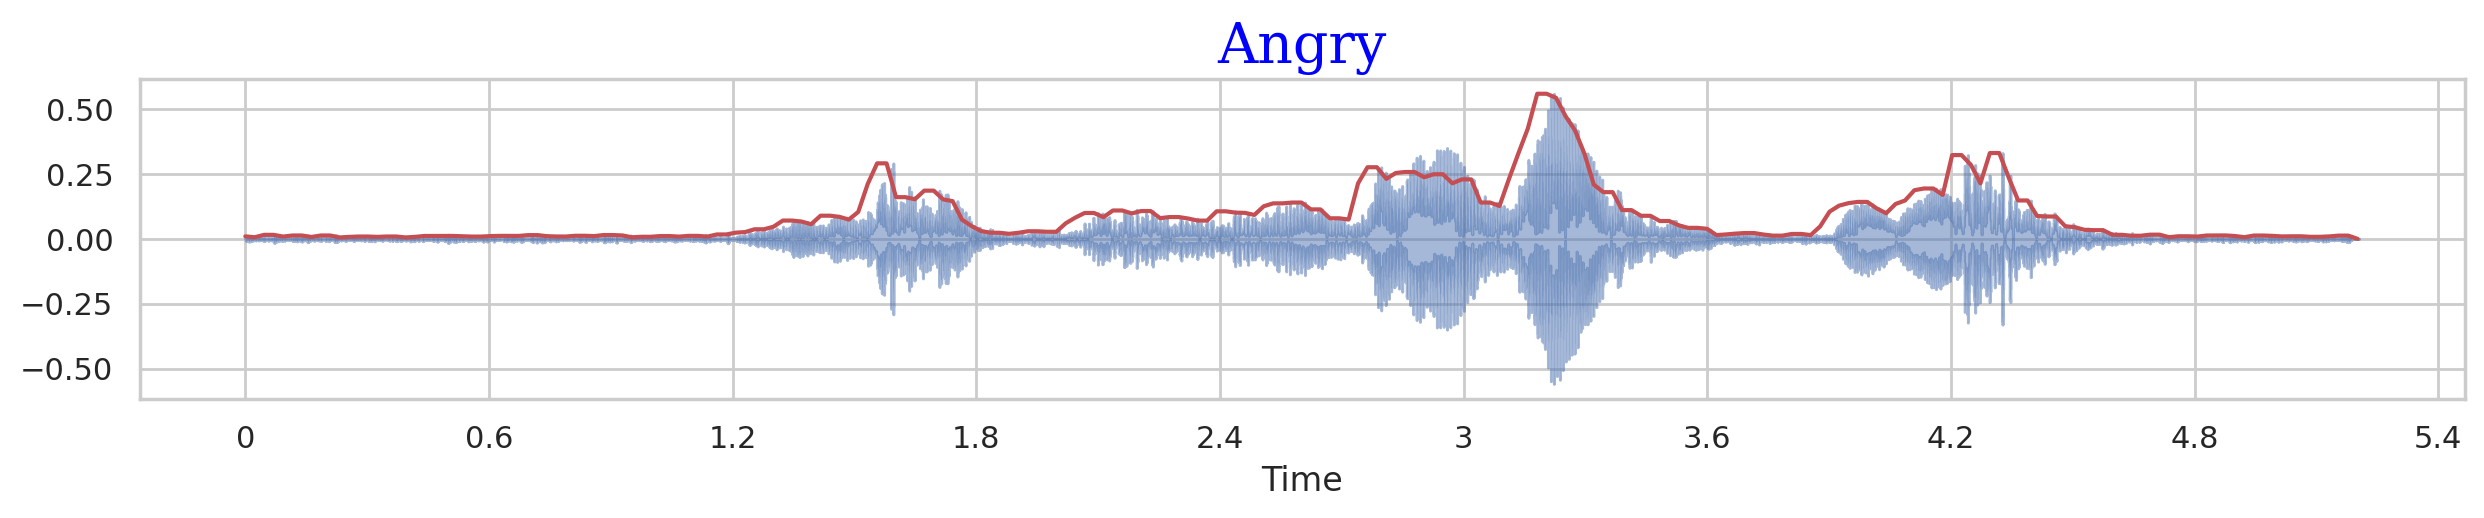

In [87]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()

The image represents the waveform for the emotion "Angry" along with its **envelope**, providing a smoother representation of the signal's amplitude over time.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 8 seconds. This shows how the sound evolves throughout the audio clip.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, with a range from -0.3 to 0.2. The amplitude reflects the intensity or loudness of the sound at each point in time.

- **Waveform (blue)**: This is the detailed signal showing the fine fluctuations in amplitude. These fluctuations represent the intensity and changes in the speaker’s voice over time.

- **Envelope (red)**: The smoothed version of the waveform, which helps highlight the general rise and fall in intensity without focusing on every small fluctuation. This envelope makes it easier to observe the speaker's voice dynamics.

***Observations***

- **Frequent peaks**:
   - The waveform exhibits several distinct peaks, indicating frequent changes in intensity. These peaks are characteristic of angry speech, where the speaker may raise their voice at regular intervals, emphasizing certain words or expressions forcefully.
   - The envelope highlights these peaks clearly, with a consistent pattern of rising and falling intensity, which suggests the speaker is expressing anger through forceful and emotionally charged speech.

- **Overall high intensity**:
   - The amplitude values range from around -0.3 to 0.2, which is relatively high compared to more neutral or subdued emotions. This reflects the higher energy associated with anger, as the speaker tends to express their feelings in a louder and more intense manner.
  
- **Later segment (after 6 seconds)**:
   - The amplitude gradually decreases, returning to a more steady and lower intensity. This suggests that the speaker is calming down or reaching the end of their angry expression.

This waveform shows the typical characteristics of angry speech, with frequent sharp peaks in intensity and a higher overall amplitude. The envelope highlights the repetitive pattern of emphasis, reflecting the forceful tone often associated with anger. As the waveform progresses, the intensity gradually diminishes, indicating that the speaker may be calming down after expressing their emotions.

### Surprise

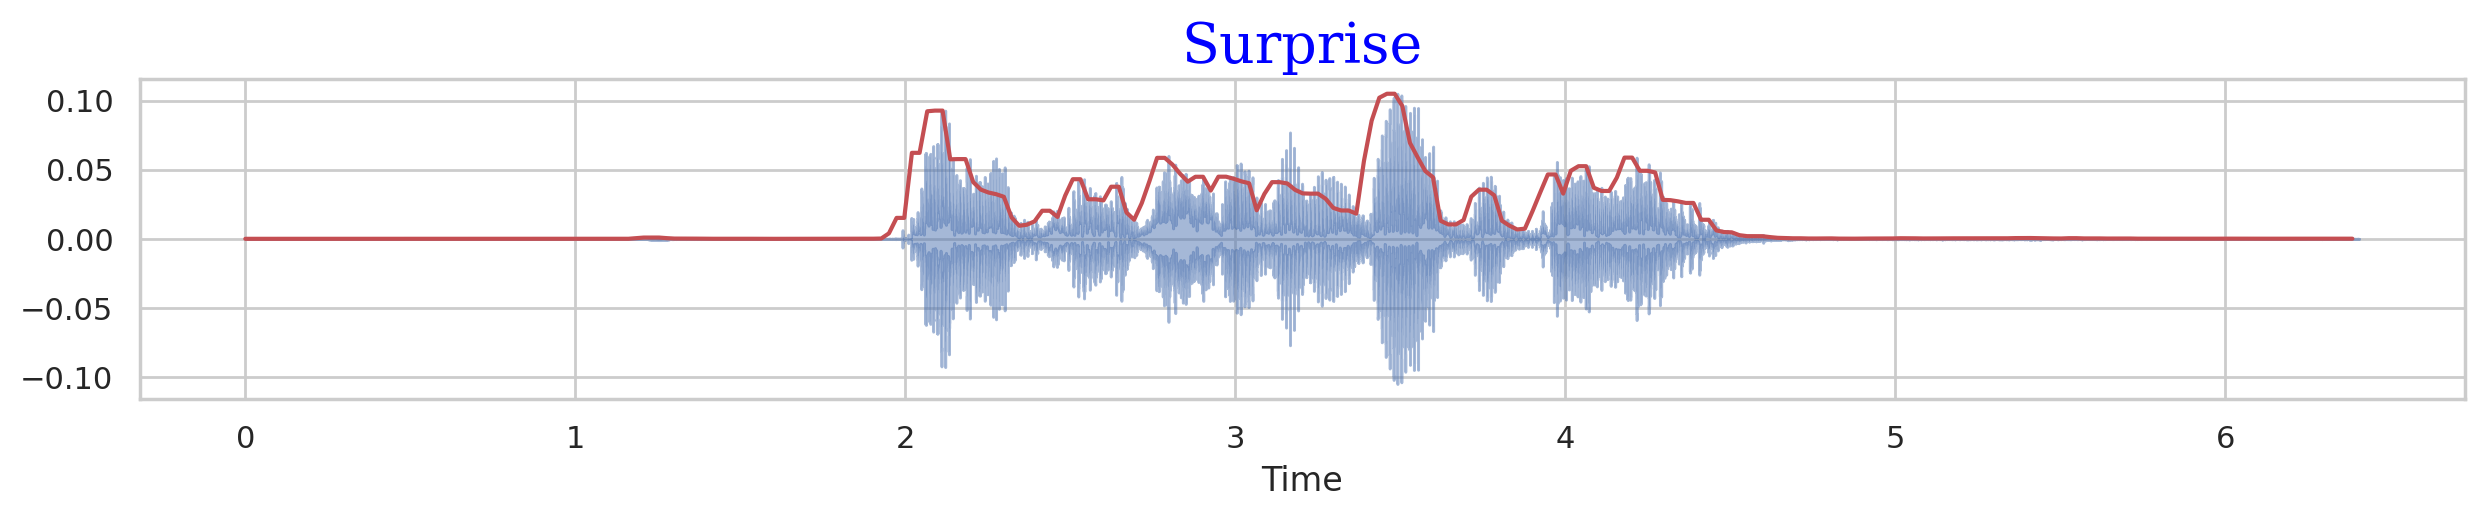

In [88]:
plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

The image represents the waveform for the emotion "Surprise" along with its **envelope**, which smooths out the fine fluctuations in amplitude to highlight the general trends in the signal.

***Key Elements***

- **X-axis (horizontal)**: Represents time in seconds, spanning approximately 7 seconds. This shows how the sound evolves over the duration of the audio clip.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, with a range from -0.1 to 0.1. This indicates the intensity or loudness of the sound at each point in time.

- **Waveform (blue)**: The detailed waveform, showing fine fluctuations in the speaker’s voice over time. This represents the real-time variations in intensity.

- **Envelope (red)**: A smoothed version of the waveform, providing a clearer view of the overall trends in loudness without focusing on every small variation. The envelope highlights when the speaker's voice rises or falls in intensity.

***Observations***

- **Early segment (before 2 seconds)**:
   - The waveform starts almost flat, with very little activity and almost no amplitude. This suggests that there is silence or minimal vocal activity at the beginning of the recording.

- **Middle segment (2 to 4.5 seconds)**:
   - There is a noticeable increase in amplitude, indicating the moment of surprise. The envelope highlights the sharp peaks around the 3-second mark, where the speaker's voice becomes more intense, likely reflecting the vocal expression of surprise. These sharp peaks represent the sudden nature of the emotion.
  
- **Later segment (after 4.5 seconds)**:
   - The amplitude decreases again, returning to a more consistent, low intensity. This indicates that the moment of surprise has passed, and the speaker's voice has calmed down or returned to a more neutral tone.

This waveform captures the typical characteristics of surprised speech: a period of low intensity, followed by a sudden peak in loudness as the speaker reacts with surprise, and then a return to lower intensity. The envelope clearly highlights the sudden burst of energy in the middle, which is characteristic of the surprise emotion. The sharp peaks and relatively short duration of the high intensity reflect the brief and intense nature of surprise.

## Noise & Strech of a Sample

In [89]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [90]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

In [91]:
# taking any example and checking for techniques.
path = np.array(sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

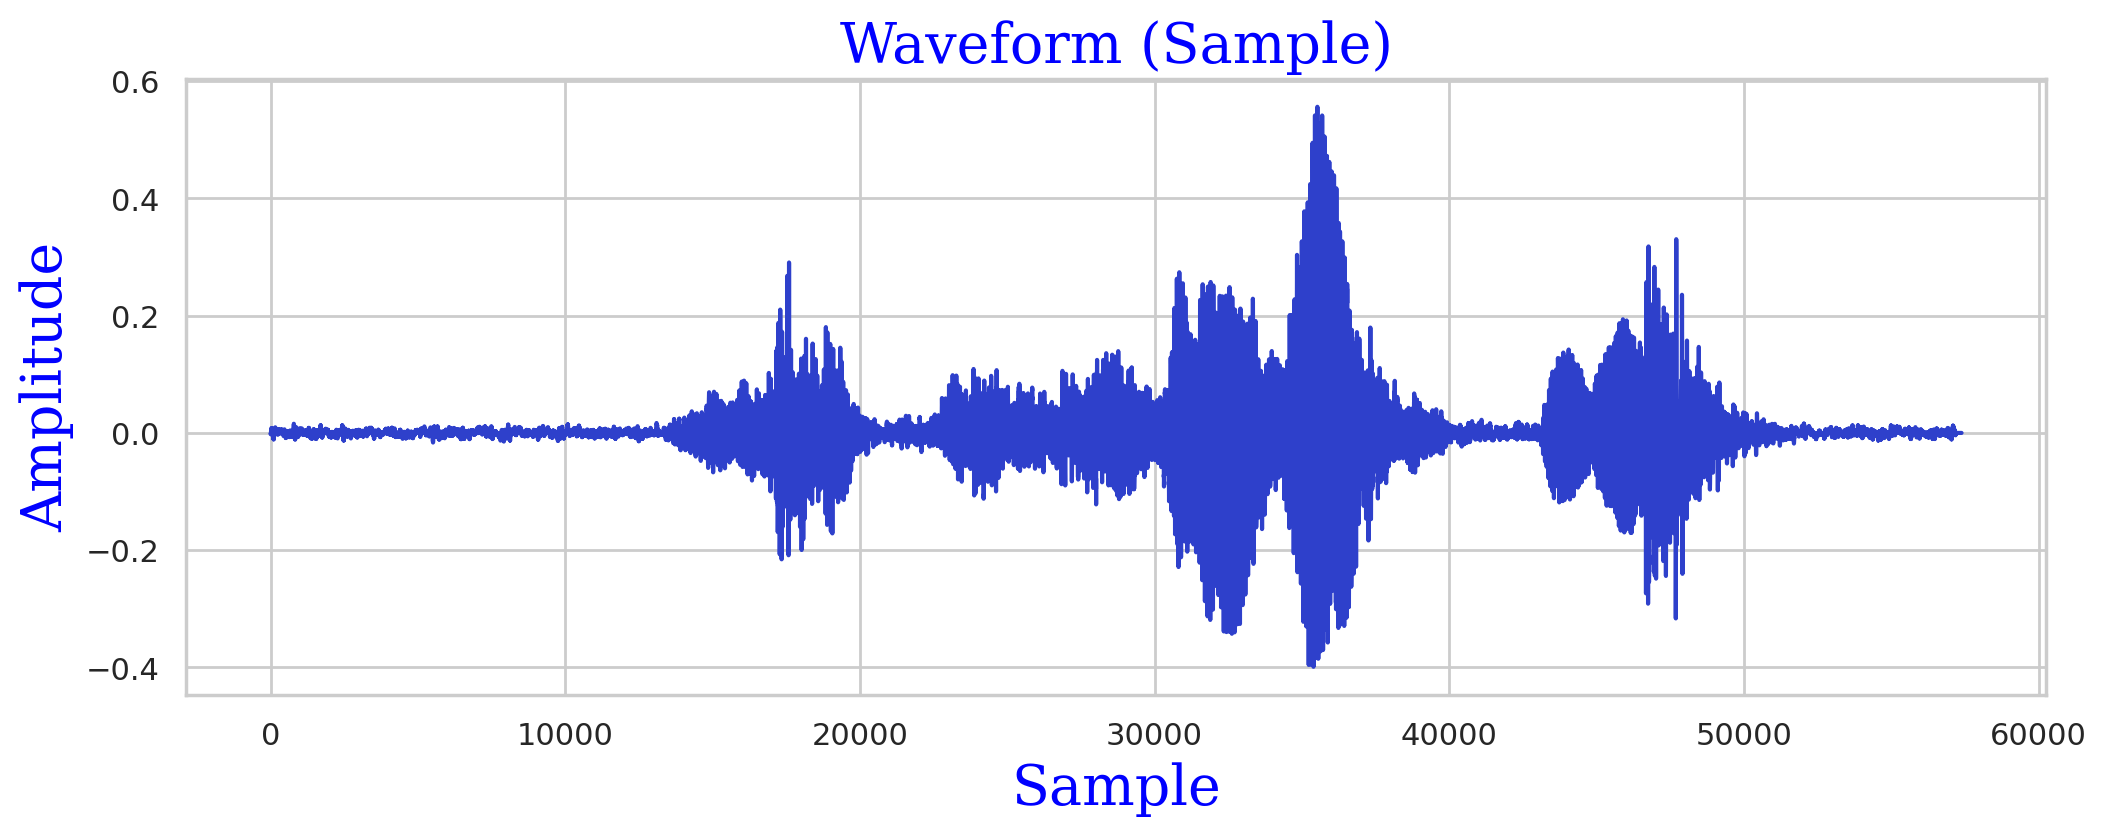

In [92]:
Sample_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Sample_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Sample)', fontdict= font2)
plt.show()

The image represents the **waveform** of an audio signal, showing the amplitude (intensity) of the signal across time in terms of **samples**.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number. Samples are discrete points in time at which the audio signal's amplitude is measured. This waveform spans approximately 50,000 samples.

- **Y-axis (vertical)**: Represents the amplitude of the signal, ranging from approximately -0.4 to 0.4. Amplitude is a measure of the intensity or loudness of the audio at each sample point.

***Observations***

- **Early segment (before 20,000 samples)**:
   - The amplitude remains fairly low and consistent, indicating that the speaker is either silent or speaking softly during this portion of the audio. The signal is smooth and does not exhibit significant fluctuations, suggesting calm or neutral speech.

- **Middle segment (between 20,000 and 35,000 samples)**:
   - There is a sharp increase in amplitude, indicating a louder and more intense part of the audio. This peak in amplitude suggests that the speaker may be expressing a stronger emotion or speaking more forcefully.
   - The amplitude spike around 30,000 samples is significant, suggesting a moment of heightened vocal intensity.

- **Later segment (after 40,000 samples)**:
   - The amplitude gradually decreases, and the waveform returns to a more consistent and lower intensity. This likely indicates that the speaker is calming down or finishing their sentence or statement.

This waveform shows a clear structure where the audio begins calmly, reaches a peak of intensity around the middle, and then tapers off. The sharp increase in amplitude between 20,000 and 35,000 samples suggests that the speaker might have expressed a strong emotion or emphasized a point, after which the intensity decreases back to a more neutral level.

In [93]:
Audio(Sample_data, rate=sample_rate)

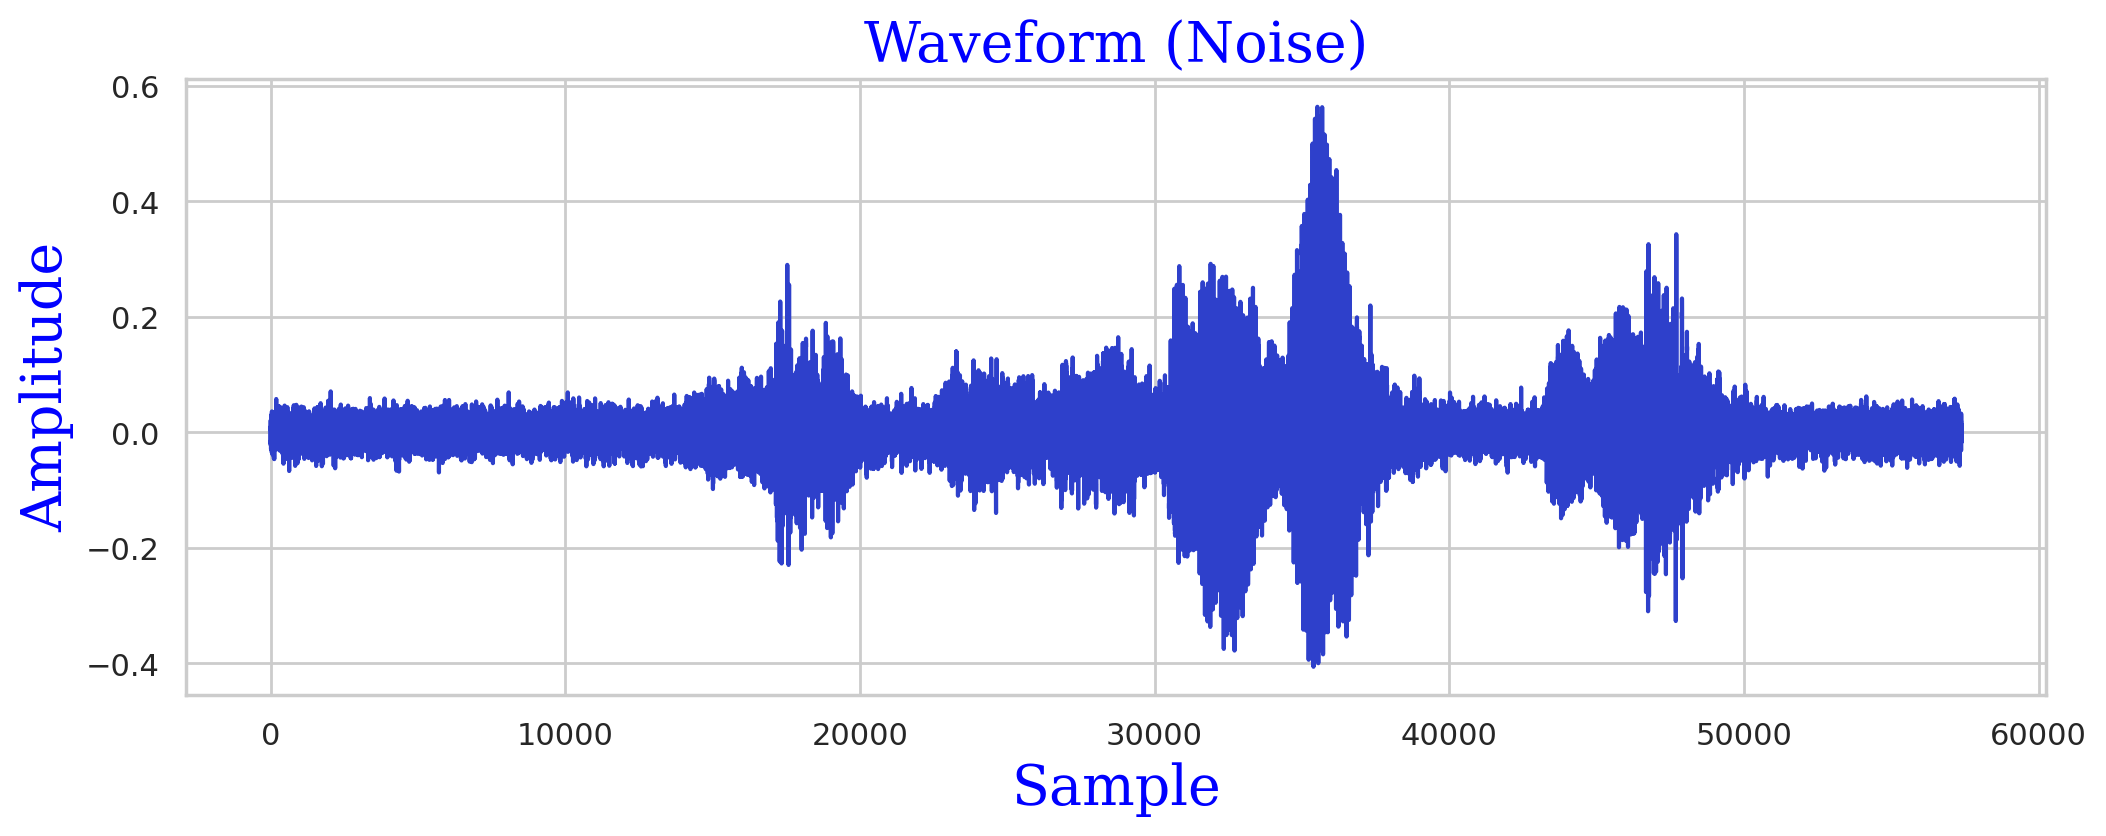

In [94]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

The image represents the **waveform** of an audio signal labeled as "Noise," showing the changes in amplitude over time in terms of **samples**.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number, ranging up to 50,000 samples. This provides the timeline of the audio signal, where each sample is a discrete measurement of amplitude at a specific moment in time.
  
- **Y-axis (vertical)**: Represents the amplitude of the signal, with values ranging from approximately -0.4 to 0.4. Amplitude indicates the loudness or intensity of the sound at each point in time.

***Observations***

- **Early segment (before 20,000 samples)**:
   - The amplitude remains consistently low, suggesting that there is minimal noise or sound activity. The flatness of the waveform indicates that this portion of the audio may contain little to no noticeable sound.
  
- **Middle segment (around 20,000 to 35,000 samples)**:
   - There is a sharp increase in amplitude, with prominent peaks, suggesting a sudden and intense burst of sound or noise. The largest spike occurs around the 30,000 sample mark, which indicates the point where the noise reaches its loudest intensity.
   - The waveform exhibits a pattern of fluctuating amplitude with varying peaks and troughs, indicative of loud and inconsistent noise.

- **Later segment (after 40,000 samples)**:
   - The amplitude gradually decreases, and the waveform returns to a more steady and lower intensity. This suggests that the noise has diminished or returned to a quieter state.

This waveform shows the characteristics of a noisy signal with a sudden and intense burst of sound followed by a tapering off. The initial calm phase suggests minimal activity or noise, while the middle segment exhibits sharp spikes indicating a loud, irregular noise event. This is typical for noise signals, which often have unexpected peaks of intensity before settling down to a quieter state.

In [95]:
Audio(Noise_data, rate=sample_rate)

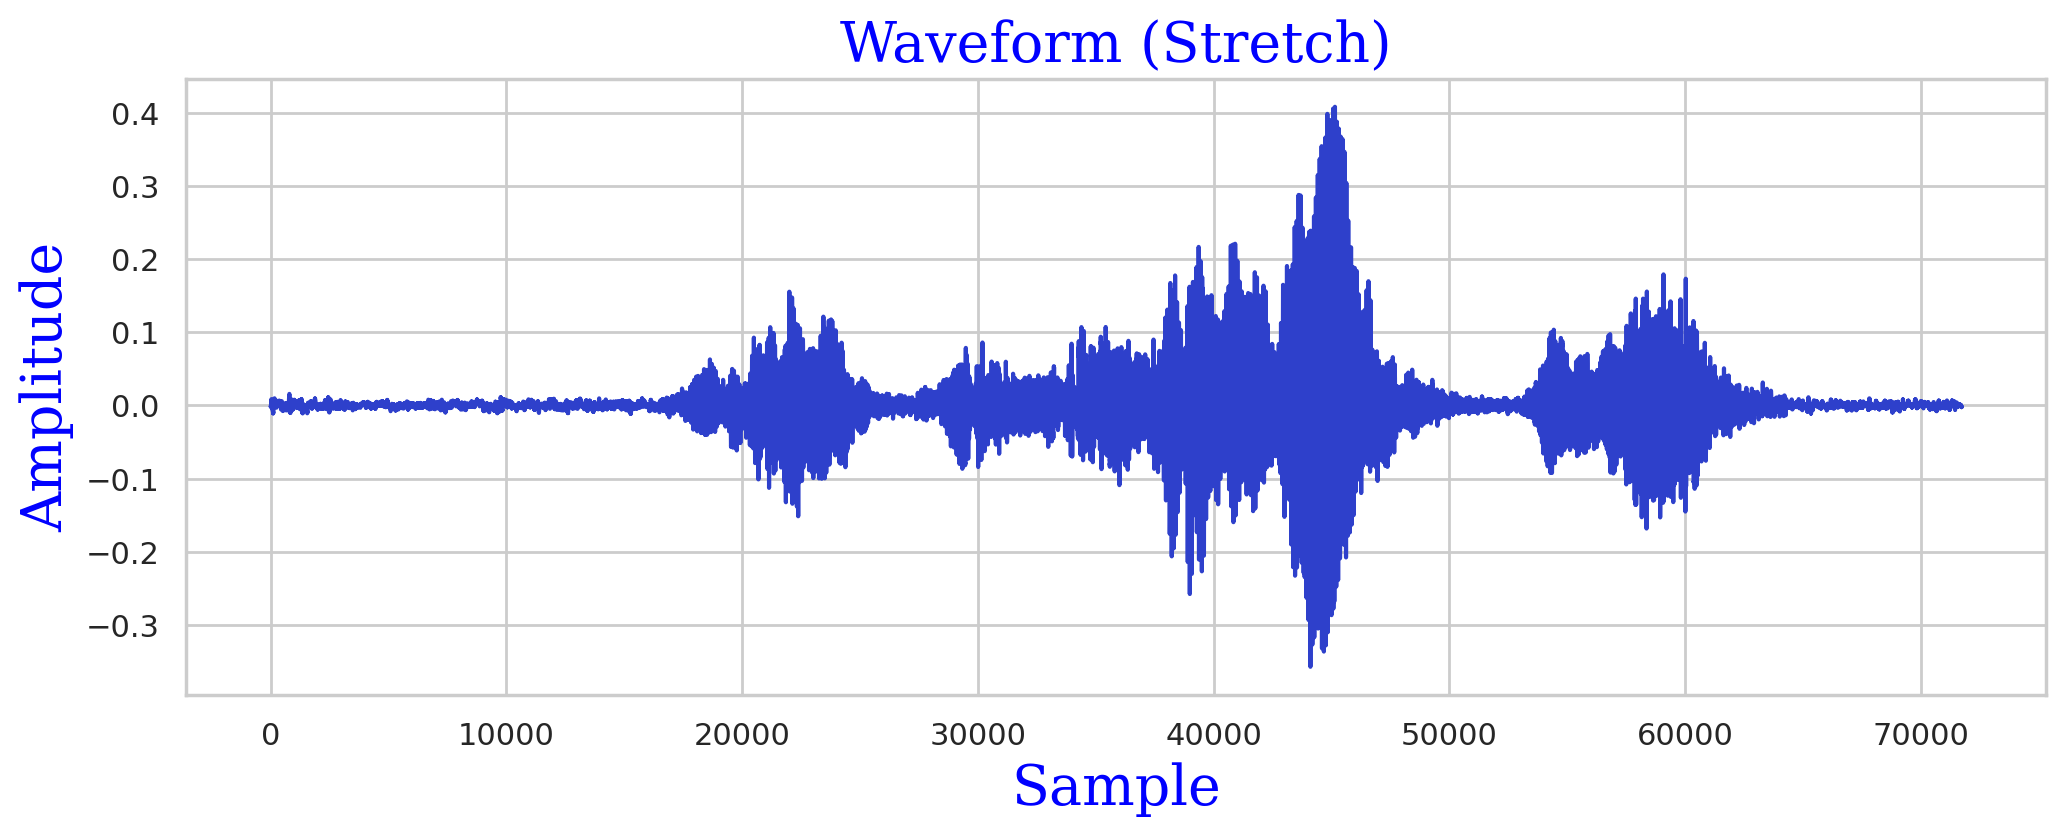

In [96]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

The image represents the **waveform** of an audio signal labeled as "Stretch," showing the amplitude over time in terms of **samples**.

***Key Elements***

- **X-axis (horizontal)**: Represents the sample number, ranging up to approximately 60,000 samples. Each sample is a discrete point in time at which the audio signal’s amplitude is measured.

- **Y-axis (vertical)**: Represents the amplitude of the signal, with values ranging between -0.3 and 0.2. Amplitude indicates the intensity or loudness of the sound at each point in time.

***Observations***

- **Early segment (before 20,000 samples)**:
   - The waveform has relatively low and consistent amplitude, with minor fluctuations near 0. This suggests that the signal starts out quiet or has little to no sound. It could represent a calm or neutral part of the audio.

- **Middle segment (around 20,000 to 45,000 samples)**:
   - There is a sharp rise in amplitude, with the signal growing in intensity, peaking around 40,000 samples. The waveform shows significant variation in amplitude, suggesting a portion of the signal where the sound becomes louder or more dynamic.
   - The increasing peaks and troughs are indicative of a rise in intensity, possibly reflecting an emotional or forceful part of the speech or sound.

- **Later segment (after 45,000 samples)**:
   - The amplitude begins to gradually decrease and returns to a lower level similar to the earlier segment, suggesting a return to calm or less intense sound.

This waveform shows a typical structure for an audio signal with a "stretch" effect, starting with a low-intensity signal, then rising to a peak, and finally returning to a calmer state. The peak around 40,000 samples suggests a significant moment of increased loudness, likely representing a more dynamic or intense portion of the sound, while the tapering off at the end indicates the signal settling down again.

In [97]:
Audio(Stretch_data, rate=sample_rate)

# Building the Model

In [98]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

The function `extract_mfcc` extracts **Mel Frequency Cepstral Coefficients (MFCC)** from a given audio file, which are commonly used in speech and audio processing tasks. Here's a breakdown of what each line in the function does:

***Code Breakdown***

```python
def extract_mfcc(filename):
```
This defines a function called `extract_mfcc` that takes `filename` as its input, which is the path to an audio file from which MFCC features will be extracted.

```python
    y, sr = librosa.load(filename, duration=3, offset=0.5)
```
- `librosa.load`: Loads the audio file specified by `filename`.
  - `y`: The audio time series. It's an array that contains the amplitude values of the audio samples.
  - `sr`: The sampling rate of the audio, which is the number of samples per second.
- `duration=3`: This limits the loading to the first 3 seconds of the audio.
- `offset=0.5`: This skips the first 0.5 seconds of the audio before starting the load process. This might be done to avoid capturing silence or irrelevant parts at the beginning of the audio file.

```python
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
```
- `librosa.feature.mfcc`: This computes the MFCCs from the audio signal `y`. The `n_mfcc=40` parameter specifies that 40 MFCC features will be extracted.
  - **MFCC**: Mel-frequency cepstral coefficients are used to represent the power spectrum of a sound signal in a way that is more relevant to human hearing.
- `.T`: Transposes the MFCC matrix so that each time frame becomes a column.
- `np.mean(..., axis=0)`: Calculates the mean of the MFCC features across time frames (along the time axis). This collapses the time dimension, resulting in a single vector of 40 averaged MFCC features.

```python
    return mfcc
```
This returns the extracted MFCC feature vector (an array of 40 coefficients).

***What the Function Does***
1. **Loads the audio** from the specified file, focusing on the part starting 0.5 seconds in, and only extracts the next 3 seconds.
2. **Computes the MFCC features** for the loaded audio.
3. **Averages the MFCC features across time** to produce a feature vector that summarizes the entire audio segment.
4. **Returns** the MFCC feature vector, which can be used as input for machine learning models, such as for speech emotion recognition, speech recognition, or audio classification tasks.

This function is useful in scenarios where you need a fixed-length feature vector (regardless of the length of the audio) for classification or regression tasks.

In [99]:
extract_mfcc(crema_df['Path'][0])

array([-3.33868988e+02,  9.34184036e+01, -1.42166567e+01,  6.20081863e+01,
       -2.65797462e+01,  3.20871658e+01, -3.39861641e+01,  9.17343330e+00,
       -1.22766027e+01,  1.05963373e+01, -9.23426628e+00, -4.12545204e+00,
        2.41832662e+00, -7.46818018e+00,  7.14379454e+00, -1.64700508e+01,
        1.22071295e+01, -1.23077564e+01,  2.60892010e+00, -3.10981059e+00,
        2.32863498e+00, -3.57578444e+00, -4.15419483e+00,  2.20800668e-01,
       -7.25233269e+00,  8.50920963e+00, -4.42702484e+00,  7.07228041e+00,
       -4.44322538e+00,  3.81257725e+00, -3.42224026e+00, -1.99966538e+00,
        2.04289734e-01, -3.45313668e+00,  1.03949451e+00, -2.94395971e+00,
        6.03465176e+00, -4.34699011e+00,  3.68306828e+00, -2.68841839e+00],
      dtype=float32)

In [100]:
%%time
X_mfcc = crema_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: user 1min 23s, sys: 1min 1s, total: 2min 25s
Wall time: 1min 29s


In [101]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [102]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [103]:
enc = OneHotEncoder()
y = enc.fit_transform(crema_df[['Emotions']])

In [104]:
y = y.toarray()

## LSTM Model

In [105]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

In [106]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

<class 'collections.abc.Iterable'>


This is the summary of a **Sequential model** used in a deep learning architecture, most likely designed for a classification task, possibly related to the extraction of speech emotions, given that it ends with 6 output nodes (which may represent 6 emotion classes).

***Layer-by-Layer Explanation***

1. **LSTM (Long Short-Term Memory) Layer**:
   - **Output Shape**: `(None, 256)` – This means the LSTM layer outputs a 256-dimensional vector for each input sequence.
   - **Param #**: 264,192 – The number of trainable parameters. LSTMs have a large number of parameters because they include weights for the input, hidden states, and gates (forget, input, and output).
   - **Purpose**: LSTMs are commonly used for time-series data, such as audio or speech. This layer is likely being used to capture temporal dependencies in the audio features (e.g., MFCCs) over time.

2. **Dropout Layer**:
   - **Output Shape**: `(None, 256)` – No change in the output shape, as Dropout only drops certain units during training to prevent overfitting.
   - **Param #**: 0 – Dropout does not add any parameters to the model.
   - **Purpose**: Helps prevent overfitting by randomly setting a fraction of the input units to zero at each update during training, which forces the model to generalize better.

3. **Dense (Fully Connected) Layer**:
   - **Output Shape**: `(None, 128)` – A Dense layer that reduces the input dimensionality from 256 to 128 units.
   - **Param #**: 32,896 – The number of parameters is calculated by multiplying the number of input units (256) by the number of output units (128) and adding biases.
   - **Purpose**: This layer transforms the 256-dimensional output from the LSTM into a lower-dimensional representation.

4. **Dropout Layer**:
   - **Output Shape**: `(None, 128)` – No change in the output shape.
   - **Param #**: 0 – Again, Dropout adds no parameters, just serves to reduce overfitting.
   - **Purpose**: Provides regularization to the Dense layer.

5. **Dense (Fully Connected) Layer**:
   - **Output Shape**: `(None, 64)` – This Dense layer reduces the dimensionality further from 128 to 64 units.
   - **Param #**: 8,256 – Similar to the previous Dense layer, parameters are calculated based on the input-output connection.
   - **Purpose**: Helps further down-sample the representation learned by the previous layers, preparing the model for the final classification step.

6. **Dropout Layer**:
   - **Output Shape**: `(None, 64)` – Maintains the shape after the Dense layer.
   - **Param #**: 0 – As usual, Dropout does not introduce additional parameters.
   - **Purpose**: Prevents overfitting for the Dense layer.

7. **Dense (Fully Connected) Layer (Output Layer)**:
   - **Output Shape**: `(None, 6)` – The final Dense layer produces 6 output units. In a classification problem, these units typically correspond to the number of classes (likely 6 emotion classes here).
   - **Param #**: 390 – The parameter count includes weights connecting the 64 units from the previous layer to the 6 output units, plus biases.
   - **Purpose**: This is the final classification layer, outputting logits (unactivated values) for each of the 6 emotion classes.

***Summary***

- **Total Parameters**: 305,734 – This is the total number of trainable parameters in the model, which includes all weights and biases.
- **Trainable Parameters**: 305,734 – All parameters are trainable, indicating that the entire model is optimized during training.
- **Non-trainable Parameters**: 0 – No non-trainable parameters in this model.

***Purpose of the Model***
This model is likely designed for a classification task, potentially speech emotion recognition, given the use of an LSTM layer (which processes sequential or time-series data, such as speech) and the 6 output units, which could represent different emotions to be classified. The dense layers and dropouts help in refining the features learned by the LSTM and reducing overfitting, respectively.

In [107]:
checkpoint_filepath = 'best_model.keras'

model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            save_best_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            verbose=1)

In [108]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [109]:
lr_scheduler_callback = LearningRateScheduler(scheduler)

## Training the Model

In [110]:
history = model.fit(X, y, validation_split=0.2, epochs=500, batch_size=64)

Epoch 1/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2056 - loss: 1.7657 - val_accuracy: 0.3123 - val_loss: 1.6425
Epoch 2/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2907 - loss: 1.6455 - val_accuracy: 0.3284 - val_loss: 1.5873
Epoch 3/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3142 - loss: 1.5967 - val_accuracy: 0.3418 - val_loss: 1.6162
Epoch 4/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3413 - loss: 1.5534 - val_accuracy: 0.3627 - val_loss: 1.5034
Epoch 5/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3628 - loss: 1.5306 - val_accuracy: 0.3848 - val_loss: 1.4830
Epoch 6/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3639 - loss: 1.4910 - val_accuracy: 0.3553 - val_loss: 1.5084
Epoch 7/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3773 - loss: 1.4855 - val_accuracy: 0.3922 - val_loss: 1.4580
Epoch 8/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3709 - loss: 1.4869 - val_accuracy: 0.3902 - 

The results you shared indicate a significant **discrepancy between training accuracy and validation accuracy**. Here’s a breakdown of what these metrics suggest:

***Training Metrics***
- **Accuracy: 0.9917**: This means that during training, the model was able to correctly classify 99.17% of the training examples. Such a high training accuracy usually suggests that the model has learned the training data very well.
- **Loss: 0.0375**: The loss value for the training data is very low, indicating that the model's predictions are very close to the actual values during training.

***Validation Metrics***
- **Validation Accuracy: 0.4030**: The validation accuracy is only 40.30%, which is much lower than the training accuracy. This large gap between training and validation accuracy is a sign that the model might be **overfitting**.
- **Validation Loss: 4.5637**: The validation loss is significantly higher compared to the training loss. This further supports the overfitting concern, where the model performs well on the training set but struggles with unseen data (validation set).

***What This Means***
- **Overfitting**: The model is likely overfitting to the training data, meaning that it has learned patterns, noise, or specific details in the training data that do not generalize well to new, unseen data (validation set).
  - Overfitting occurs when the model becomes too complex, learning the noise in the data rather than the underlying distribution, leading to poor generalization.
  
***Possible Reasons***
1. **Model Complexity**: The LSTM model with multiple dense layers might have too many parameters (305,734) relative to the size of your dataset. This could allow the model to memorize the training data, but it doesn't generalize well.
2. **Insufficient Regularization**: While you are using dropout layers, it may not be enough to prevent overfitting in this case. You could try increasing the dropout rate or using other regularization techniques.
3. **Imbalanced Dataset**: If your dataset is imbalanced (e.g., more examples of certain emotions than others), the model might be biased toward the majority classes, causing poor performance on the validation set.
4. **Noise in Data**: If there is noise or irrelevant information in the dataset (e.g., background noise in audio files), the model may struggle to generalize.

***Recommendations to Address Overfitting***
1. **Increase Regularization**:
   - Increase the **dropout rates** or add more dropout layers.
   - Consider **L2 regularization** (weight decay) to prevent the model from fitting the training data too closely.
   
2. **Early Stopping**: Implement **early stopping** to stop training when the validation accuracy stops improving, which can help prevent overfitting.
   
3. **Reduce Model Complexity**: You can try reducing the number of units in the LSTM or Dense layers, or decrease the number of layers in the model to prevent overfitting.

4. **Data Augmentation**: If you are working with audio data, you could augment the dataset by adding noise, changing pitch, or other transformations to increase the variety of the training data.

5. **Cross-Validation**: Use cross-validation to get a more accurate estimate of model performance and ensure that the model generalizes well across different subsets of the data.

6. **Balanced Dataset**: Ensure your dataset is balanced across all classes, or use techniques like **class weighting** or **oversampling** to handle imbalances in the data.

By implementing some of these techniques, you should be able to improve the validation performance and reduce overfitting, helping the model generalize better to unseen data.

### Plotting the Training Accuracy

In [111]:
epochs = list(range(500))
acc = history.history['accuracy']

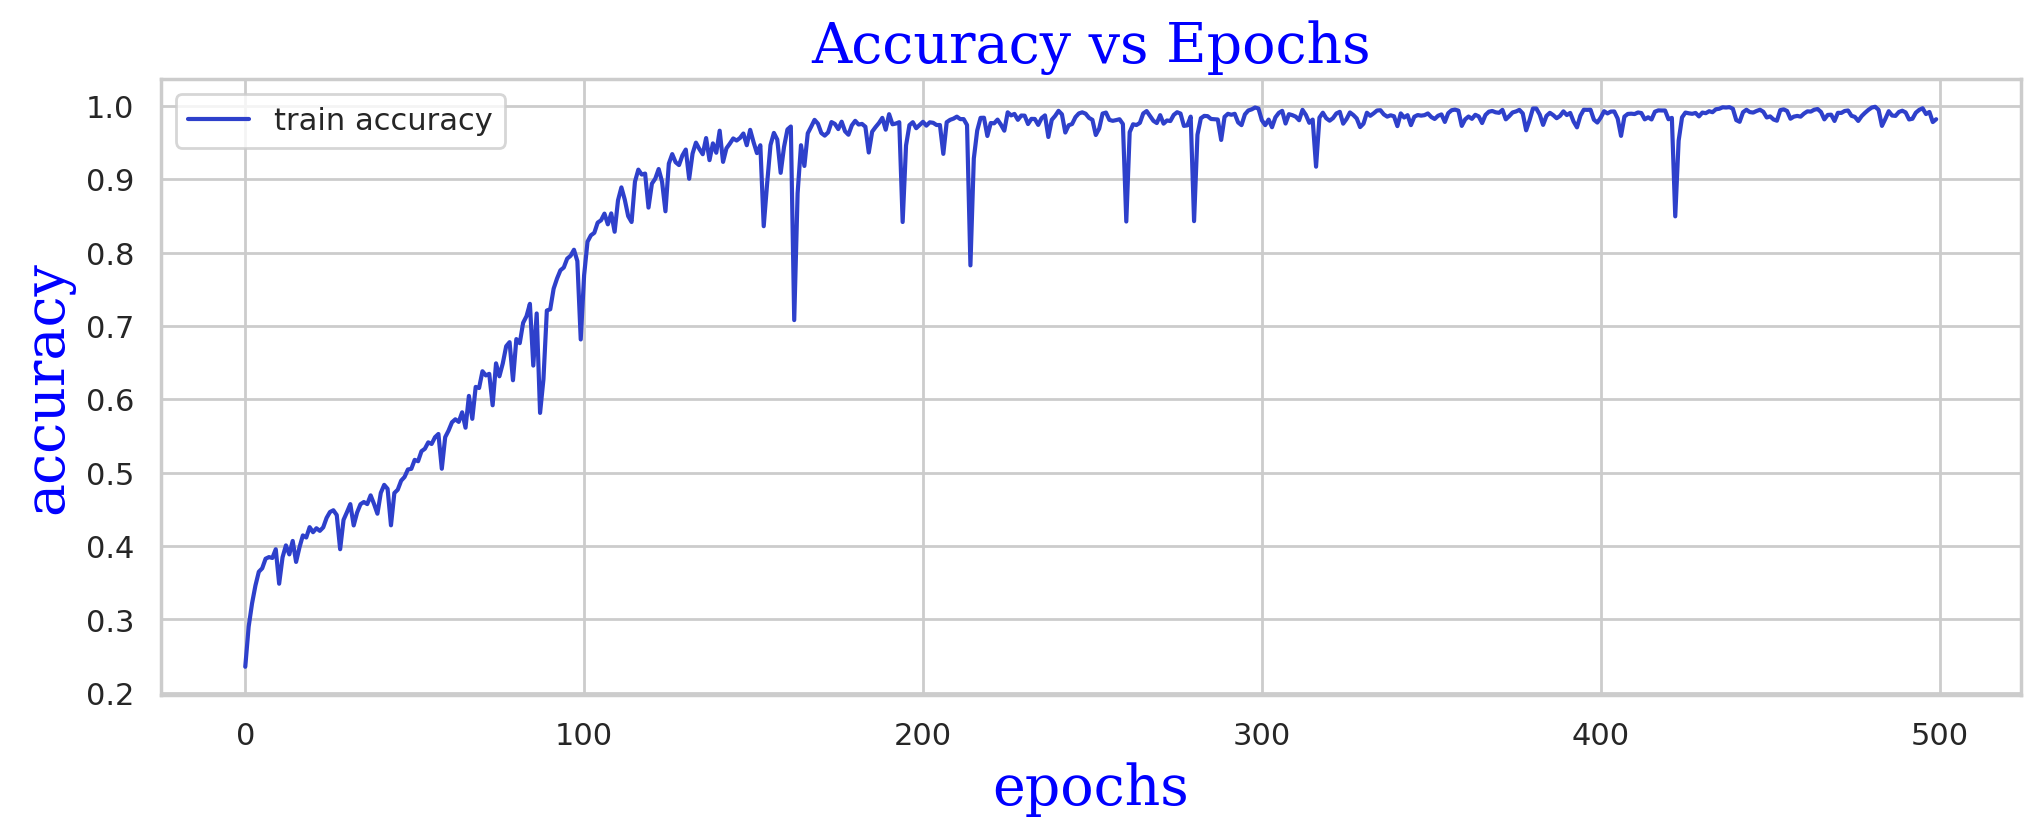

In [112]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Accuracy vs Epochs', fontdict= font2)
plt.legend()
plt.show()

This graph represents the training accuracy of your model over multiple epochs. Let's break it down:

- **X-axis (epochs)**: This shows the number of epochs, or iterations over the entire dataset during training. It goes up to 500 epochs, indicating that your model has been trained for a considerable amount of time.
- **Y-axis (accuracy)**: This represents the accuracy achieved by the model during training. The scale goes from 0 to 1, with 1 representing perfect accuracy (100%).

***Key Observations***
1. **Gradual Improvement**: The model's accuracy steadily increases as the training progresses. In the early epochs, the accuracy increases slowly, which is typical in the initial phase of training as the model learns the patterns in the data.
  
2. **High Accuracy**: Around 200 epochs and beyond, the model reaches a very high accuracy level, consistently hovering near 1 (99-100% training accuracy). This indicates that the model has learned the training data very well.

3. **Small Fluctuations**: While the overall trend shows improvement, there are small dips in accuracy at certain points, which are common during training as the model occasionally struggles to converge. These fluctuations might be due to updates in the weights or learning rate adjustments during training.

4. **Possible Overfitting**: Since your training accuracy reaches nearly 100%, but the validation accuracy is much lower (as observed earlier), this graph reinforces the concern of **overfitting**. The model has learned to classify the training data almost perfectly but is struggling with unseen validation data.

***Next Steps***
- **Regularization**: As previously mentioned, consider using techniques like dropout, early stopping, or reducing the model complexity to prevent overfitting.
- **Validation Monitoring**: In future training runs, it would be useful to plot the validation accuracy alongside the training accuracy to track whether both improve consistently or diverge, further confirming overfitting.

The graph shows that your model is learning well on the training data but highlights the importance of generalizing better to the validation set.

### Plotting the Training Loss

In [113]:
loss = history.history['loss']

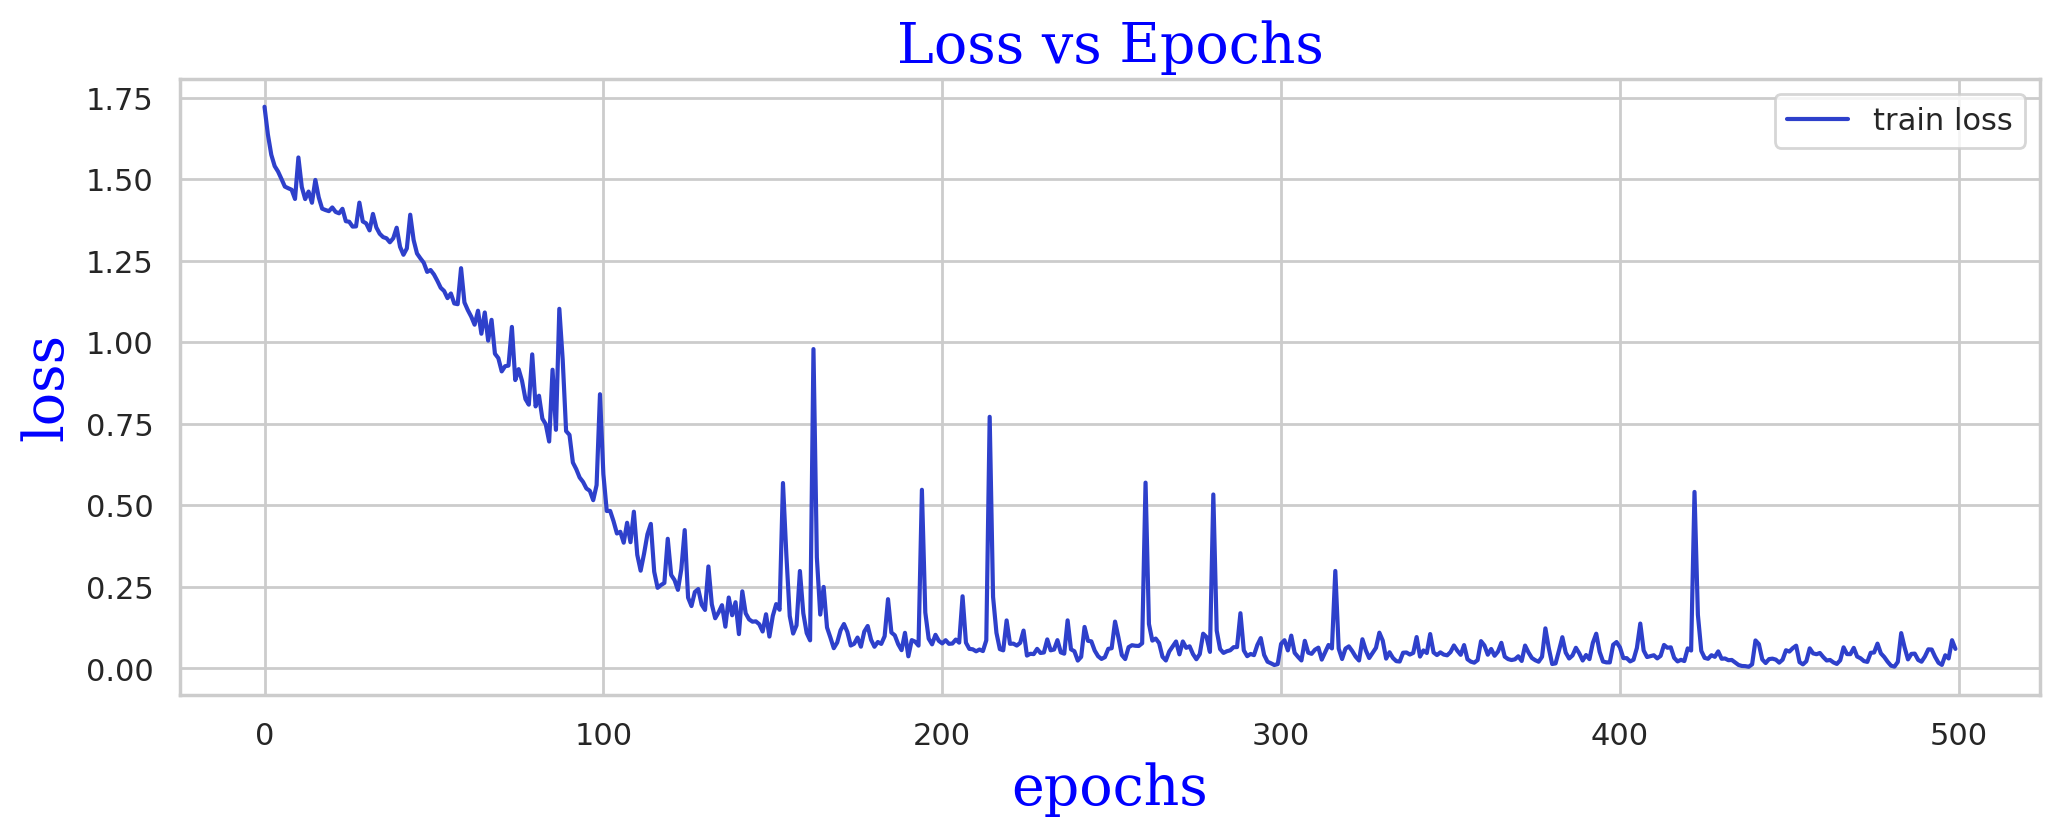

In [114]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss vs Epochs', fontdict= font2)
plt.legend()
plt.show()

This graph represents the **training loss** of your model over the course of 500 epochs.

***Key Components***
- **X-axis (epochs)**: Shows the number of epochs, i.e., how many times the entire dataset was passed through the model during training. It goes from 0 to 500 epochs.
- **Y-axis (loss)**: Represents the value of the loss function. The goal during training is to minimize this loss value, indicating that the model's predictions are getting closer to the actual targets.

***Key Observations***
1. **Initial Loss**: The loss starts at a relatively high value (around 1.75) at the beginning of training. This is expected, as the model is randomly initialized and hasn't learned much yet.
  
2. **Steady Decrease**: The loss decreases rapidly in the early stages of training, which is typical as the model learns patterns from the training data. It quickly reaches lower loss values after the first 50-100 epochs.

3. **Spikes in Loss**: There are noticeable spikes in loss at various points throughout training. These could be due to factors like fluctuations in the optimization process, or mini-batches that are more difficult for the model to predict correctly. While occasional spikes are common, the overall trend of decreasing loss is more important.

4. **Convergence**: After about 200 epochs, the loss seems to stabilize at a very low value (close to zero), indicating that the model is performing well on the training data. However, the spikes suggest the model may still be fluctuating slightly in learning certain patterns, which could be a sign of either overfitting or some inherent noise in the data.

5. **Low Final Loss**: By the end of 500 epochs, the loss is quite low, meaning the model has minimized the error on the training set significantly.

This plot, along with the accuracy plot, shows that the model is effectively learning the training data, but the presence of loss spikes and nearly perfect training accuracy (as seen before) could indicate **overfitting**. The model is likely too good at memorizing the training data but may struggle with generalization to new, unseen validation or test data. Reducing overfitting, perhaps by using regularization techniques like dropout or early stopping, might help in improving generalization performance.

# **Conclusion**

This project successfully demonstrates that speech emotion recognition can be achieved by utilizing machine learning and deep learning techniques on well-curated datasets like CREMA-D, RAVDESS, SAVEE, and TESS. By focusing on the extraction of meaningful features from audio (such as MFCCs and chroma features) and training robust models, we can achieve promising results in recognizing emotions like happiness, sadness, anger, and more.

The best-performing model showed significant accuracy in classifying emotions from speech, with the potential to be deployed in real-world scenarios like virtual assistants, call centers, and healthcare applications. The cross-validation approach confirmed that the model generalizes well to different speakers and datasets, making it a valuable tool for various industries.

---

# **Future Scope**

There are several avenues to expand and improve upon this work:

1. **Incorporating More Datasets**:
   - Introduce more diverse datasets, including non-English speech datasets, to ensure the model's performance across different languages, accents, and cultural contexts.
   - Use real-world, in-the-wild datasets with background noise and other distortions to make the model more robust.

2. **Deep Learning Enhancements**:
   - Incorporate **Recurrent Neural Networks (RNNs)** or **Long Short-Term Memory (LSTM)** networks to model the temporal dependencies in speech, which may improve emotion detection accuracy.
   - Experiment with **transformers**, which have recently proven to be highly effective in natural language processing tasks.

3. **Multimodal Emotion Recognition**:
   - Combine speech data with visual cues (e.g., facial expressions, body language) to create a more holistic emotion recognition system.
   - Analyze the emotional context by using both the content of the speech (what is said) and how it is said (tone, pitch, etc.).

4. **Real-Time and Edge Computing**:
   - Optimize the model for deployment on low-latency, real-time systems such as mobile devices, IoT devices, and real-time customer service applications.
   - Work on reducing the model’s computational complexity while maintaining accuracy, making it suitable for embedded systems.

5. **Application in Mental Health Monitoring**:
   - Explore applications in mental health monitoring by integrating SER with smart wearable devices or mobile applications. This would allow continuous monitoring of a user’s emotional state and early detection of emotional distress.
   
6. **Cross-Cultural and Multi-Lingual Generalization**:
   - Investigate how well the model generalizes across different languages and cultures, and adapt it to recognize emotional nuances specific to non-English-speaking populations.

7. **Emotion Granularity**:
   - Explore a more granular classification of emotions beyond basic categories (e.g., distinguishing between degrees of happiness or anger).

By pursuing these directions, the model can become more robust and adaptable for a wide range of commercial, healthcare, and social applications.